# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:34:07.993935: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:34:11.436215
2025-04-14 22:34:11.436215


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:34:04"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

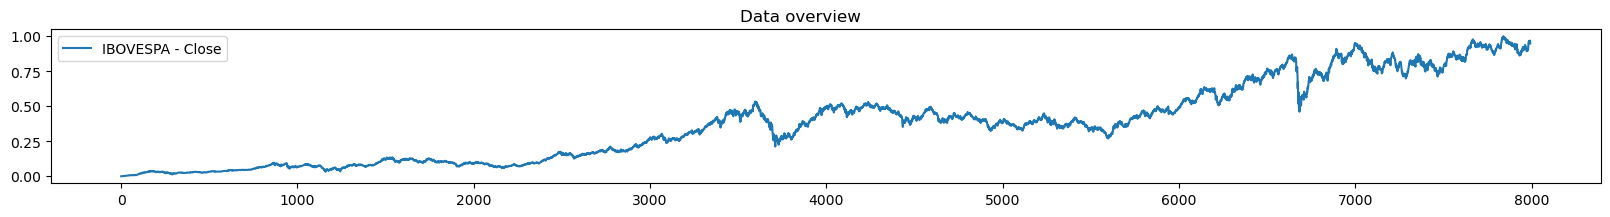

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

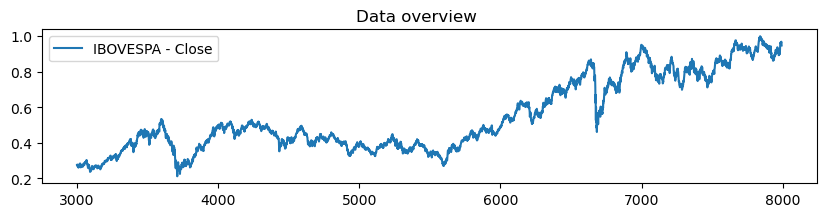

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

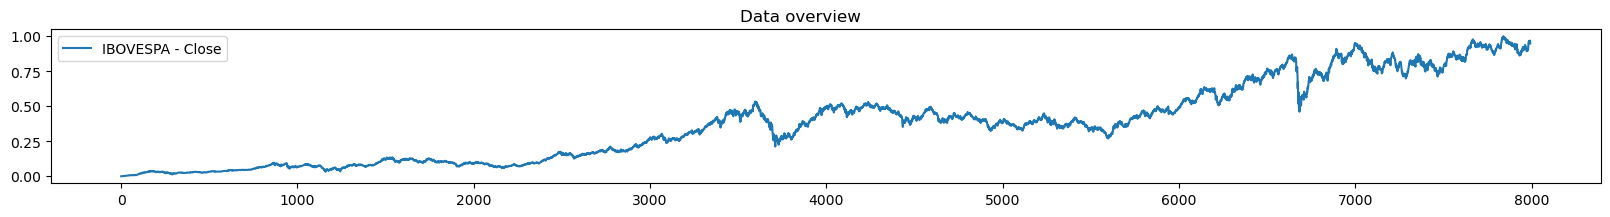

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

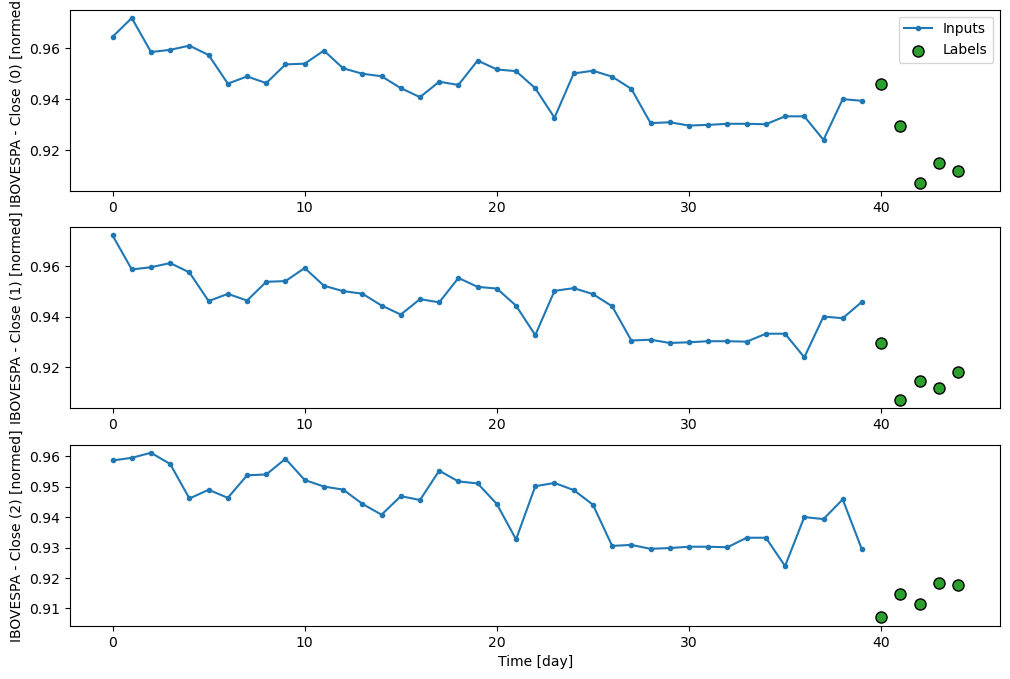

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16:21 4s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 70.3258 - mean_squared_error: 4.4873e-05 - root_mean_squared_error: 0.0067  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.4727 - mean_squared_error: 4.5762e-05 - root_mean_squared_error: 0.0067

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.1294 - mean_squared_error: 4.4987e-05 - root_mean_squared_error: 0.0067

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 47.8792 - mean_squared_error: 4.8470e-05 - root_mean_squared_error: 0.0069

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 45.4570 - mean_squared_error: 5.0286e-05 - root_mean_squared_error: 0.0071

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 43.2801 - mean_squared_error: 5.0670e-05 - root_mean_squared_error: 0.0071

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 41.5199 - mean_squared_error: 5.0844e-05 - root_mean_squared_error: 0.0071

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 39.9028 - mean_squared_error: 5.0491e-05 - root_mean_squared_error: 0.0071

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 38.3889 - mean_squared_error: 4.9802e-05 - root_mean_squared_error: 0.0070

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 36.9764 - mean_squared_error: 4.8902e-05 - root_mean_squared_error: 0.0070

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 35.7000 - mean_squared_error: 4.8161e-05 - root_mean_squared_error: 0.0069

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 35.1332 - mean_squared_error: 4.8141e-05 - root_mean_squared_error: 0.0069

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 34.6010 - mean_squared_error: 4.8290e-05 - root_mean_squared_error: 0.0069

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 34.0956 - mean_squared_error: 4.8602e-05 - root_mean_squared_error: 0.0070

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 33.2270 - mean_squared_error: 5.1682e-05 - root_mean_squared_error: 0.0071

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 32.8641 - mean_squared_error: 5.4250e-05 - root_mean_squared_error: 0.0073

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.5235 - mean_squared_error: 5.6755e-05 - root_mean_squared_error: 0.0074

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 32.1863 - mean_squared_error: 5.8984e-05 - root_mean_squared_error: 0.0075

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 31.5659 - mean_squared_error: 6.3489e-05 - root_mean_squared_error: 0.0078

 34/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 31.2639 - mean_squared_error: 6.5432e-05 - root_mean_squared_error: 0.0079

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 30.9959 - mean_squared_error: 6.7564e-05 - root_mean_squared_error: 0.0080

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 30.5720 - mean_squared_error: 7.2647e-05 - root_mean_squared_error: 0.0083

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 30.3927 - mean_squared_error: 7.5224e-05 - root_mean_squared_error: 0.0084

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 30.0406 - mean_squared_error: 7.9998e-05 - root_mean_squared_error: 0.0086

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 29.8808 - mean_squared_error: 8.2500e-05 - root_mean_squared_error: 0.0087

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.5778 - mean_squared_error: 8.7301e-05 - root_mean_squared_error: 0.0090

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 29.4321 - mean_squared_error: 8.9577e-05 - root_mean_squared_error: 0.0091

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.2957 - mean_squared_error: 9.2149e-05 - root_mean_squared_error: 0.0092

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.1704 - mean_squared_error: 9.5385e-05 - root_mean_squared_error: 0.0093

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.9330 - mean_squared_error: 1.0227e-04 - root_mean_squared_error: 0.0096

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.6877 - mean_squared_error: 1.0833e-04 - root_mean_squared_error: 0.0099

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.4395 - mean_squared_error: 1.1374e-04 - root_mean_squared_error: 0.0101

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.3185 - mean_squared_error: 1.1631e-04 - root_mean_squared_error: 0.0102

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.1964 - mean_squared_error: 1.1873e-04 - root_mean_squared_error: 0.0103

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.0741 - mean_squared_error: 1.2101e-04 - root_mean_squared_error: 0.0104

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 27.8273 - mean_squared_error: 1.2513e-04 - root_mean_squared_error: 0.0106

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.5831 - mean_squared_error: 1.2880e-04 - root_mean_squared_error: 0.0107

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 27.3490 - mean_squared_error: 1.3221e-04 - root_mean_squared_error: 0.0109

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.1273 - mean_squared_error: 1.3550e-04 - root_mean_squared_error: 0.0110

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.0166 - mean_squared_error: 1.3701e-04 - root_mean_squared_error: 0.0111

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 26.9116 - mean_squared_error: 1.3852e-04 - root_mean_squared_error: 0.0112

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.7238 - mean_squared_error: 1.4173e-04 - root_mean_squared_error: 0.0113

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 26.5500 - mean_squared_error: 1.4485e-04 - root_mean_squared_error: 0.0114

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 26.3767 - mean_squared_error: 1.4768e-04 - root_mean_squared_error: 0.0115

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.2186 - mean_squared_error: 1.5071e-04 - root_mean_squared_error: 0.0117

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 26.0796 - mean_squared_error: 1.5462e-04 - root_mean_squared_error: 0.0118

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 25.9630 - mean_squared_error: 1.6099e-04 - root_mean_squared_error: 0.0120

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 25.8623 - mean_squared_error: 1.6914e-04 - root_mean_squared_error: 0.0123

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.7642 - mean_squared_error: 1.7735e-04 - root_mean_squared_error: 0.0125

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 25.6656 - mean_squared_error: 1.8534e-04 - root_mean_squared_error: 0.0128

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 25.5646 - mean_squared_error: 1.9284e-04 - root_mean_squared_error: 0.0130

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 25.4611 - mean_squared_error: 1.9996e-04 - root_mean_squared_error: 0.0132

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 25.3589 - mean_squared_error: 2.0693e-04 - root_mean_squared_error: 0.0134

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 25.2574 - mean_squared_error: 2.1384e-04 - root_mean_squared_error: 0.0136

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 25.1624 - mean_squared_error: 2.2209e-04 - root_mean_squared_error: 0.0139

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 25.0747 - mean_squared_error: 2.3249e-04 - root_mean_squared_error: 0.0141

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 24.9867 - mean_squared_error: 2.4288e-04 - root_mean_squared_error: 0.0144

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 24.8970 - mean_squared_error: 2.5280e-04 - root_mean_squared_error: 0.0147

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 24.8055 - mean_squared_error: 2.6225e-04 - root_mean_squared_error: 0.0149

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 24.7115 - mean_squared_error: 2.7118e-04 - root_mean_squared_error: 0.0151

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 24.6152 - mean_squared_error: 2.7965e-04 - root_mean_squared_error: 0.0154

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.5183 - mean_squared_error: 2.8809e-04 - root_mean_squared_error: 0.0156

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 24.4215 - mean_squared_error: 2.9668e-04 - root_mean_squared_error: 0.0158

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 24.3232 - mean_squared_error: 3.0490e-04 - root_mean_squared_error: 0.0160

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 24.2250 - mean_squared_error: 3.1330e-04 - root_mean_squared_error: 0.0162

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 24.1351 - mean_squared_error: 3.2575e-04 - root_mean_squared_error: 0.0165

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 24.0567 - mean_squared_error: 3.4270e-04 - root_mean_squared_error: 0.0168

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 23.9798 - mean_squared_error: 3.5944e-04 - root_mean_squared_error: 0.0172

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 23.9071 - mean_squared_error: 3.7805e-04 - root_mean_squared_error: 0.0175

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 23.8419 - mean_squared_error: 4.0308e-04 - root_mean_squared_error: 0.0179

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 23.7856 - mean_squared_error: 4.3984e-04 - root_mean_squared_error: 0.0185

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 23.7372 - mean_squared_error: 4.8698e-04 - root_mean_squared_error: 0.0191

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 23.6935 - mean_squared_error: 5.3854e-04 - root_mean_squared_error: 0.0198

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 23.6511 - mean_squared_error: 5.9000e-04 - root_mean_squared_error: 0.0204

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 23.6066 - mean_squared_error: 6.3947e-04 - root_mean_squared_error: 0.0211

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 23.5597 - mean_squared_error: 6.8671e-04 - root_mean_squared_error: 0.0217

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 23.5110 - mean_squared_error: 7.3198e-04 - root_mean_squared_error: 0.0222

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 23.4615 - mean_squared_error: 7.7550e-04 - root_mean_squared_error: 0.0228

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 23.4111 - mean_squared_error: 8.1736e-04 - root_mean_squared_error: 0.0233

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 23.3622 - mean_squared_error: 8.5929e-04 - root_mean_squared_error: 0.0239

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 23.3134 - mean_squared_error: 9.0025e-04 - root_mean_squared_error: 0.0244

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 23.2633 - mean_squared_error: 9.3953e-04 - root_mean_squared_error: 0.0249

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 23.2117 - mean_squared_error: 9.7714e-04 - root_mean_squared_error: 0.0254

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 23.1592 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0259    

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 23.1077 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0263

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 23.0574 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0268

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 23.0060 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 22.9534 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0276

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 22.9011 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0280

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 22.8754 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0282

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 22.8256 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 22.7762 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0290

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 22.7267 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0294

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 22.6770 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0298

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 22.6275 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0301

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 22.5796 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0305

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.5327 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0308

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 22.4850 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 22.4379 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0315

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 22.3919 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0318

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 22.3471 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0321

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 22.3029 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0324

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 22.2382 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0329

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 22.1960 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0332

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 22.1540 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0335

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 22.1122 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0338

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 22.0703 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 22.0280 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0344

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 21.9856 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0347

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 21.9430 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0349

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 21.8998 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 21.8561 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0355

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 21.8155 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0358

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 21.7770 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0361

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 21.7385 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 21.7003 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0367

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 21.6629 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 21.6266 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0374

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 21.5908 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0378

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 21.5546 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0381

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 21.5178 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 21.4813 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0388

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 21.4448 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0391

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 21.4080 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 21.3708 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0397

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 21.3337 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0400

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 21.2791 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0405 - val_loss: 0.2132 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 22.7338 - val_mean_squared_error: 0.0462 - val_root_mean_squared_error: 0.2150 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.6881 - mean_absolute_error: 0.6881 - mean_absolute_percentage_error: 9245.4727 - mean_squared_error: 0.4735 - root_mean_squared_error: 0.6881

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6837 - mean_absolute_error: 0.6837 - mean_absolute_percentage_error: 7706.1255 - mean_squared_error: 0.4674 - root_mean_squared_error: 0.6837 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6759 - mean_absolute_error: 0.6759 - mean_absolute_percentage_error: 6528.8931 - mean_squared_error: 0.4572 - root_mean_squared_error: 0.6761

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6673 - mean_absolute_error: 0.6673 - mean_absolute_percentage_error: 5773.4731 - mean_squared_error: 0.4460 - root_mean_squared_error: 0.6677

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6570 - mean_absolute_error: 0.6570 - mean_absolute_percentage_error: 5280.9106 - mean_squared_error: 0.4333 - root_mean_squared_error: 0.6578

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - mean_absolute_percentage_error: 5039.0430 - mean_squared_error: 0.5157 - root_mean_squared_error: 0.7094

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6801 - mean_absolute_error: 0.6801 - mean_absolute_percentage_error: 4800.6343 - mean_squared_error: 0.5533 - root_mean_squared_error: 0.7344

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6728 - mean_absolute_error: 0.6728 - mean_absolute_percentage_error: 4573.4360 - mean_squared_error: 0.5678 - root_mean_squared_error: 0.7449

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6616 - mean_absolute_error: 0.6616 - mean_absolute_percentage_error: 4365.1675 - mean_squared_error: 0.5708 - root_mean_squared_error: 0.7479

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6498 - mean_absolute_error: 0.6498 - mean_absolute_percentage_error: 4178.2251 - mean_squared_error: 0.5682 - root_mean_squared_error: 0.7470

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6370 - mean_absolute_error: 0.6370 - mean_absolute_percentage_error: 4007.0828 - mean_squared_error: 0.5616 - root_mean_squared_error: 0.7431

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6241 - mean_absolute_error: 0.6241 - mean_absolute_percentage_error: 3850.6250 - mean_squared_error: 0.5527 - root_mean_squared_error: 0.7374

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6115 - mean_absolute_error: 0.6115 - mean_absolute_percentage_error: 3706.8735 - mean_squared_error: 0.5426 - root_mean_squared_error: 0.7306

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5991 - mean_absolute_error: 0.5991 - mean_absolute_percentage_error: 3574.2429 - mean_squared_error: 0.5319 - root_mean_squared_error: 0.7232

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5872 - mean_absolute_error: 0.5872 - mean_absolute_percentage_error: 3451.6731 - mean_squared_error: 0.5209 - root_mean_squared_error: 0.7155

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5758 - mean_absolute_error: 0.5758 - mean_absolute_percentage_error: 3338.5210 - mean_squared_error: 0.5100 - root_mean_squared_error: 0.7076

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5646 - mean_absolute_error: 0.5646 - mean_absolute_percentage_error: 3233.2302 - mean_squared_error: 0.4991 - root_mean_squared_error: 0.6996

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5539 - mean_absolute_error: 0.5539 - mean_absolute_percentage_error: 3135.4165 - mean_squared_error: 0.4885 - root_mean_squared_error: 0.6916

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5436 - mean_absolute_error: 0.5436 - mean_absolute_percentage_error: 3044.5676 - mean_squared_error: 0.4783 - root_mean_squared_error: 0.6837

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5337 - mean_absolute_error: 0.5337 - mean_absolute_percentage_error: 2959.5664 - mean_squared_error: 0.4683 - root_mean_squared_error: 0.6760

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5242 - mean_absolute_error: 0.5242 - mean_absolute_percentage_error: 2879.8440 - mean_squared_error: 0.4586 - root_mean_squared_error: 0.6683

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5150 - mean_absolute_error: 0.5150 - mean_absolute_percentage_error: 2804.9299 - mean_squared_error: 0.4493 - root_mean_squared_error: 0.6609

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5061 - mean_absolute_error: 0.5061 - mean_absolute_percentage_error: 2734.3103 - mean_squared_error: 0.4403 - root_mean_squared_error: 0.6536

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4976 - mean_absolute_error: 0.4976 - mean_absolute_percentage_error: 2667.5857 - mean_squared_error: 0.4316 - root_mean_squared_error: 0.6465

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4893 - mean_absolute_error: 0.4893 - mean_absolute_percentage_error: 2604.4565 - mean_squared_error: 0.4233 - root_mean_squared_error: 0.6396

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4814 - mean_absolute_error: 0.4814 - mean_absolute_percentage_error: 2544.6379 - mean_squared_error: 0.4153 - root_mean_squared_error: 0.6328

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4737 - mean_absolute_error: 0.4737 - mean_absolute_percentage_error: 2487.8521 - mean_squared_error: 0.4076 - root_mean_squared_error: 0.6263

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 2433.8645 - mean_squared_error: 0.4001 - root_mean_squared_error: 0.6199

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4591 - mean_absolute_error: 0.4591 - mean_absolute_percentage_error: 2382.4690 - mean_squared_error: 0.3929 - root_mean_squared_error: 0.6136

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - mean_absolute_percentage_error: 2333.4736 - mean_squared_error: 0.3860 - root_mean_squared_error: 0.6076

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4454 - mean_absolute_error: 0.4454 - mean_absolute_percentage_error: 2286.6975 - mean_squared_error: 0.3794 - root_mean_squared_error: 0.6017

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 2241.9919 - mean_squared_error: 0.3729 - root_mean_squared_error: 0.5959

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 2199.2175 - mean_squared_error: 0.3667 - root_mean_squared_error: 0.5903

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 2158.2434 - mean_squared_error: 0.3608 - root_mean_squared_error: 0.5849

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - mean_absolute_percentage_error: 2118.9578 - mean_squared_error: 0.3550 - root_mean_squared_error: 0.5796

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4144 - mean_absolute_error: 0.4144 - mean_absolute_percentage_error: 2081.2625 - mean_squared_error: 0.3494 - root_mean_squared_error: 0.5744

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4087 - mean_absolute_error: 0.4087 - mean_absolute_percentage_error: 2045.0570 - mean_squared_error: 0.3440 - root_mean_squared_error: 0.5694

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 2010.2477 - mean_squared_error: 0.3388 - root_mean_squared_error: 0.5645

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3979 - mean_absolute_error: 0.3979 - mean_absolute_percentage_error: 1976.7494 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5597

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3901 - mean_absolute_error: 0.3901 - mean_absolute_percentage_error: 1928.8064 - mean_squared_error: 0.3265 - root_mean_squared_error: 0.5528

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 1898.2836 - mean_squared_error: 0.3219 - root_mean_squared_error: 0.5483

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3804 - mean_absolute_error: 0.3804 - mean_absolute_percentage_error: 1868.8363 - mean_squared_error: 0.3174 - root_mean_squared_error: 0.5439

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3757 - mean_absolute_error: 0.3757 - mean_absolute_percentage_error: 1840.4058 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5396

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3711 - mean_absolute_error: 0.3711 - mean_absolute_percentage_error: 1812.9384 - mean_squared_error: 0.3088 - root_mean_squared_error: 0.5354

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3667 - mean_absolute_error: 0.3667 - mean_absolute_percentage_error: 1786.3867 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5314

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3625 - mean_absolute_error: 0.3625 - mean_absolute_percentage_error: 1760.7096 - mean_squared_error: 0.3007 - root_mean_squared_error: 0.5274

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 1735.8580 - mean_squared_error: 0.2968 - root_mean_squared_error: 0.5235

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1711.7892 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5197

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3504 - mean_absolute_error: 0.3504 - mean_absolute_percentage_error: 1688.4734 - mean_squared_error: 0.2894 - root_mean_squared_error: 0.5160

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1665.8696 - mean_squared_error: 0.2858 - root_mean_squared_error: 0.5123

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 1643.9387 - mean_squared_error: 0.2824 - root_mean_squared_error: 0.5088

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1622.6543 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5053

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1601.9882 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.5019

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 1581.9122 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.4986

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1562.3964 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.4953

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 1543.4160 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4921

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1524.9540 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4890

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1507.0061 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4859

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1489.5504 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4830

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1472.5559 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4801

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1455.9949 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4773

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1439.8508 - mean_squared_error: 0.2499 - root_mean_squared_error: 0.4745

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1424.1097 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4717

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1408.7559 - mean_squared_error: 0.2450 - root_mean_squared_error: 0.4691

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1393.7732 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4664

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1379.1483 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4639

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1364.8668 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4613

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1350.9148 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4588

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1337.2828 - mean_squared_error: 0.2335 - root_mean_squared_error: 0.4564

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1323.9620 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4540

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 1310.9391 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4516

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1298.2018 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4493

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1285.7422 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4470

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1273.5491 - mean_squared_error: 0.2232 - root_mean_squared_error: 0.4447

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1261.6133 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4425

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1249.9264 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4403

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1238.4817 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4382

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1227.2703 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4361

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1216.2847 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4340

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1205.5184 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4319

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1194.9651 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4299

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1184.6190 - mean_squared_error: 0.2086 - root_mean_squared_error: 0.4279

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1174.4725 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4260

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1164.5195 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4240

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1154.7548 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4221

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1145.1727 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4202

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1135.7693 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4184

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1126.5392 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4166

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1117.4760 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4148

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1108.5763 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4130

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1099.8359 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4112

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1091.2510 - mean_squared_error: 0.1932 - root_mean_squared_error: 0.4095

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1082.8169 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4078

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1074.5299 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4061

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1066.3865 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4045

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1058.3833 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4028

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1050.5160 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4012

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1042.7804 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.3997

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1035.1735 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.3981

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1031.4175 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3973

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1027.6925 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3966

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1023.9980 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3958

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1020.3339 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3951

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1013.0945 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3936

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1005.9716 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3921

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 998.9620 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3907 

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 992.0618 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3893

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 985.2679 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3879

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 978.5777 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3865

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 971.9892 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3852

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 965.4996 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3838

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 959.1066 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3825

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 952.8093 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3812

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 946.6055 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3799

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 940.4927 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3786

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 934.4689 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3774

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 928.5310 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3761

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 922.6769 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3749

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 916.9050 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3737

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 911.2141 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3725

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 905.6129 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3713 - val_loss: 0.2138 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 22.8002 - val_mean_squared_error: 0.0465 - val_root_mean_squared_error: 0.2157 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.7128 - mean_absolute_error: 0.7128 - mean_absolute_percentage_error: 9577.1738 - mean_squared_error: 0.5080 - root_mean_squared_error: 0.7128

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7083 - mean_absolute_error: 0.7083 - mean_absolute_percentage_error: 7982.9902 - mean_squared_error: 0.5018 - root_mean_squared_error: 0.7083 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_absolute_percentage_error: 6768.2095 - mean_squared_error: 0.4928 - root_mean_squared_error: 0.7019

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6958 - mean_absolute_error: 0.6958 - mean_absolute_percentage_error: 5995.2637 - mean_squared_error: 0.4845 - root_mean_squared_error: 0.6959

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6902 - mean_absolute_error: 0.6902 - mean_absolute_percentage_error: 5507.8477 - mean_squared_error: 0.4770 - root_mean_squared_error: 0.6905

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6846 - mean_absolute_error: 0.6846 - mean_absolute_percentage_error: 5152.6040 - mean_squared_error: 0.4695 - root_mean_squared_error: 0.6849

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6786 - mean_absolute_error: 0.6786 - mean_absolute_percentage_error: 4868.8242 - mean_squared_error: 0.4617 - root_mean_squared_error: 0.6791

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6723 - mean_absolute_error: 0.6723 - mean_absolute_percentage_error: 4634.0415 - mean_squared_error: 0.4537 - root_mean_squared_error: 0.6731

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6657 - mean_absolute_error: 0.6657 - mean_absolute_percentage_error: 4431.4019 - mean_squared_error: 0.4455 - root_mean_squared_error: 0.6668

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6588 - mean_absolute_error: 0.6588 - mean_absolute_percentage_error: 4251.8145 - mean_squared_error: 0.4371 - root_mean_squared_error: 0.6603

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6515 - mean_absolute_error: 0.6515 - mean_absolute_percentage_error: 4090.0222 - mean_squared_error: 0.4286 - root_mean_squared_error: 0.6536

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6439 - mean_absolute_error: 0.6439 - mean_absolute_percentage_error: 3942.5923 - mean_squared_error: 0.4200 - root_mean_squared_error: 0.6466

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6359 - mean_absolute_error: 0.6359 - mean_absolute_percentage_error: 3806.3047 - mean_squared_error: 0.4112 - root_mean_squared_error: 0.6395

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6274 - mean_absolute_error: 0.6274 - mean_absolute_percentage_error: 3679.3567 - mean_squared_error: 0.4024 - root_mean_squared_error: 0.6321

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6185 - mean_absolute_error: 0.6185 - mean_absolute_percentage_error: 3560.9358 - mean_squared_error: 0.3935 - root_mean_squared_error: 0.6246

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6091 - mean_absolute_error: 0.6091 - mean_absolute_percentage_error: 3450.3372 - mean_squared_error: 0.3847 - root_mean_squared_error: 0.6170

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5994 - mean_absolute_error: 0.5994 - mean_absolute_percentage_error: 3346.5537 - mean_squared_error: 0.3760 - root_mean_squared_error: 0.6094

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5894 - mean_absolute_error: 0.5894 - mean_absolute_percentage_error: 3248.9502 - mean_squared_error: 0.3675 - root_mean_squared_error: 0.6018

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5793 - mean_absolute_error: 0.5793 - mean_absolute_percentage_error: 3157.2581 - mean_squared_error: 0.3593 - root_mean_squared_error: 0.5944

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5693 - mean_absolute_error: 0.5693 - mean_absolute_percentage_error: 3071.1726 - mean_squared_error: 0.3513 - root_mean_squared_error: 0.5871

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5596 - mean_absolute_error: 0.5596 - mean_absolute_percentage_error: 2990.2234 - mean_squared_error: 0.3437 - root_mean_squared_error: 0.5799

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5502 - mean_absolute_error: 0.5502 - mean_absolute_percentage_error: 2913.9465 - mean_squared_error: 0.3363 - root_mean_squared_error: 0.5730

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5411 - mean_absolute_error: 0.5411 - mean_absolute_percentage_error: 2841.9065 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5663

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - mean_absolute_percentage_error: 2773.7329 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5597

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5235 - mean_absolute_error: 0.5235 - mean_absolute_percentage_error: 2709.0737 - mean_squared_error: 0.3160 - root_mean_squared_error: 0.5534

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5150 - mean_absolute_error: 0.5150 - mean_absolute_percentage_error: 2647.6572 - mean_squared_error: 0.3098 - root_mean_squared_error: 0.5472

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5068 - mean_absolute_error: 0.5068 - mean_absolute_percentage_error: 2589.2917 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5412

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4989 - mean_absolute_error: 0.4989 - mean_absolute_percentage_error: 2533.7568 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5354

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4912 - mean_absolute_error: 0.4912 - mean_absolute_percentage_error: 2480.8594 - mean_squared_error: 0.2925 - root_mean_squared_error: 0.5297

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4838 - mean_absolute_error: 0.4838 - mean_absolute_percentage_error: 2430.4175 - mean_squared_error: 0.2871 - root_mean_squared_error: 0.5243

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4765 - mean_absolute_error: 0.4765 - mean_absolute_percentage_error: 2382.2468 - mean_squared_error: 0.2820 - root_mean_squared_error: 0.5189

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - mean_absolute_percentage_error: 2336.1782 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.5138

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4627 - mean_absolute_error: 0.4627 - mean_absolute_percentage_error: 2292.0747 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.5088

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4561 - mean_absolute_error: 0.4561 - mean_absolute_percentage_error: 2249.8020 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.5039

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4497 - mean_absolute_error: 0.4497 - mean_absolute_percentage_error: 2209.2480 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4992

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4435 - mean_absolute_error: 0.4435 - mean_absolute_percentage_error: 2170.3076 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4945

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4404 - mean_absolute_error: 0.4404 - mean_absolute_percentage_error: 2151.4121 - mean_squared_error: 0.2571 - root_mean_squared_error: 0.4923

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4344 - mean_absolute_error: 0.4344 - mean_absolute_percentage_error: 2114.7119 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4879

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 2079.3997 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4836

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4230 - mean_absolute_error: 0.4230 - mean_absolute_percentage_error: 2045.3960 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4794

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 2012.6271 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4753

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 1981.0298 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4713

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4071 - mean_absolute_error: 0.4071 - mean_absolute_percentage_error: 1950.5349 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4674

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4020 - mean_absolute_error: 0.4020 - mean_absolute_percentage_error: 1921.0807 - mean_squared_error: 0.2315 - root_mean_squared_error: 0.4637

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3972 - mean_absolute_error: 0.3972 - mean_absolute_percentage_error: 1892.6123 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4600

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3924 - mean_absolute_error: 0.3924 - mean_absolute_percentage_error: 1865.0801 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4564

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3878 - mean_absolute_error: 0.3878 - mean_absolute_percentage_error: 1838.4409 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4528

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 1812.6531 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4494

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1787.6727 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4461

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3747 - mean_absolute_error: 0.3747 - mean_absolute_percentage_error: 1763.4567 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4428

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3706 - mean_absolute_error: 0.3706 - mean_absolute_percentage_error: 1739.9692 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4396

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1717.1769 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4365

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3626 - mean_absolute_error: 0.3626 - mean_absolute_percentage_error: 1695.0496 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4334

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1673.5580 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4304

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3550 - mean_absolute_error: 0.3550 - mean_absolute_percentage_error: 1652.6753 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4275

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3514 - mean_absolute_error: 0.3514 - mean_absolute_percentage_error: 1632.3726 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4246

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 1612.6248 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4218

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1593.4126 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4191

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1574.7312 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4164

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1556.5612 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4138

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1538.8730 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4113

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1521.6395 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4089

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3290 - mean_absolute_error: 0.3290 - mean_absolute_percentage_error: 1504.8368 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4065

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1488.4475 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.4041

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1472.4563 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.4018

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1456.8475 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3995

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1441.6082 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.3972

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 1426.7239 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3950

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1412.1816 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3929

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1397.9720 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3907

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1384.0852 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3887

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1370.5076 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3866

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1357.2267 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3846

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1344.2338 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3826

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1331.5176 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3807

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1319.0697 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3787

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1306.8809 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3769

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1294.9437 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3750

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1283.2495 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3732

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1271.7905 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3714

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1260.5599 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3696

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1249.5508 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3678

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1238.7572 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3661

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1228.1714 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3644

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1217.7869 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3627

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 1207.5980 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3611

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1197.6000 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3595

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1187.7885 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3579

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1178.1576 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3563

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1168.7006 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3547

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1159.4139 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3532

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2658 - mean_absolute_error: 0.2658 - mean_absolute_percentage_error: 1150.2935 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3517

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1145.7942 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3509

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 1141.3347 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3502

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1132.5327 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3487

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1123.8835 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3473

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1115.3829 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3459

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1107.0273 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3445

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1098.8119 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3431

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1090.7321 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3417

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1082.7848 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3404

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1074.9670 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3390

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1067.2750 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3377

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1059.7057 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3364

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1052.2560 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3351

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1048.5751 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3345

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1041.3019 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3333

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1034.1427 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3320

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1030.6049 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3314

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1027.0942 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3308

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1020.1528 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3296

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1013.3157 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3284

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1006.5807 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3273

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 999.9454 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3261 

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - mean_absolute_percentage_error: 993.4080 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3250

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 986.9659 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3239

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 980.6171 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3227

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 974.3594 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3216

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 968.1903 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3206

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 962.1081 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3195

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 956.1110 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3184

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 950.2010 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3174

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 947.2827 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3168 - val_loss: 0.1712 - val_mean_absolute_error: 0.1712 - val_mean_absolute_percentage_error: 18.2425 - val_mean_squared_error: 0.0301 - val_root_mean_squared_error: 0.1736 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7566 - mean_absolute_error: 0.7566 - mean_absolute_percentage_error: 10166.4043 - mean_squared_error: 0.5725 - root_mean_squared_error: 0.7566

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7527 - mean_absolute_error: 0.7527 - mean_absolute_percentage_error: 8479.4863 - mean_squared_error: 0.5666 - root_mean_squared_error: 0.7527  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7468 - mean_absolute_error: 0.7468 - mean_absolute_percentage_error: 7193.0532 - mean_squared_error: 0.5580 - root_mean_squared_error: 0.7469

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7389 - mean_absolute_error: 0.7389 - mean_absolute_percentage_error: 6093.6230 - mean_squared_error: 0.5463 - root_mean_squared_error: 0.7391

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7338 - mean_absolute_error: 0.7338 - mean_absolute_percentage_error: 5662.2124 - mean_squared_error: 0.5391 - root_mean_squared_error: 0.7341

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7284 - mean_absolute_error: 0.7284 - mean_absolute_percentage_error: 5330.9302 - mean_squared_error: 0.5315 - root_mean_squared_error: 0.7288

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7226 - mean_absolute_error: 0.7226 - mean_absolute_percentage_error: 5060.8638 - mean_squared_error: 0.5234 - root_mean_squared_error: 0.7231

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7163 - mean_absolute_error: 0.7163 - mean_absolute_percentage_error: 4831.7817 - mean_squared_error: 0.5149 - root_mean_squared_error: 0.7171

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7096 - mean_absolute_error: 0.7096 - mean_absolute_percentage_error: 4631.4185 - mean_squared_error: 0.5060 - root_mean_squared_error: 0.7107

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_absolute_percentage_error: 4451.8672 - mean_squared_error: 0.4970 - root_mean_squared_error: 0.7041

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6950 - mean_absolute_error: 0.6950 - mean_absolute_percentage_error: 4289.2910 - mean_squared_error: 0.4877 - root_mean_squared_error: 0.6972

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6873 - mean_absolute_error: 0.6873 - mean_absolute_percentage_error: 4140.0352 - mean_squared_error: 0.4783 - root_mean_squared_error: 0.6902

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6792 - mean_absolute_error: 0.6792 - mean_absolute_percentage_error: 4001.5159 - mean_squared_error: 0.4689 - root_mean_squared_error: 0.6829

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6708 - mean_absolute_error: 0.6708 - mean_absolute_percentage_error: 3872.4409 - mean_squared_error: 0.4594 - root_mean_squared_error: 0.6755

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6621 - mean_absolute_error: 0.6621 - mean_absolute_percentage_error: 3752.3196 - mean_squared_error: 0.4499 - root_mean_squared_error: 0.6681

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6532 - mean_absolute_error: 0.6532 - mean_absolute_percentage_error: 3640.1340 - mean_squared_error: 0.4406 - root_mean_squared_error: 0.6606

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6440 - mean_absolute_error: 0.6440 - mean_absolute_percentage_error: 3534.9236 - mean_squared_error: 0.4313 - root_mean_squared_error: 0.6530

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6345 - mean_absolute_error: 0.6345 - mean_absolute_percentage_error: 3435.9624 - mean_squared_error: 0.4222 - root_mean_squared_error: 0.6455

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6297 - mean_absolute_error: 0.6297 - mean_absolute_percentage_error: 3388.6804 - mean_squared_error: 0.4178 - root_mean_squared_error: 0.6418

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6201 - mean_absolute_error: 0.6201 - mean_absolute_percentage_error: 3298.4597 - mean_squared_error: 0.4091 - root_mean_squared_error: 0.6344

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6106 - mean_absolute_error: 0.6106 - mean_absolute_percentage_error: 3213.4353 - mean_squared_error: 0.4006 - root_mean_squared_error: 0.6271

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6059 - mean_absolute_error: 0.6059 - mean_absolute_percentage_error: 3172.6721 - mean_squared_error: 0.3965 - root_mean_squared_error: 0.6236

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5964 - mean_absolute_error: 0.5964 - mean_absolute_percentage_error: 3094.3813 - mean_squared_error: 0.3885 - root_mean_squared_error: 0.6165

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5870 - mean_absolute_error: 0.5870 - mean_absolute_percentage_error: 3020.1482 - mean_squared_error: 0.3807 - root_mean_squared_error: 0.6096

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5778 - mean_absolute_error: 0.5778 - mean_absolute_percentage_error: 2949.6890 - mean_squared_error: 0.3732 - root_mean_squared_error: 0.6029

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5688 - mean_absolute_error: 0.5688 - mean_absolute_percentage_error: 2882.7302 - mean_squared_error: 0.3660 - root_mean_squared_error: 0.5964

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5599 - mean_absolute_error: 0.5599 - mean_absolute_percentage_error: 2819.0283 - mean_squared_error: 0.3591 - root_mean_squared_error: 0.5900

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5512 - mean_absolute_error: 0.5512 - mean_absolute_percentage_error: 2758.3630 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5838

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5427 - mean_absolute_error: 0.5427 - mean_absolute_percentage_error: 2700.5178 - mean_squared_error: 0.3460 - root_mean_squared_error: 0.5778

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5345 - mean_absolute_error: 0.5345 - mean_absolute_percentage_error: 2645.3008 - mean_squared_error: 0.3398 - root_mean_squared_error: 0.5719

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5265 - mean_absolute_error: 0.5265 - mean_absolute_percentage_error: 2592.5500 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5662

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5187 - mean_absolute_error: 0.5187 - mean_absolute_percentage_error: 2542.1006 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5607

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5111 - mean_absolute_error: 0.5111 - mean_absolute_percentage_error: 2493.8030 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5553

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5037 - mean_absolute_error: 0.5037 - mean_absolute_percentage_error: 2447.5339 - mean_squared_error: 0.3172 - root_mean_squared_error: 0.5501

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4965 - mean_absolute_error: 0.4965 - mean_absolute_percentage_error: 2403.1685 - mean_squared_error: 0.3120 - root_mean_squared_error: 0.5449

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4896 - mean_absolute_error: 0.4896 - mean_absolute_percentage_error: 2360.5771 - mean_squared_error: 0.3070 - root_mean_squared_error: 0.5400

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4829 - mean_absolute_error: 0.4829 - mean_absolute_percentage_error: 2319.6636 - mean_squared_error: 0.3022 - root_mean_squared_error: 0.5351

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4763 - mean_absolute_error: 0.4763 - mean_absolute_percentage_error: 2280.3289 - mean_squared_error: 0.2976 - root_mean_squared_error: 0.5304

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4700 - mean_absolute_error: 0.4700 - mean_absolute_percentage_error: 2242.4819 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5258

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4638 - mean_absolute_error: 0.4638 - mean_absolute_percentage_error: 2206.0359 - mean_squared_error: 0.2887 - root_mean_squared_error: 0.5214

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4579 - mean_absolute_error: 0.4579 - mean_absolute_percentage_error: 2170.9033 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5170

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - mean_absolute_percentage_error: 2137.0117 - mean_squared_error: 0.2804 - root_mean_squared_error: 0.5128

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4464 - mean_absolute_error: 0.4464 - mean_absolute_percentage_error: 2104.2922 - mean_squared_error: 0.2765 - root_mean_squared_error: 0.5086

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4409 - mean_absolute_error: 0.4409 - mean_absolute_percentage_error: 2072.6824 - mean_squared_error: 0.2727 - root_mean_squared_error: 0.5046

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4356 - mean_absolute_error: 0.4356 - mean_absolute_percentage_error: 2042.1244 - mean_squared_error: 0.2690 - root_mean_squared_error: 0.5006

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - mean_absolute_percentage_error: 2012.5656 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4968

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 1983.9603 - mean_squared_error: 0.2619 - root_mean_squared_error: 0.4930

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4204 - mean_absolute_error: 0.4204 - mean_absolute_percentage_error: 1956.2656 - mean_squared_error: 0.2585 - root_mean_squared_error: 0.4893

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 1929.4355 - mean_squared_error: 0.2552 - root_mean_squared_error: 0.4857

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 1903.4233 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4822

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 1878.1904 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4788

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4021 - mean_absolute_error: 0.4021 - mean_absolute_percentage_error: 1853.7008 - mean_squared_error: 0.2458 - root_mean_squared_error: 0.4754

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 1829.9213 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4721

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3936 - mean_absolute_error: 0.3936 - mean_absolute_percentage_error: 1806.8206 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4689

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3895 - mean_absolute_error: 0.3895 - mean_absolute_percentage_error: 1784.3690 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4658

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3855 - mean_absolute_error: 0.3855 - mean_absolute_percentage_error: 1762.5387 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4627

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3835 - mean_absolute_error: 0.3835 - mean_absolute_percentage_error: 1751.8479 - mean_squared_error: 0.2332 - root_mean_squared_error: 0.4612

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 1741.3026 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4597

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3778 - mean_absolute_error: 0.3778 - mean_absolute_percentage_error: 1720.6395 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4567

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 1700.5405 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4538

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3706 - mean_absolute_error: 0.3706 - mean_absolute_percentage_error: 1680.9825 - mean_squared_error: 0.2244 - root_mean_squared_error: 0.4510

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3672 - mean_absolute_error: 0.3672 - mean_absolute_percentage_error: 1661.9343 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4483

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 1643.3687 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4456

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 1625.2662 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4429

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1607.6117 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4403

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1590.3876 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4378

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 1573.5767 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4353

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 1557.1643 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4329

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3455 - mean_absolute_error: 0.3455 - mean_absolute_percentage_error: 1541.1351 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4305

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3427 - mean_absolute_error: 0.3427 - mean_absolute_percentage_error: 1525.4736 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4281

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3399 - mean_absolute_error: 0.3399 - mean_absolute_percentage_error: 1510.1680 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4258

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - mean_absolute_percentage_error: 1495.2078 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4235

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 1480.5795 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4213

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1466.2704 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4191

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1452.2719 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4169

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1438.5719 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4148

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1418.5591 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4116

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1405.5624 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4096

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1392.8320 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4076

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1380.3582 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4056

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1368.1331 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4036

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 1356.1498 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.4017

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1344.4023 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3998

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1332.8829 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3980

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1321.5834 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3961

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1310.4978 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3943

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1299.6196 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3925

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1288.9438 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3908

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1278.4664 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3890

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1268.1791 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3873

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1258.0765 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3856

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1248.1543 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3840

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1238.4078 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3823

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1228.8324 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3807

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1219.4232 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3791

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1210.1764 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3776

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1201.0879 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3760

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1192.1537 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3745

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1183.3687 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3730

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1174.7291 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3715

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1166.2319 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3701

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1157.8735 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3687

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1149.6505 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3673

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1141.5594 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3659

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1133.5974 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3645

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1125.7601 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3632

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1118.0439 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3619

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1110.4462 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3606

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 1102.9646 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3593

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 1095.5966 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3580

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1088.3397 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3568

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1081.1907 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3556

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1074.1460 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1067.2035 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3532

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1060.3612 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3520

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1053.6166 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3508

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1046.9674 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3497

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1043.6781 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3491

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1040.4120 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3485

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1037.1687 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3480

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1033.9480 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3474

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1027.5773 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3463

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1024.4315 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3457 - val_loss: 0.1301 - val_mean_absolute_error: 0.1301 - val_mean_absolute_percentage_error: 13.8328 - val_mean_squared_error: 0.0177 - val_root_mean_squared_error: 0.1331 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7963 - mean_absolute_error: 0.7963 - mean_absolute_percentage_error: 10698.7578 - mean_squared_error: 0.6341 - root_mean_squared_error: 0.7963

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7926 - mean_absolute_error: 0.7926 - mean_absolute_percentage_error: 8925.9873 - mean_squared_error: 0.6282 - root_mean_squared_error: 0.7926  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7872 - mean_absolute_error: 0.7872 - mean_absolute_percentage_error: 7574.7847 - mean_squared_error: 0.6199 - root_mean_squared_error: 0.7873

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7826 - mean_absolute_error: 0.7826 - mean_absolute_percentage_error: 6717.9819 - mean_squared_error: 0.6127 - root_mean_squared_error: 0.7827

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7788 - mean_absolute_error: 0.7788 - mean_absolute_percentage_error: 6183.2676 - mean_squared_error: 0.6068 - root_mean_squared_error: 0.7789

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7750 - mean_absolute_error: 0.7750 - mean_absolute_percentage_error: 5797.1006 - mean_squared_error: 0.6011 - root_mean_squared_error: 0.7752

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7712 - mean_absolute_error: 0.7712 - mean_absolute_percentage_error: 5490.7188 - mean_squared_error: 0.5952 - root_mean_squared_error: 0.7714

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7671 - mean_absolute_error: 0.7671 - mean_absolute_percentage_error: 5239.1992 - mean_squared_error: 0.5892 - root_mean_squared_error: 0.7674

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7629 - mean_absolute_error: 0.7629 - mean_absolute_percentage_error: 5023.2734 - mean_squared_error: 0.5831 - root_mean_squared_error: 0.7633

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7586 - mean_absolute_error: 0.7586 - mean_absolute_percentage_error: 4832.5991 - mean_squared_error: 0.5767 - root_mean_squared_error: 0.7591

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7540 - mean_absolute_error: 0.7540 - mean_absolute_percentage_error: 4661.3457 - mean_squared_error: 0.5702 - root_mean_squared_error: 0.7547

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7494 - mean_absolute_error: 0.7494 - mean_absolute_percentage_error: 4505.7539 - mean_squared_error: 0.5636 - root_mean_squared_error: 0.7502

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7445 - mean_absolute_error: 0.7445 - mean_absolute_percentage_error: 4361.9375 - mean_squared_error: 0.5569 - root_mean_squared_error: 0.7456

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7394 - mean_absolute_error: 0.7394 - mean_absolute_percentage_error: 4227.8291 - mean_squared_error: 0.5500 - root_mean_squared_error: 0.7408

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7342 - mean_absolute_error: 0.7342 - mean_absolute_percentage_error: 4102.9468 - mean_squared_error: 0.5430 - root_mean_squared_error: 0.7359

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7289 - mean_absolute_error: 0.7289 - mean_absolute_percentage_error: 3986.9961 - mean_squared_error: 0.5360 - root_mean_squared_error: 0.7310

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7236 - mean_absolute_error: 0.7236 - mean_absolute_percentage_error: 3878.7366 - mean_squared_error: 0.5291 - root_mean_squared_error: 0.7261

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7182 - mean_absolute_error: 0.7182 - mean_absolute_percentage_error: 3777.8611 - mean_squared_error: 0.5223 - root_mean_squared_error: 0.7211

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7130 - mean_absolute_error: 0.7130 - mean_absolute_percentage_error: 3684.3630 - mean_squared_error: 0.5156 - root_mean_squared_error: 0.7163

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7077 - mean_absolute_error: 0.7077 - mean_absolute_percentage_error: 3597.1343 - mean_squared_error: 0.5090 - root_mean_squared_error: 0.7115

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_absolute_percentage_error: 3514.8752 - mean_squared_error: 0.5025 - root_mean_squared_error: 0.7066

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6972 - mean_absolute_error: 0.6972 - mean_absolute_percentage_error: 3437.1245 - mean_squared_error: 0.4961 - root_mean_squared_error: 0.7019

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6919 - mean_absolute_error: 0.6919 - mean_absolute_percentage_error: 3363.4055 - mean_squared_error: 0.4897 - root_mean_squared_error: 0.6971

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6865 - mean_absolute_error: 0.6865 - mean_absolute_percentage_error: 3293.1501 - mean_squared_error: 0.4834 - root_mean_squared_error: 0.6923

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6810 - mean_absolute_error: 0.6810 - mean_absolute_percentage_error: 3226.1482 - mean_squared_error: 0.4772 - root_mean_squared_error: 0.6875

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6756 - mean_absolute_error: 0.6756 - mean_absolute_percentage_error: 3162.1570 - mean_squared_error: 0.4710 - root_mean_squared_error: 0.6827

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6700 - mean_absolute_error: 0.6700 - mean_absolute_percentage_error: 3101.0168 - mean_squared_error: 0.4649 - root_mean_squared_error: 0.6780

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6645 - mean_absolute_error: 0.6645 - mean_absolute_percentage_error: 3042.5129 - mean_squared_error: 0.4589 - root_mean_squared_error: 0.6732

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6589 - mean_absolute_error: 0.6589 - mean_absolute_percentage_error: 2986.4949 - mean_squared_error: 0.4530 - root_mean_squared_error: 0.6685

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6534 - mean_absolute_error: 0.6534 - mean_absolute_percentage_error: 2932.8313 - mean_squared_error: 0.4473 - root_mean_squared_error: 0.6639

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6478 - mean_absolute_error: 0.6478 - mean_absolute_percentage_error: 2881.3650 - mean_squared_error: 0.4416 - root_mean_squared_error: 0.6592

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6423 - mean_absolute_error: 0.6423 - mean_absolute_percentage_error: 2831.9001 - mean_squared_error: 0.4360 - root_mean_squared_error: 0.6547

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6366 - mean_absolute_error: 0.6366 - mean_absolute_percentage_error: 2784.2922 - mean_squared_error: 0.4305 - root_mean_squared_error: 0.6501

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6310 - mean_absolute_error: 0.6310 - mean_absolute_percentage_error: 2738.4058 - mean_squared_error: 0.4250 - root_mean_squared_error: 0.6456

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6253 - mean_absolute_error: 0.6253 - mean_absolute_percentage_error: 2694.1980 - mean_squared_error: 0.4197 - root_mean_squared_error: 0.6412

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6197 - mean_absolute_error: 0.6197 - mean_absolute_percentage_error: 2651.6001 - mean_squared_error: 0.4146 - root_mean_squared_error: 0.6368

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6141 - mean_absolute_error: 0.6141 - mean_absolute_percentage_error: 2610.5066 - mean_squared_error: 0.4095 - root_mean_squared_error: 0.6325

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6085 - mean_absolute_error: 0.6085 - mean_absolute_percentage_error: 2570.8149 - mean_squared_error: 0.4045 - root_mean_squared_error: 0.6282

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6030 - mean_absolute_error: 0.6030 - mean_absolute_percentage_error: 2532.4404 - mean_squared_error: 0.3997 - root_mean_squared_error: 0.6240

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5976 - mean_absolute_error: 0.5976 - mean_absolute_percentage_error: 2495.3118 - mean_squared_error: 0.3949 - root_mean_squared_error: 0.6198

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5922 - mean_absolute_error: 0.5922 - mean_absolute_percentage_error: 2459.3843 - mean_squared_error: 0.3903 - root_mean_squared_error: 0.6158

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5868 - mean_absolute_error: 0.5868 - mean_absolute_percentage_error: 2424.5977 - mean_squared_error: 0.3857 - root_mean_squared_error: 0.6117

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5815 - mean_absolute_error: 0.5815 - mean_absolute_percentage_error: 2390.8901 - mean_squared_error: 0.3813 - root_mean_squared_error: 0.6078

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5763 - mean_absolute_error: 0.5763 - mean_absolute_percentage_error: 2358.2087 - mean_squared_error: 0.3769 - root_mean_squared_error: 0.6039

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5712 - mean_absolute_error: 0.5712 - mean_absolute_percentage_error: 2326.5066 - mean_squared_error: 0.3727 - root_mean_squared_error: 0.6001

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5661 - mean_absolute_error: 0.5661 - mean_absolute_percentage_error: 2295.7444 - mean_squared_error: 0.3685 - root_mean_squared_error: 0.5963

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5611 - mean_absolute_error: 0.5611 - mean_absolute_percentage_error: 2265.8843 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5926

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5561 - mean_absolute_error: 0.5561 - mean_absolute_percentage_error: 2236.8877 - mean_squared_error: 0.3605 - root_mean_squared_error: 0.5890

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5513 - mean_absolute_error: 0.5513 - mean_absolute_percentage_error: 2208.7117 - mean_squared_error: 0.3566 - root_mean_squared_error: 0.5854

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5465 - mean_absolute_error: 0.5465 - mean_absolute_percentage_error: 2181.3186 - mean_squared_error: 0.3529 - root_mean_squared_error: 0.5819

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5418 - mean_absolute_error: 0.5418 - mean_absolute_percentage_error: 2154.6755 - mean_squared_error: 0.3492 - root_mean_squared_error: 0.5784

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5372 - mean_absolute_error: 0.5372 - mean_absolute_percentage_error: 2128.7522 - mean_squared_error: 0.3455 - root_mean_squared_error: 0.5750

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5326 - mean_absolute_error: 0.5326 - mean_absolute_percentage_error: 2103.5195 - mean_squared_error: 0.3420 - root_mean_squared_error: 0.5717

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5281 - mean_absolute_error: 0.5281 - mean_absolute_percentage_error: 2078.9502 - mean_squared_error: 0.3385 - root_mean_squared_error: 0.5684

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5237 - mean_absolute_error: 0.5237 - mean_absolute_percentage_error: 2055.0178 - mean_squared_error: 0.3351 - root_mean_squared_error: 0.5652

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5194 - mean_absolute_error: 0.5194 - mean_absolute_percentage_error: 2031.6965 - mean_squared_error: 0.3318 - root_mean_squared_error: 0.5620

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - mean_absolute_percentage_error: 2008.9640 - mean_squared_error: 0.3286 - root_mean_squared_error: 0.5588

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5110 - mean_absolute_error: 0.5110 - mean_absolute_percentage_error: 1986.8075 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5558

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5070 - mean_absolute_error: 0.5070 - mean_absolute_percentage_error: 1965.2168 - mean_squared_error: 0.3223 - root_mean_squared_error: 0.5528

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5030 - mean_absolute_error: 0.5030 - mean_absolute_percentage_error: 1944.1635 - mean_squared_error: 0.3193 - root_mean_squared_error: 0.5498

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4992 - mean_absolute_error: 0.4992 - mean_absolute_percentage_error: 1923.6163 - mean_squared_error: 0.3163 - root_mean_squared_error: 0.5469

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4954 - mean_absolute_error: 0.4954 - mean_absolute_percentage_error: 1903.5537 - mean_squared_error: 0.3134 - root_mean_squared_error: 0.5441

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4917 - mean_absolute_error: 0.4917 - mean_absolute_percentage_error: 1883.9618 - mean_squared_error: 0.3106 - root_mean_squared_error: 0.5413

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4881 - mean_absolute_error: 0.4881 - mean_absolute_percentage_error: 1864.8243 - mean_squared_error: 0.3078 - root_mean_squared_error: 0.5385

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - mean_absolute_percentage_error: 1846.1239 - mean_squared_error: 0.3051 - root_mean_squared_error: 0.5358

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4810 - mean_absolute_error: 0.4810 - mean_absolute_percentage_error: 1827.8446 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5331

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 1809.9713 - mean_squared_error: 0.2998 - root_mean_squared_error: 0.5305

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4743 - mean_absolute_error: 0.4743 - mean_absolute_percentage_error: 1792.4878 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5279

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - mean_absolute_percentage_error: 1775.3823 - mean_squared_error: 0.2947 - root_mean_squared_error: 0.5253

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4677 - mean_absolute_error: 0.4677 - mean_absolute_percentage_error: 1758.6466 - mean_squared_error: 0.2922 - root_mean_squared_error: 0.5228

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4645 - mean_absolute_error: 0.4645 - mean_absolute_percentage_error: 1742.2679 - mean_squared_error: 0.2898 - root_mean_squared_error: 0.5204

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4614 - mean_absolute_error: 0.4614 - mean_absolute_percentage_error: 1726.2319 - mean_squared_error: 0.2874 - root_mean_squared_error: 0.5179

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4583 - mean_absolute_error: 0.4583 - mean_absolute_percentage_error: 1710.5280 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5155

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4553 - mean_absolute_error: 0.4553 - mean_absolute_percentage_error: 1695.1449 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5132

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4524 - mean_absolute_error: 0.4524 - mean_absolute_percentage_error: 1680.0708 - mean_squared_error: 0.2806 - root_mean_squared_error: 0.5108

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4494 - mean_absolute_error: 0.4494 - mean_absolute_percentage_error: 1665.2964 - mean_squared_error: 0.2783 - root_mean_squared_error: 0.5085

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4465 - mean_absolute_error: 0.4465 - mean_absolute_percentage_error: 1650.8124 - mean_squared_error: 0.2762 - root_mean_squared_error: 0.5063

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4437 - mean_absolute_error: 0.4437 - mean_absolute_percentage_error: 1636.6101 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.5040

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4409 - mean_absolute_error: 0.4409 - mean_absolute_percentage_error: 1622.6809 - mean_squared_error: 0.2719 - root_mean_squared_error: 0.5018

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 1609.0167 - mean_squared_error: 0.2699 - root_mean_squared_error: 0.4996

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4367 - mean_absolute_error: 0.4367 - mean_absolute_percentage_error: 1602.2815 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4986

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4340 - mean_absolute_error: 0.4340 - mean_absolute_percentage_error: 1589.0006 - mean_squared_error: 0.2669 - root_mean_squared_error: 0.4964

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 1575.9666 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4943

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4287 - mean_absolute_error: 0.4287 - mean_absolute_percentage_error: 1563.1719 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4922

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4261 - mean_absolute_error: 0.4261 - mean_absolute_percentage_error: 1550.6100 - mean_squared_error: 0.2610 - root_mean_squared_error: 0.4902

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4235 - mean_absolute_error: 0.4235 - mean_absolute_percentage_error: 1538.2736 - mean_squared_error: 0.2591 - root_mean_squared_error: 0.4882

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4210 - mean_absolute_error: 0.4210 - mean_absolute_percentage_error: 1526.1576 - mean_squared_error: 0.2573 - root_mean_squared_error: 0.4862

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4185 - mean_absolute_error: 0.4185 - mean_absolute_percentage_error: 1514.2563 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4842

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - mean_absolute_percentage_error: 1502.5637 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4822

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4136 - mean_absolute_error: 0.4136 - mean_absolute_percentage_error: 1491.0743 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4803

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4112 - mean_absolute_error: 0.4112 - mean_absolute_percentage_error: 1479.7841 - mean_squared_error: 0.2502 - root_mean_squared_error: 0.4784

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 1468.6879 - mean_squared_error: 0.2485 - root_mean_squared_error: 0.4765

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4066 - mean_absolute_error: 0.4066 - mean_absolute_percentage_error: 1457.7808 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4747

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1447.0568 - mean_squared_error: 0.2451 - root_mean_squared_error: 0.4729

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4022 - mean_absolute_error: 0.4022 - mean_absolute_percentage_error: 1436.5112 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4711

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 1426.1393 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4693

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 1415.9366 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4675

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3957 - mean_absolute_error: 0.3957 - mean_absolute_percentage_error: 1405.8979 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4658

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3936 - mean_absolute_error: 0.3936 - mean_absolute_percentage_error: 1396.0184 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4641

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 1386.2941 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4624

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1376.7214 - mean_squared_error: 0.2342 - root_mean_squared_error: 0.4607

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3875 - mean_absolute_error: 0.3875 - mean_absolute_percentage_error: 1367.2965 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4591

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3856 - mean_absolute_error: 0.3856 - mean_absolute_percentage_error: 1358.0157 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4574

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 1348.8757 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4558

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 1339.8743 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4542

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3798 - mean_absolute_error: 0.3798 - mean_absolute_percentage_error: 1331.0104 - mean_squared_error: 0.2271 - root_mean_squared_error: 0.4526

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3779 - mean_absolute_error: 0.3779 - mean_absolute_percentage_error: 1322.2789 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4511

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 1313.6768 - mean_squared_error: 0.2244 - root_mean_squared_error: 0.4496

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 1305.1995 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4480

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 1296.8445 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4465

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 1288.6093 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4451

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 1280.4912 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4436

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 1272.4879 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4421

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3656 - mean_absolute_error: 0.3656 - mean_absolute_percentage_error: 1264.5964 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4407

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 1256.8147 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4393

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 1249.1399 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4379

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 1241.5697 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4365

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1234.1022 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4351

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1226.7352 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4337

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.3557 - mean_absolute_error: 0.3557 - mean_absolute_percentage_error: 1219.4832 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4324 - val_loss: 0.1554 - val_mean_absolute_error: 0.1554 - val_mean_absolute_percentage_error: 16.5486 - val_mean_squared_error: 0.0250 - val_root_mean_squared_error: 0.1580 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.7719 - mean_absolute_error: 0.7719 - mean_absolute_percentage_error: 10371.2793 - mean_squared_error: 0.5959 - root_mean_squared_error: 0.7719

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.7697 - mean_absolute_error: 0.7697 - mean_absolute_percentage_error: 8662.8574 - mean_squared_error: 0.5925 - root_mean_squared_error: 0.7698  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7652 - mean_absolute_error: 0.7652 - mean_absolute_percentage_error: 7354.9048 - mean_squared_error: 0.5857 - root_mean_squared_error: 0.7653

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7608 - mean_absolute_error: 0.7608 - mean_absolute_percentage_error: 6523.9502 - mean_squared_error: 0.5790 - root_mean_squared_error: 0.7609

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7566 - mean_absolute_error: 0.7566 - mean_absolute_percentage_error: 6002.8770 - mean_squared_error: 0.5728 - root_mean_squared_error: 0.7567

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7519 - mean_absolute_error: 0.7519 - mean_absolute_percentage_error: 5623.8198 - mean_squared_error: 0.5659 - root_mean_squared_error: 0.7521

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7465 - mean_absolute_error: 0.7465 - mean_absolute_percentage_error: 5320.6265 - mean_squared_error: 0.5582 - root_mean_squared_error: 0.7469

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7406 - mean_absolute_error: 0.7406 - mean_absolute_percentage_error: 5069.1592 - mean_squared_error: 0.5499 - root_mean_squared_error: 0.7412

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7339 - mean_absolute_error: 0.7339 - mean_absolute_percentage_error: 4851.2871 - mean_squared_error: 0.5408 - root_mean_squared_error: 0.7349

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7267 - mean_absolute_error: 0.7267 - mean_absolute_percentage_error: 4657.4043 - mean_squared_error: 0.5312 - root_mean_squared_error: 0.7281

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7188 - mean_absolute_error: 0.7188 - mean_absolute_percentage_error: 4482.0708 - mean_squared_error: 0.5212 - root_mean_squared_error: 0.7210

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7105 - mean_absolute_error: 0.7105 - mean_absolute_percentage_error: 4321.8052 - mean_squared_error: 0.5109 - root_mean_squared_error: 0.7134

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7016 - mean_absolute_error: 0.7016 - mean_absolute_percentage_error: 4173.3525 - mean_squared_error: 0.5003 - root_mean_squared_error: 0.7056

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6921 - mean_absolute_error: 0.6921 - mean_absolute_percentage_error: 4034.9238 - mean_squared_error: 0.4896 - root_mean_squared_error: 0.6975

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6823 - mean_absolute_error: 0.6823 - mean_absolute_percentage_error: 3905.7544 - mean_squared_error: 0.4789 - root_mean_squared_error: 0.6892

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6721 - mean_absolute_error: 0.6721 - mean_absolute_percentage_error: 3785.1855 - mean_squared_error: 0.4682 - root_mean_squared_error: 0.6809

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6616 - mean_absolute_error: 0.6616 - mean_absolute_percentage_error: 3672.1792 - mean_squared_error: 0.4578 - root_mean_squared_error: 0.6726

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6509 - mean_absolute_error: 0.6509 - mean_absolute_percentage_error: 3566.0791 - mean_squared_error: 0.4475 - root_mean_squared_error: 0.6643

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6401 - mean_absolute_error: 0.6401 - mean_absolute_percentage_error: 3466.2979 - mean_squared_error: 0.4376 - root_mean_squared_error: 0.6562

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6292 - mean_absolute_error: 0.6292 - mean_absolute_percentage_error: 3372.2664 - mean_squared_error: 0.4280 - root_mean_squared_error: 0.6482

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6185 - mean_absolute_error: 0.6185 - mean_absolute_percentage_error: 3283.7063 - mean_squared_error: 0.4187 - root_mean_squared_error: 0.6403

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6082 - mean_absolute_error: 0.6082 - mean_absolute_percentage_error: 3200.2375 - mean_squared_error: 0.4098 - root_mean_squared_error: 0.6327

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5981 - mean_absolute_error: 0.5981 - mean_absolute_percentage_error: 3121.4573 - mean_squared_error: 0.4012 - root_mean_squared_error: 0.6253

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5885 - mean_absolute_error: 0.5885 - mean_absolute_percentage_error: 3046.9695 - mean_squared_error: 0.3930 - root_mean_squared_error: 0.6181

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5792 - mean_absolute_error: 0.5792 - mean_absolute_percentage_error: 2976.4153 - mean_squared_error: 0.3852 - root_mean_squared_error: 0.6112

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5703 - mean_absolute_error: 0.5703 - mean_absolute_percentage_error: 2909.4663 - mean_squared_error: 0.3776 - root_mean_squared_error: 0.6045

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5615 - mean_absolute_error: 0.5615 - mean_absolute_percentage_error: 2845.8142 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.5979

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5530 - mean_absolute_error: 0.5530 - mean_absolute_percentage_error: 2785.1909 - mean_squared_error: 0.3634 - root_mean_squared_error: 0.5916

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5447 - mean_absolute_error: 0.5447 - mean_absolute_percentage_error: 2727.3796 - mean_squared_error: 0.3567 - root_mean_squared_error: 0.5854

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5407 - mean_absolute_error: 0.5407 - mean_absolute_percentage_error: 2699.4792 - mean_squared_error: 0.3535 - root_mean_squared_error: 0.5824

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5367 - mean_absolute_error: 0.5367 - mean_absolute_percentage_error: 2672.2322 - mean_squared_error: 0.3503 - root_mean_squared_error: 0.5794

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5328 - mean_absolute_error: 0.5328 - mean_absolute_percentage_error: 2645.6082 - mean_squared_error: 0.3472 - root_mean_squared_error: 0.5765

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5251 - mean_absolute_error: 0.5251 - mean_absolute_percentage_error: 2594.1343 - mean_squared_error: 0.3411 - root_mean_squared_error: 0.5707

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5177 - mean_absolute_error: 0.5177 - mean_absolute_percentage_error: 2544.8916 - mean_squared_error: 0.3353 - root_mean_squared_error: 0.5651

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5105 - mean_absolute_error: 0.5105 - mean_absolute_percentage_error: 2497.7495 - mean_squared_error: 0.3296 - root_mean_squared_error: 0.5597

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5035 - mean_absolute_error: 0.5035 - mean_absolute_percentage_error: 2452.5620 - mean_squared_error: 0.3242 - root_mean_squared_error: 0.5545

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4967 - mean_absolute_error: 0.4967 - mean_absolute_percentage_error: 2409.1772 - mean_squared_error: 0.3190 - root_mean_squared_error: 0.5493

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4900 - mean_absolute_error: 0.4900 - mean_absolute_percentage_error: 2367.5020 - mean_squared_error: 0.3139 - root_mean_squared_error: 0.5444

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 2327.4465 - mean_squared_error: 0.3090 - root_mean_squared_error: 0.5395

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4774 - mean_absolute_error: 0.4774 - mean_absolute_percentage_error: 2288.9209 - mean_squared_error: 0.3043 - root_mean_squared_error: 0.5348

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4714 - mean_absolute_error: 0.4714 - mean_absolute_percentage_error: 2251.8369 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5302

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4656 - mean_absolute_error: 0.4656 - mean_absolute_percentage_error: 2216.1028 - mean_squared_error: 0.2953 - root_mean_squared_error: 0.5257

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4600 - mean_absolute_error: 0.4600 - mean_absolute_percentage_error: 2181.6357 - mean_squared_error: 0.2911 - root_mean_squared_error: 0.5214

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4545 - mean_absolute_error: 0.4545 - mean_absolute_percentage_error: 2148.3625 - mean_squared_error: 0.2869 - root_mean_squared_error: 0.5171

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4492 - mean_absolute_error: 0.4492 - mean_absolute_percentage_error: 2116.2168 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.5130

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4440 - mean_absolute_error: 0.4440 - mean_absolute_percentage_error: 2085.1382 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.5090

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4389 - mean_absolute_error: 0.4389 - mean_absolute_percentage_error: 2055.0728 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.5050

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - mean_absolute_percentage_error: 2025.9694 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.5012

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4291 - mean_absolute_error: 0.4291 - mean_absolute_percentage_error: 1997.7850 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.4974

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - mean_absolute_percentage_error: 1970.4753 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.4937

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4198 - mean_absolute_error: 0.4198 - mean_absolute_percentage_error: 1943.9943 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4901

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4153 - mean_absolute_error: 0.4153 - mean_absolute_percentage_error: 1918.3042 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4866

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 1893.3691 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.4832

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - mean_absolute_percentage_error: 1869.1560 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4798

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 1845.6327 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4765

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3985 - mean_absolute_error: 0.3985 - mean_absolute_percentage_error: 1822.7698 - mean_squared_error: 0.2460 - root_mean_squared_error: 0.4733

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3946 - mean_absolute_error: 0.3946 - mean_absolute_percentage_error: 1800.5367 - mean_squared_error: 0.2431 - root_mean_squared_error: 0.4702

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3907 - mean_absolute_error: 0.3907 - mean_absolute_percentage_error: 1778.9067 - mean_squared_error: 0.2404 - root_mean_squared_error: 0.4671

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3869 - mean_absolute_error: 0.3869 - mean_absolute_percentage_error: 1757.8590 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4641

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 1737.3866 - mean_squared_error: 0.2351 - root_mean_squared_error: 0.4611

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3798 - mean_absolute_error: 0.3798 - mean_absolute_percentage_error: 1717.4679 - mean_squared_error: 0.2325 - root_mean_squared_error: 0.4583

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 1698.0718 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4555

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3732 - mean_absolute_error: 0.3732 - mean_absolute_percentage_error: 1679.1694 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4528

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1660.7363 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4501

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - mean_absolute_percentage_error: 1642.7549 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4475

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3637 - mean_absolute_error: 0.3637 - mean_absolute_percentage_error: 1625.2083 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4449

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 1608.0792 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4423

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1591.3533 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4399

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1575.0151 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4374

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1559.0504 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4350

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3493 - mean_absolute_error: 0.3493 - mean_absolute_percentage_error: 1543.4489 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4327

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1528.1997 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4303

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 1513.2885 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4281

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1498.7015 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4258

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1484.4297 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4236

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1470.4604 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4215

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1456.7843 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4193

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 1443.3916 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4172

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3290 - mean_absolute_error: 0.3290 - mean_absolute_percentage_error: 1430.2738 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4152

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1417.4216 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4131

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1404.8267 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4111

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1392.4813 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4092

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1380.3784 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.4072

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1368.5109 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4053

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1356.8708 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4034

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 1345.4514 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4016

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1334.2460 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3997

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1323.2494 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3979

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1312.4567 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3962

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3052 - mean_absolute_error: 0.3052 - mean_absolute_percentage_error: 1301.8615 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3944

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1291.4569 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3927

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1281.2389 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3910

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1271.2030 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3893

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1261.3441 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3876

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1251.6569 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3860

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1242.1370 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3844

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1232.7798 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3828

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1223.5814 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3813

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1214.5369 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3797

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1205.6410 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3782

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1196.8904 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3767

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1188.2819 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3752

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1179.8114 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3738

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1171.4755 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3723

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1163.2708 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3709

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1155.1951 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3695

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1147.2471 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3681

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1139.4219 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3668

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1131.7163 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3654

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1124.1266 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3641

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1116.6501 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3628

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2695 - mean_absolute_error: 0.2695 - mean_absolute_percentage_error: 1109.2845 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3615

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1102.0273 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3602

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1094.8763 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3589

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1087.8287 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3577

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1080.8826 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3564

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1074.0350 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 1067.2839 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1060.6273 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3528

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1054.0634 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3516

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1047.6027 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3505 - val_loss: 0.1700 - val_mean_absolute_error: 0.1700 - val_mean_absolute_percentage_error: 18.1126 - val_mean_squared_error: 0.0297 - val_root_mean_squared_error: 0.1724 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7572 - mean_absolute_error: 0.7572 - mean_absolute_percentage_error: 10174.5420 - mean_squared_error: 0.5734 - root_mean_squared_error: 0.7572

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7532 - mean_absolute_error: 0.7532 - mean_absolute_percentage_error: 8485.1338 - mean_squared_error: 0.5673 - root_mean_squared_error: 0.7532  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7472 - mean_absolute_error: 0.7472 - mean_absolute_percentage_error: 7197.3994 - mean_squared_error: 0.5585 - root_mean_squared_error: 0.7473

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7417 - mean_absolute_error: 0.7417 - mean_absolute_percentage_error: 6379.1206 - mean_squared_error: 0.5504 - root_mean_squared_error: 0.7418

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7367 - mean_absolute_error: 0.7367 - mean_absolute_percentage_error: 5864.9839 - mean_squared_error: 0.5432 - root_mean_squared_error: 0.7369

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7316 - mean_absolute_error: 0.7316 - mean_absolute_percentage_error: 5491.0977 - mean_squared_error: 0.5359 - root_mean_squared_error: 0.7319

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7260 - mean_absolute_error: 0.7260 - mean_absolute_percentage_error: 5192.6035 - mean_squared_error: 0.5281 - root_mean_squared_error: 0.7264

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7200 - mean_absolute_error: 0.7200 - mean_absolute_percentage_error: 4945.6499 - mean_squared_error: 0.5199 - root_mean_squared_error: 0.7206

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7136 - mean_absolute_error: 0.7136 - mean_absolute_percentage_error: 4732.2979 - mean_squared_error: 0.5113 - root_mean_squared_error: 0.7145

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7067 - mean_absolute_error: 0.7067 - mean_absolute_percentage_error: 4542.9634 - mean_squared_error: 0.5024 - root_mean_squared_error: 0.7080

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6994 - mean_absolute_error: 0.6994 - mean_absolute_percentage_error: 4372.1865 - mean_squared_error: 0.4932 - root_mean_squared_error: 0.7013

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6956 - mean_absolute_error: 0.6956 - mean_absolute_percentage_error: 4292.6978 - mean_squared_error: 0.4885 - root_mean_squared_error: 0.6978

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6877 - mean_absolute_error: 0.6877 - mean_absolute_percentage_error: 4143.1089 - mean_squared_error: 0.4790 - root_mean_squared_error: 0.6907

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6794 - mean_absolute_error: 0.6794 - mean_absolute_percentage_error: 4004.1768 - mean_squared_error: 0.4694 - root_mean_squared_error: 0.6833

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6707 - mean_absolute_error: 0.6707 - mean_absolute_percentage_error: 3874.6433 - mean_squared_error: 0.4597 - root_mean_squared_error: 0.6757

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6617 - mean_absolute_error: 0.6617 - mean_absolute_percentage_error: 3754.0300 - mean_squared_error: 0.4500 - root_mean_squared_error: 0.6681

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6572 - mean_absolute_error: 0.6572 - mean_absolute_percentage_error: 3696.7852 - mean_squared_error: 0.4453 - root_mean_squared_error: 0.6643

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6526 - mean_absolute_error: 0.6526 - mean_absolute_percentage_error: 3641.3816 - mean_squared_error: 0.4405 - root_mean_squared_error: 0.6604

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6432 - mean_absolute_error: 0.6432 - mean_absolute_percentage_error: 3535.8450 - mean_squared_error: 0.4311 - root_mean_squared_error: 0.6528

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6337 - mean_absolute_error: 0.6337 - mean_absolute_percentage_error: 3436.9993 - mean_squared_error: 0.4220 - root_mean_squared_error: 0.6452

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6242 - mean_absolute_error: 0.6242 - mean_absolute_percentage_error: 3344.1270 - mean_squared_error: 0.4131 - root_mean_squared_error: 0.6377

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6145 - mean_absolute_error: 0.6145 - mean_absolute_percentage_error: 3256.4619 - mean_squared_error: 0.4044 - root_mean_squared_error: 0.6303

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6049 - mean_absolute_error: 0.6049 - mean_absolute_percentage_error: 3173.5554 - mean_squared_error: 0.3960 - root_mean_squared_error: 0.6230

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5953 - mean_absolute_error: 0.5953 - mean_absolute_percentage_error: 3095.1355 - mean_squared_error: 0.3879 - root_mean_squared_error: 0.6159

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5860 - mean_absolute_error: 0.5860 - mean_absolute_percentage_error: 3020.9131 - mean_squared_error: 0.3801 - root_mean_squared_error: 0.6090

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5769 - mean_absolute_error: 0.5769 - mean_absolute_percentage_error: 2950.5828 - mean_squared_error: 0.3726 - root_mean_squared_error: 0.6023

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5681 - mean_absolute_error: 0.5681 - mean_absolute_percentage_error: 2883.8428 - mean_squared_error: 0.3654 - root_mean_squared_error: 0.5957

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5596 - mean_absolute_error: 0.5596 - mean_absolute_percentage_error: 2820.4104 - mean_squared_error: 0.3585 - root_mean_squared_error: 0.5894

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5513 - mean_absolute_error: 0.5513 - mean_absolute_percentage_error: 2760.0215 - mean_squared_error: 0.3518 - root_mean_squared_error: 0.5832

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5431 - mean_absolute_error: 0.5431 - mean_absolute_percentage_error: 2702.4355 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5772

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5352 - mean_absolute_error: 0.5352 - mean_absolute_percentage_error: 2647.4629 - mean_squared_error: 0.3392 - root_mean_squared_error: 0.5713

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5275 - mean_absolute_error: 0.5275 - mean_absolute_percentage_error: 2594.9771 - mean_squared_error: 0.3333 - root_mean_squared_error: 0.5656

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 2544.7964 - mean_squared_error: 0.3275 - root_mean_squared_error: 0.5601

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5127 - mean_absolute_error: 0.5127 - mean_absolute_percentage_error: 2496.7664 - mean_squared_error: 0.3220 - root_mean_squared_error: 0.5547

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5057 - mean_absolute_error: 0.5057 - mean_absolute_percentage_error: 2450.7654 - mean_squared_error: 0.3166 - root_mean_squared_error: 0.5495

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4988 - mean_absolute_error: 0.4988 - mean_absolute_percentage_error: 2406.6570 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5444

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4921 - mean_absolute_error: 0.4921 - mean_absolute_percentage_error: 2364.2969 - mean_squared_error: 0.3065 - root_mean_squared_error: 0.5394

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4856 - mean_absolute_error: 0.4856 - mean_absolute_percentage_error: 2323.5950 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5346

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4793 - mean_absolute_error: 0.4793 - mean_absolute_percentage_error: 2284.4653 - mean_squared_error: 0.2971 - root_mean_squared_error: 0.5299

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4732 - mean_absolute_error: 0.4732 - mean_absolute_percentage_error: 2246.8223 - mean_squared_error: 0.2926 - root_mean_squared_error: 0.5253

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4673 - mean_absolute_error: 0.4673 - mean_absolute_percentage_error: 2210.5815 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5209

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4616 - mean_absolute_error: 0.4616 - mean_absolute_percentage_error: 2175.6543 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5165

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4588 - mean_absolute_error: 0.4588 - mean_absolute_percentage_error: 2158.6580 - mean_squared_error: 0.2820 - root_mean_squared_error: 0.5144

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4560 - mean_absolute_error: 0.4560 - mean_absolute_percentage_error: 2141.9612 - mean_squared_error: 0.2800 - root_mean_squared_error: 0.5123

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4533 - mean_absolute_error: 0.4533 - mean_absolute_percentage_error: 2125.5547 - mean_squared_error: 0.2781 - root_mean_squared_error: 0.5102

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 2093.5808 - mean_squared_error: 0.2742 - root_mean_squared_error: 0.5062

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4428 - mean_absolute_error: 0.4428 - mean_absolute_percentage_error: 2062.6743 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.5022

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4377 - mean_absolute_error: 0.4377 - mean_absolute_percentage_error: 2032.7820 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.4983

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4327 - mean_absolute_error: 0.4327 - mean_absolute_percentage_error: 2003.8513 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.4945

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 1975.8351 - mean_squared_error: 0.2598 - root_mean_squared_error: 0.4908

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4232 - mean_absolute_error: 0.4232 - mean_absolute_percentage_error: 1948.6924 - mean_squared_error: 0.2565 - root_mean_squared_error: 0.4872

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4209 - mean_absolute_error: 0.4209 - mean_absolute_percentage_error: 1935.4346 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.4854

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4186 - mean_absolute_error: 0.4186 - mean_absolute_percentage_error: 1922.3784 - mean_squared_error: 0.2533 - root_mean_squared_error: 0.4836

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4164 - mean_absolute_error: 0.4164 - mean_absolute_percentage_error: 1909.5194 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4819

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 1896.8531 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4802

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4098 - mean_absolute_error: 0.4098 - mean_absolute_percentage_error: 1872.0826 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4768

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4055 - mean_absolute_error: 0.4055 - mean_absolute_percentage_error: 1848.0327 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4735

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4014 - mean_absolute_error: 0.4014 - mean_absolute_percentage_error: 1824.6736 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4703

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 1801.9749 - mean_squared_error: 0.2384 - root_mean_squared_error: 0.4671

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 1779.9077 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4640

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1758.4432 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4610

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 1737.5565 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4580

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 1717.2314 - mean_squared_error: 0.2278 - root_mean_squared_error: 0.4551

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3788 - mean_absolute_error: 0.3788 - mean_absolute_percentage_error: 1697.4591 - mean_squared_error: 0.2254 - root_mean_squared_error: 0.4523

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 1678.2125 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4495

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 1659.4613 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4468

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 1641.1803 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4442

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 1623.3478 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4416

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1605.9474 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4391

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1588.9624 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4366

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 1572.3778 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4341

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1556.1794 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4317

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 1540.3527 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4293

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 1524.8850 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4270

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1509.7676 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4247

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1494.9872 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4225

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 1480.5297 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4203

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1466.3850 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4181

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1452.5424 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4160

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1438.9907 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4139

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 1425.7208 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4118

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1412.7238 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4098

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1399.9913 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4078

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1387.5144 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4058

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1375.2855 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4038

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 1363.2971 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.4019

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1351.5428 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.4000

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 1340.0153 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3982

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1328.7067 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3963

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1317.6108 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3945

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1306.7218 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3928

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1296.0348 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3910

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1285.5452 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3893

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1275.2450 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3876

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1265.1292 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3859

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1255.1938 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3842

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1245.4342 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3826

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2951 - mean_absolute_error: 0.2951 - mean_absolute_percentage_error: 1235.8456 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3810

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1226.4230 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3794

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1217.1624 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3778

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1208.0596 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3763

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1199.1105 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3748

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1190.3097 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3733

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1181.6533 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3718

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1173.1382 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3704

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1164.7605 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3689

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1160.6221 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3682

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1152.4438 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3668

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1144.3947 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3654

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1136.4718 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3641

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1128.6733 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3627

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1120.9948 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3614

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1113.4330 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3601

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1105.9849 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3588

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1098.6478 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3575

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1091.4194 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3562

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1084.2971 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1077.2788 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3537

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1070.3617 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3525

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1063.5442 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3513

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1056.8232 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3501

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2607 - mean_absolute_error: 0.2607 - mean_absolute_percentage_error: 1050.1969 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3489

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1043.6632 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3478

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1037.2202 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3466

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1030.8784 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3455 - val_loss: 0.1615 - val_mean_absolute_error: 0.1615 - val_mean_absolute_percentage_error: 17.2036 - val_mean_squared_error: 0.0269 - val_root_mean_squared_error: 0.1640 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.7657 - mean_absolute_error: 0.7657 - mean_absolute_percentage_error: 10288.2324 - mean_squared_error: 0.5863 - root_mean_squared_error: 0.7657

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7609 - mean_absolute_error: 0.7609 - mean_absolute_percentage_error: 8575.1807 - mean_squared_error: 0.5791 - root_mean_squared_error: 0.7610  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.7544 - mean_absolute_error: 0.7544 - mean_absolute_percentage_error: 7271.6895 - mean_squared_error: 0.5694 - root_mean_squared_error: 0.7545

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7485 - mean_absolute_error: 0.7485 - mean_absolute_percentage_error: 6443.4897 - mean_squared_error: 0.5607 - root_mean_squared_error: 0.7487

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7433 - mean_absolute_error: 0.7433 - mean_absolute_percentage_error: 5923.0151 - mean_squared_error: 0.5530 - root_mean_squared_error: 0.7435

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7380 - mean_absolute_error: 0.7380 - mean_absolute_percentage_error: 5544.7627 - mean_squared_error: 0.5454 - root_mean_squared_error: 0.7383

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7324 - mean_absolute_error: 0.7324 - mean_absolute_percentage_error: 5243.1299 - mean_squared_error: 0.5375 - root_mean_squared_error: 0.7329

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7265 - mean_absolute_error: 0.7265 - mean_absolute_percentage_error: 4993.9434 - mean_squared_error: 0.5293 - root_mean_squared_error: 0.7271

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7202 - mean_absolute_error: 0.7202 - mean_absolute_percentage_error: 4778.9785 - mean_squared_error: 0.5208 - root_mean_squared_error: 0.7211

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7135 - mean_absolute_error: 0.7135 - mean_absolute_percentage_error: 4588.4668 - mean_squared_error: 0.5120 - root_mean_squared_error: 0.7148

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7065 - mean_absolute_error: 0.7065 - mean_absolute_percentage_error: 4416.8364 - mean_squared_error: 0.5030 - root_mean_squared_error: 0.7083

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6992 - mean_absolute_error: 0.6992 - mean_absolute_percentage_error: 4260.4937 - mean_squared_error: 0.4938 - root_mean_squared_error: 0.7015

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6915 - mean_absolute_error: 0.6915 - mean_absolute_percentage_error: 4115.9951 - mean_squared_error: 0.4845 - root_mean_squared_error: 0.6945

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6834 - mean_absolute_error: 0.6834 - mean_absolute_percentage_error: 3981.4409 - mean_squared_error: 0.4751 - root_mean_squared_error: 0.6873

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6751 - mean_absolute_error: 0.6751 - mean_absolute_percentage_error: 3856.1128 - mean_squared_error: 0.4656 - root_mean_squared_error: 0.6800

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6665 - mean_absolute_error: 0.6665 - mean_absolute_percentage_error: 3739.4348 - mean_squared_error: 0.4563 - root_mean_squared_error: 0.6727

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6578 - mean_absolute_error: 0.6578 - mean_absolute_percentage_error: 3630.3010 - mean_squared_error: 0.4470 - root_mean_squared_error: 0.6653

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6534 - mean_absolute_error: 0.6534 - mean_absolute_percentage_error: 3578.3625 - mean_squared_error: 0.4425 - root_mean_squared_error: 0.6617

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6445 - mean_absolute_error: 0.6445 - mean_absolute_percentage_error: 3479.6150 - mean_squared_error: 0.4335 - root_mean_squared_error: 0.6543

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6356 - mean_absolute_error: 0.6356 - mean_absolute_percentage_error: 3386.9973 - mean_squared_error: 0.4247 - root_mean_squared_error: 0.6471

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6266 - mean_absolute_error: 0.6266 - mean_absolute_percentage_error: 3299.6599 - mean_squared_error: 0.4162 - root_mean_squared_error: 0.6399

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6175 - mean_absolute_error: 0.6175 - mean_absolute_percentage_error: 3216.9729 - mean_squared_error: 0.4079 - root_mean_squared_error: 0.6329

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.6083 - mean_absolute_error: 0.6083 - mean_absolute_percentage_error: 3138.5698 - mean_squared_error: 0.3998 - root_mean_squared_error: 0.6259

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5993 - mean_absolute_error: 0.5993 - mean_absolute_percentage_error: 3064.2390 - mean_squared_error: 0.3920 - root_mean_squared_error: 0.6192

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5905 - mean_absolute_error: 0.5905 - mean_absolute_percentage_error: 2993.7327 - mean_squared_error: 0.3845 - root_mean_squared_error: 0.6125

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5819 - mean_absolute_error: 0.5819 - mean_absolute_percentage_error: 2926.7822 - mean_squared_error: 0.3773 - root_mean_squared_error: 0.6061

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5735 - mean_absolute_error: 0.5735 - mean_absolute_percentage_error: 2863.1292 - mean_squared_error: 0.3703 - root_mean_squared_error: 0.5998

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5654 - mean_absolute_error: 0.5654 - mean_absolute_percentage_error: 2802.5269 - mean_squared_error: 0.3636 - root_mean_squared_error: 0.5937

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5574 - mean_absolute_error: 0.5574 - mean_absolute_percentage_error: 2744.7441 - mean_squared_error: 0.3571 - root_mean_squared_error: 0.5877

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5497 - mean_absolute_error: 0.5497 - mean_absolute_percentage_error: 2689.5625 - mean_squared_error: 0.3509 - root_mean_squared_error: 0.5819

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5421 - mean_absolute_error: 0.5421 - mean_absolute_percentage_error: 2636.7991 - mean_squared_error: 0.3448 - root_mean_squared_error: 0.5763

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5347 - mean_absolute_error: 0.5347 - mean_absolute_percentage_error: 2586.2954 - mean_squared_error: 0.3390 - root_mean_squared_error: 0.5708

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5274 - mean_absolute_error: 0.5274 - mean_absolute_percentage_error: 2537.9165 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5654

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 2491.5532 - mean_squared_error: 0.3280 - root_mean_squared_error: 0.5602

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5135 - mean_absolute_error: 0.5135 - mean_absolute_percentage_error: 2447.0815 - mean_squared_error: 0.3228 - root_mean_squared_error: 0.5551

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5068 - mean_absolute_error: 0.5068 - mean_absolute_percentage_error: 2404.3550 - mean_squared_error: 0.3177 - root_mean_squared_error: 0.5501

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5002 - mean_absolute_error: 0.5002 - mean_absolute_percentage_error: 2363.2795 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5453

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4939 - mean_absolute_error: 0.4939 - mean_absolute_percentage_error: 2323.7739 - mean_squared_error: 0.3081 - root_mean_squared_error: 0.5406

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4877 - mean_absolute_error: 0.4877 - mean_absolute_percentage_error: 2285.7573 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5360

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4818 - mean_absolute_error: 0.4818 - mean_absolute_percentage_error: 2249.1470 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5316

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4760 - mean_absolute_error: 0.4760 - mean_absolute_percentage_error: 2213.8567 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5272

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4704 - mean_absolute_error: 0.4704 - mean_absolute_percentage_error: 2179.8079 - mean_squared_error: 0.2907 - root_mean_squared_error: 0.5230

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4650 - mean_absolute_error: 0.4650 - mean_absolute_percentage_error: 2146.9304 - mean_squared_error: 0.2866 - root_mean_squared_error: 0.5188

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4597 - mean_absolute_error: 0.4597 - mean_absolute_percentage_error: 2115.1584 - mean_squared_error: 0.2827 - root_mean_squared_error: 0.5148

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4545 - mean_absolute_error: 0.4545 - mean_absolute_percentage_error: 2084.4290 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5108

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4494 - mean_absolute_error: 0.4494 - mean_absolute_percentage_error: 2054.6895 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.5070

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4445 - mean_absolute_error: 0.4445 - mean_absolute_percentage_error: 2025.8901 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.5032

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4396 - mean_absolute_error: 0.4396 - mean_absolute_percentage_error: 1997.9894 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4995

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 1970.9436 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4959

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4303 - mean_absolute_error: 0.4303 - mean_absolute_percentage_error: 1944.7106 - mean_squared_error: 0.2616 - root_mean_squared_error: 0.4924

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4259 - mean_absolute_error: 0.4259 - mean_absolute_percentage_error: 1919.2532 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4890

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - mean_absolute_percentage_error: 1894.5372 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4856

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4172 - mean_absolute_error: 0.4172 - mean_absolute_percentage_error: 1870.5315 - mean_squared_error: 0.2523 - root_mean_squared_error: 0.4823

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4130 - mean_absolute_error: 0.4130 - mean_absolute_percentage_error: 1847.2059 - mean_squared_error: 0.2494 - root_mean_squared_error: 0.4790

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4090 - mean_absolute_error: 0.4090 - mean_absolute_percentage_error: 1824.5323 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4759

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4050 - mean_absolute_error: 0.4050 - mean_absolute_percentage_error: 1802.4808 - mean_squared_error: 0.2437 - root_mean_squared_error: 0.4728

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4012 - mean_absolute_error: 0.4012 - mean_absolute_percentage_error: 1781.0251 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4698

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 1760.1400 - mean_squared_error: 0.2384 - root_mean_squared_error: 0.4668

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 1739.8168 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4639

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3903 - mean_absolute_error: 0.3903 - mean_absolute_percentage_error: 1720.0354 - mean_squared_error: 0.2333 - root_mean_squared_error: 0.4611

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3869 - mean_absolute_error: 0.3869 - mean_absolute_percentage_error: 1700.7668 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4583

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 1681.9839 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4556

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3803 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 1663.6635 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4529

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3772 - mean_absolute_error: 0.3772 - mean_absolute_percentage_error: 1645.7886 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4503

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 1628.3427 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4478

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1611.3087 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4452

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 1594.6725 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4428

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 1578.4193 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4403

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 1562.5350 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4380

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1547.0095 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4356

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3566 - mean_absolute_error: 0.3566 - mean_absolute_percentage_error: 1531.8324 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4333

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3539 - mean_absolute_error: 0.3539 - mean_absolute_percentage_error: 1516.9893 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4310

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 1502.4672 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4288

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1488.2570 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4266

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 1474.3466 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4245

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1460.7258 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4223

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1447.3855 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4202

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1434.3174 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4182

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3363 - mean_absolute_error: 0.3363 - mean_absolute_percentage_error: 1421.5123 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4162

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1408.9619 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4142

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3316 - mean_absolute_error: 0.3316 - mean_absolute_percentage_error: 1396.6588 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4122

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3293 - mean_absolute_error: 0.3293 - mean_absolute_percentage_error: 1384.5959 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4103

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3271 - mean_absolute_error: 0.3271 - mean_absolute_percentage_error: 1372.7668 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4084

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1361.1631 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4065

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1349.7778 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4046

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1338.6050 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4028

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3185 - mean_absolute_error: 0.3185 - mean_absolute_percentage_error: 1327.6393 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4010

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1316.8760 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3992

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1306.3088 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3975

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1295.9307 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3957

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1285.7375 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3940

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1275.7247 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3924

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1265.8878 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3907

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1256.2216 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3891

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1246.7217 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3875

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1237.3839 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3859

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1228.2043 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3843

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1219.1780 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3828

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1210.3000 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3813

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1201.5673 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3798

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1192.9761 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3783

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1184.5227 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3769

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1176.2037 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3755

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1168.0157 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3740

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2867 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1159.9562 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3727

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1152.0223 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3713

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1144.2096 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3699

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1136.5151 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3686

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1128.9363 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3673

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1121.4705 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3660

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1114.1150 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3647

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1106.8672 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3634

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1099.7246 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3621

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1092.6848 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3609

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1085.7458 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3596

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1078.9049 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3584

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1072.1600 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3572

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1062.2184 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3554

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1052.4945 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3537 - val_loss: 0.1511 - val_mean_absolute_error: 0.1511 - val_mean_absolute_percentage_error: 16.0871 - val_mean_squared_error: 0.0236 - val_root_mean_squared_error: 0.1538 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.7761 - mean_absolute_error: 0.7761 - mean_absolute_percentage_error: 10428.1201 - mean_squared_error: 0.6024 - root_mean_squared_error: 0.7761

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7718 - mean_absolute_error: 0.7718 - mean_absolute_percentage_error: 8695.0400 - mean_squared_error: 0.5957 - root_mean_squared_error: 0.7718  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7657 - mean_absolute_error: 0.7657 - mean_absolute_percentage_error: 7375.4355 - mean_squared_error: 0.5865 - root_mean_squared_error: 0.7658

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7603 - mean_absolute_error: 0.7603 - mean_absolute_percentage_error: 6537.5898 - mean_squared_error: 0.5783 - root_mean_squared_error: 0.7604

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7555 - mean_absolute_error: 0.7555 - mean_absolute_percentage_error: 6012.2959 - mean_squared_error: 0.5713 - root_mean_squared_error: 0.7557

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7508 - mean_absolute_error: 0.7508 - mean_absolute_percentage_error: 5631.2549 - mean_squared_error: 0.5643 - root_mean_squared_error: 0.7510

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7457 - mean_absolute_error: 0.7457 - mean_absolute_percentage_error: 5327.7744 - mean_squared_error: 0.5569 - root_mean_squared_error: 0.7460

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7403 - mean_absolute_error: 0.7403 - mean_absolute_percentage_error: 5077.4097 - mean_squared_error: 0.5493 - root_mean_squared_error: 0.7408

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7345 - mean_absolute_error: 0.7345 - mean_absolute_percentage_error: 4861.6045 - mean_squared_error: 0.5413 - root_mean_squared_error: 0.7353

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7285 - mean_absolute_error: 0.7285 - mean_absolute_percentage_error: 4670.4253 - mean_squared_error: 0.5330 - root_mean_squared_error: 0.7295

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7220 - mean_absolute_error: 0.7220 - mean_absolute_percentage_error: 4498.2300 - mean_squared_error: 0.5245 - root_mean_squared_error: 0.7234

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7153 - mean_absolute_error: 0.7153 - mean_absolute_percentage_error: 4341.3877 - mean_squared_error: 0.5158 - root_mean_squared_error: 0.7172

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7082 - mean_absolute_error: 0.7082 - mean_absolute_percentage_error: 4196.3579 - mean_squared_error: 0.5069 - root_mean_squared_error: 0.7107

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7007 - mean_absolute_error: 0.7007 - mean_absolute_percentage_error: 4061.2126 - mean_squared_error: 0.4978 - root_mean_squared_error: 0.7039

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6930 - mean_absolute_error: 0.6930 - mean_absolute_percentage_error: 3935.2896 - mean_squared_error: 0.4886 - root_mean_squared_error: 0.6971

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6850 - mean_absolute_error: 0.6850 - mean_absolute_percentage_error: 3818.0745 - mean_squared_error: 0.4796 - root_mean_squared_error: 0.6901

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6810 - mean_absolute_error: 0.6810 - mean_absolute_percentage_error: 3762.3450 - mean_squared_error: 0.4750 - root_mean_squared_error: 0.6867

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6728 - mean_absolute_error: 0.6728 - mean_absolute_percentage_error: 3656.2695 - mean_squared_error: 0.4661 - root_mean_squared_error: 0.6797

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6646 - mean_absolute_error: 0.6646 - mean_absolute_percentage_error: 3557.1848 - mean_squared_error: 0.4572 - root_mean_squared_error: 0.6727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6605 - mean_absolute_error: 0.6605 - mean_absolute_percentage_error: 3510.0344 - mean_squared_error: 0.4529 - root_mean_squared_error: 0.6692

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6521 - mean_absolute_error: 0.6521 - mean_absolute_percentage_error: 3420.0195 - mean_squared_error: 0.4443 - root_mean_squared_error: 0.6624

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6437 - mean_absolute_error: 0.6437 - mean_absolute_percentage_error: 3334.9314 - mean_squared_error: 0.4360 - root_mean_squared_error: 0.6555

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6352 - mean_absolute_error: 0.6352 - mean_absolute_percentage_error: 3254.3064 - mean_squared_error: 0.4278 - root_mean_squared_error: 0.6487

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6266 - mean_absolute_error: 0.6266 - mean_absolute_percentage_error: 3177.7322 - mean_squared_error: 0.4198 - root_mean_squared_error: 0.6421

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6179 - mean_absolute_error: 0.6179 - mean_absolute_percentage_error: 3104.9263 - mean_squared_error: 0.4121 - root_mean_squared_error: 0.6355

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6094 - mean_absolute_error: 0.6094 - mean_absolute_percentage_error: 3035.6738 - mean_squared_error: 0.4046 - root_mean_squared_error: 0.6291

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6010 - mean_absolute_error: 0.6010 - mean_absolute_percentage_error: 2969.7556 - mean_squared_error: 0.3973 - root_mean_squared_error: 0.6227

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5927 - mean_absolute_error: 0.5927 - mean_absolute_percentage_error: 2906.9441 - mean_squared_error: 0.3903 - root_mean_squared_error: 0.6166

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 2847.0273 - mean_squared_error: 0.3835 - root_mean_squared_error: 0.6106

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5767 - mean_absolute_error: 0.5767 - mean_absolute_percentage_error: 2789.7957 - mean_squared_error: 0.3769 - root_mean_squared_error: 0.6047

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5689 - mean_absolute_error: 0.5689 - mean_absolute_percentage_error: 2735.0564 - mean_squared_error: 0.3706 - root_mean_squared_error: 0.5990

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5613 - mean_absolute_error: 0.5613 - mean_absolute_percentage_error: 2682.6499 - mean_squared_error: 0.3644 - root_mean_squared_error: 0.5934

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5538 - mean_absolute_error: 0.5538 - mean_absolute_percentage_error: 2632.4290 - mean_squared_error: 0.3585 - root_mean_squared_error: 0.5879

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5465 - mean_absolute_error: 0.5465 - mean_absolute_percentage_error: 2584.2722 - mean_squared_error: 0.3528 - root_mean_squared_error: 0.5826

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5394 - mean_absolute_error: 0.5394 - mean_absolute_percentage_error: 2538.0698 - mean_squared_error: 0.3472 - root_mean_squared_error: 0.5774

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5324 - mean_absolute_error: 0.5324 - mean_absolute_percentage_error: 2493.6853 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5723

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5256 - mean_absolute_error: 0.5256 - mean_absolute_percentage_error: 2451.0068 - mean_squared_error: 0.3366 - root_mean_squared_error: 0.5674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5190 - mean_absolute_error: 0.5190 - mean_absolute_percentage_error: 2409.9514 - mean_squared_error: 0.3316 - root_mean_squared_error: 0.5625

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5125 - mean_absolute_error: 0.5125 - mean_absolute_percentage_error: 2370.4333 - mean_squared_error: 0.3268 - root_mean_squared_error: 0.5578

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5063 - mean_absolute_error: 0.5063 - mean_absolute_percentage_error: 2332.3713 - mean_squared_error: 0.3220 - root_mean_squared_error: 0.5532

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5002 - mean_absolute_error: 0.5002 - mean_absolute_percentage_error: 2295.6807 - mean_squared_error: 0.3175 - root_mean_squared_error: 0.5488

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4943 - mean_absolute_error: 0.4943 - mean_absolute_percentage_error: 2260.2764 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5444

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4886 - mean_absolute_error: 0.4886 - mean_absolute_percentage_error: 2226.0864 - mean_squared_error: 0.3088 - root_mean_squared_error: 0.5401

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4829 - mean_absolute_error: 0.4829 - mean_absolute_percentage_error: 2193.0435 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5360

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4775 - mean_absolute_error: 0.4775 - mean_absolute_percentage_error: 2161.0869 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5319

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4721 - mean_absolute_error: 0.4721 - mean_absolute_percentage_error: 2130.1655 - mean_squared_error: 0.2966 - root_mean_squared_error: 0.5279

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4669 - mean_absolute_error: 0.4669 - mean_absolute_percentage_error: 2100.2261 - mean_squared_error: 0.2928 - root_mean_squared_error: 0.5240

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4618 - mean_absolute_error: 0.4618 - mean_absolute_percentage_error: 2071.2205 - mean_squared_error: 0.2891 - root_mean_squared_error: 0.5202

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4568 - mean_absolute_error: 0.4568 - mean_absolute_percentage_error: 2043.1074 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5165

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4520 - mean_absolute_error: 0.4520 - mean_absolute_percentage_error: 2015.8420 - mean_squared_error: 0.2820 - root_mean_squared_error: 0.5128

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4472 - mean_absolute_error: 0.4472 - mean_absolute_percentage_error: 1989.3842 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.5093

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - mean_absolute_percentage_error: 1963.6993 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.5058

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 1938.7533 - mean_squared_error: 0.2720 - root_mean_squared_error: 0.5024

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4337 - mean_absolute_error: 0.4337 - mean_absolute_percentage_error: 1914.5160 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4990

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4294 - mean_absolute_error: 0.4294 - mean_absolute_percentage_error: 1890.9567 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4957

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4252 - mean_absolute_error: 0.4252 - mean_absolute_percentage_error: 1868.0465 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4925

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4212 - mean_absolute_error: 0.4212 - mean_absolute_percentage_error: 1845.7562 - mean_squared_error: 0.2599 - root_mean_squared_error: 0.4894

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4172 - mean_absolute_error: 0.4172 - mean_absolute_percentage_error: 1824.0601 - mean_squared_error: 0.2571 - root_mean_squared_error: 0.4863

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4133 - mean_absolute_error: 0.4133 - mean_absolute_percentage_error: 1802.9392 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4833

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4096 - mean_absolute_error: 0.4096 - mean_absolute_percentage_error: 1782.3838 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4804

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 1762.3671 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4775

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 1742.8585 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4747

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3991 - mean_absolute_error: 0.3991 - mean_absolute_percentage_error: 1723.8335 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4719

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3957 - mean_absolute_error: 0.3957 - mean_absolute_percentage_error: 1705.2716 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4692

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3924 - mean_absolute_error: 0.3924 - mean_absolute_percentage_error: 1687.1560 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4666

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3892 - mean_absolute_error: 0.3892 - mean_absolute_percentage_error: 1669.4694 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4639

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3860 - mean_absolute_error: 0.3860 - mean_absolute_percentage_error: 1652.1962 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4614

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3829 - mean_absolute_error: 0.3829 - mean_absolute_percentage_error: 1635.3219 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4589

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3799 - mean_absolute_error: 0.3799 - mean_absolute_percentage_error: 1618.8313 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4564

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 1602.7122 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4539

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3739 - mean_absolute_error: 0.3739 - mean_absolute_percentage_error: 1586.9550 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4515

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3711 - mean_absolute_error: 0.3711 - mean_absolute_percentage_error: 1571.5465 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4492

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3683 - mean_absolute_error: 0.3683 - mean_absolute_percentage_error: 1556.4722 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4469

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3655 - mean_absolute_error: 0.3655 - mean_absolute_percentage_error: 1541.7218 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4446

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1527.2843 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4423

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 1513.1482 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4401

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3576 - mean_absolute_error: 0.3576 - mean_absolute_percentage_error: 1499.3037 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4380

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3550 - mean_absolute_error: 0.3550 - mean_absolute_percentage_error: 1485.7416 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4358

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1472.4539 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4337

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1459.4309 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4316

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3475 - mean_absolute_error: 0.3475 - mean_absolute_percentage_error: 1446.6647 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4296

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1434.1481 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4276

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3428 - mean_absolute_error: 0.3428 - mean_absolute_percentage_error: 1421.8743 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4256

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 1409.8356 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4236

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 1398.0240 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4217

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1386.4333 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4198

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3337 - mean_absolute_error: 0.3337 - mean_absolute_percentage_error: 1375.0571 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4179

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1363.8905 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4161

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1352.9288 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4143

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 1347.5222 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4134

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3263 - mean_absolute_error: 0.3263 - mean_absolute_percentage_error: 1336.8534 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4116

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1326.3741 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4098

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1316.0796 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4081

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3202 - mean_absolute_error: 0.3202 - mean_absolute_percentage_error: 1305.9652 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4064

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1296.0255 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4047

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1286.2563 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4031

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1276.6534 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4014

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1267.2126 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3998

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1257.9291 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3982

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1248.7977 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3967

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1239.8153 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3951

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1230.9783 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3936

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1222.2826 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3921

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1213.7250 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3906

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1205.3019 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3891

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1197.0105 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3877

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1188.8479 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3863

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1180.8093 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3849

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1172.8921 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3835

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1165.0935 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3821

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 1157.4111 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3808

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1149.8422 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3794

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1142.3835 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3781

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2875 - mean_absolute_error: 0.2875 - mean_absolute_percentage_error: 1135.0328 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3768

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1127.7876 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3755

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1120.6459 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3742

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1113.6049 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3730

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1106.6624 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3717

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1099.8165 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3705

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1093.0652 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3692

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1086.4197 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3680 - val_loss: 0.1441 - val_mean_absolute_error: 0.1441 - val_mean_absolute_percentage_error: 15.3373 - val_mean_squared_error: 0.0216 - val_root_mean_squared_error: 0.1469 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7831 - mean_absolute_error: 0.7831 - mean_absolute_percentage_error: 10521.6406 - mean_squared_error: 0.6132 - root_mean_squared_error: 0.7831

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7788 - mean_absolute_error: 0.7788 - mean_absolute_percentage_error: 8773.5918 - mean_squared_error: 0.6066 - root_mean_squared_error: 0.7788  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7728 - mean_absolute_error: 0.7728 - mean_absolute_percentage_error: 7442.6328 - mean_squared_error: 0.5975 - root_mean_squared_error: 0.7729

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7675 - mean_absolute_error: 0.7675 - mean_absolute_percentage_error: 6597.8560 - mean_squared_error: 0.5894 - root_mean_squared_error: 0.7677

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7630 - mean_absolute_error: 0.7630 - mean_absolute_percentage_error: 6068.7407 - mean_squared_error: 0.5826 - root_mean_squared_error: 0.7631

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7584 - mean_absolute_error: 0.7584 - mean_absolute_percentage_error: 5685.2808 - mean_squared_error: 0.5757 - root_mean_squared_error: 0.7586

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7535 - mean_absolute_error: 0.7535 - mean_absolute_percentage_error: 5380.0986 - mean_squared_error: 0.5686 - root_mean_squared_error: 0.7539

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7484 - mean_absolute_error: 0.7484 - mean_absolute_percentage_error: 5128.5454 - mean_squared_error: 0.5612 - root_mean_squared_error: 0.7489

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7429 - mean_absolute_error: 0.7429 - mean_absolute_percentage_error: 4911.8496 - mean_squared_error: 0.5535 - root_mean_squared_error: 0.7436

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7371 - mean_absolute_error: 0.7371 - mean_absolute_percentage_error: 4719.9595 - mean_squared_error: 0.5455 - root_mean_squared_error: 0.7380

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7310 - mean_absolute_error: 0.7310 - mean_absolute_percentage_error: 4547.1777 - mean_squared_error: 0.5372 - root_mean_squared_error: 0.7322

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7246 - mean_absolute_error: 0.7246 - mean_absolute_percentage_error: 4389.8389 - mean_squared_error: 0.5288 - root_mean_squared_error: 0.7262

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7178 - mean_absolute_error: 0.7178 - mean_absolute_percentage_error: 4244.3350 - mean_squared_error: 0.5201 - root_mean_squared_error: 0.7200

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7107 - mean_absolute_error: 0.7107 - mean_absolute_percentage_error: 4108.7134 - mean_squared_error: 0.5112 - root_mean_squared_error: 0.7135

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7033 - mean_absolute_error: 0.7033 - mean_absolute_percentage_error: 3982.3394 - mean_squared_error: 0.5023 - root_mean_squared_error: 0.7069

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6957 - mean_absolute_error: 0.6957 - mean_absolute_percentage_error: 3864.7314 - mean_squared_error: 0.4933 - root_mean_squared_error: 0.7002

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6880 - mean_absolute_error: 0.6880 - mean_absolute_percentage_error: 3754.7405 - mean_squared_error: 0.4845 - root_mean_squared_error: 0.6935

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6801 - mean_absolute_error: 0.6801 - mean_absolute_percentage_error: 3651.8867 - mean_squared_error: 0.4757 - root_mean_squared_error: 0.6868

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6723 - mean_absolute_error: 0.6723 - mean_absolute_percentage_error: 3555.8765 - mean_squared_error: 0.4671 - root_mean_squared_error: 0.6800

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6643 - mean_absolute_error: 0.6643 - mean_absolute_percentage_error: 3465.7700 - mean_squared_error: 0.4587 - root_mean_squared_error: 0.6734

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6563 - mean_absolute_error: 0.6563 - mean_absolute_percentage_error: 3380.6135 - mean_squared_error: 0.4504 - root_mean_squared_error: 0.6667

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6482 - mean_absolute_error: 0.6482 - mean_absolute_percentage_error: 3299.9434 - mean_squared_error: 0.4422 - root_mean_squared_error: 0.6601

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6400 - mean_absolute_error: 0.6400 - mean_absolute_percentage_error: 3223.3315 - mean_squared_error: 0.4343 - root_mean_squared_error: 0.6536

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6316 - mean_absolute_error: 0.6316 - mean_absolute_percentage_error: 3150.3823 - mean_squared_error: 0.4265 - root_mean_squared_error: 0.6472

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6232 - mean_absolute_error: 0.6232 - mean_absolute_percentage_error: 3080.8752 - mean_squared_error: 0.4190 - root_mean_squared_error: 0.6408

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6149 - mean_absolute_error: 0.6149 - mean_absolute_percentage_error: 3014.6235 - mean_squared_error: 0.4117 - root_mean_squared_error: 0.6346

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6067 - mean_absolute_error: 0.6067 - mean_absolute_percentage_error: 2951.4185 - mean_squared_error: 0.4046 - root_mean_squared_error: 0.6285

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5986 - mean_absolute_error: 0.5986 - mean_absolute_percentage_error: 2891.0676 - mean_squared_error: 0.3977 - root_mean_squared_error: 0.6225

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5906 - mean_absolute_error: 0.5906 - mean_absolute_percentage_error: 2833.3728 - mean_squared_error: 0.3910 - root_mean_squared_error: 0.6167

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5828 - mean_absolute_error: 0.5828 - mean_absolute_percentage_error: 2778.1606 - mean_squared_error: 0.3846 - root_mean_squared_error: 0.6109

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5751 - mean_absolute_error: 0.5751 - mean_absolute_percentage_error: 2725.2878 - mean_squared_error: 0.3783 - root_mean_squared_error: 0.6054

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5675 - mean_absolute_error: 0.5675 - mean_absolute_percentage_error: 2674.6025 - mean_squared_error: 0.3723 - root_mean_squared_error: 0.5999

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5601 - mean_absolute_error: 0.5601 - mean_absolute_percentage_error: 2625.9812 - mean_squared_error: 0.3664 - root_mean_squared_error: 0.5946

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5529 - mean_absolute_error: 0.5529 - mean_absolute_percentage_error: 2579.3125 - mean_squared_error: 0.3608 - root_mean_squared_error: 0.5894

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5458 - mean_absolute_error: 0.5458 - mean_absolute_percentage_error: 2534.4634 - mean_squared_error: 0.3553 - root_mean_squared_error: 0.5843

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5389 - mean_absolute_error: 0.5389 - mean_absolute_percentage_error: 2491.3315 - mean_squared_error: 0.3500 - root_mean_squared_error: 0.5793

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - mean_absolute_percentage_error: 2449.8335 - mean_squared_error: 0.3448 - root_mean_squared_error: 0.5745

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5256 - mean_absolute_error: 0.5256 - mean_absolute_percentage_error: 2409.8823 - mean_squared_error: 0.3398 - root_mean_squared_error: 0.5697

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5193 - mean_absolute_error: 0.5193 - mean_absolute_percentage_error: 2371.3965 - mean_squared_error: 0.3350 - root_mean_squared_error: 0.5651

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5131 - mean_absolute_error: 0.5131 - mean_absolute_percentage_error: 2334.2913 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5606

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5071 - mean_absolute_error: 0.5071 - mean_absolute_percentage_error: 2298.4822 - mean_squared_error: 0.3258 - root_mean_squared_error: 0.5562

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5013 - mean_absolute_error: 0.5013 - mean_absolute_percentage_error: 2263.8967 - mean_squared_error: 0.3214 - root_mean_squared_error: 0.5519

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4956 - mean_absolute_error: 0.4956 - mean_absolute_percentage_error: 2230.4683 - mean_squared_error: 0.3171 - root_mean_squared_error: 0.5477

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4900 - mean_absolute_error: 0.4900 - mean_absolute_percentage_error: 2198.1340 - mean_squared_error: 0.3129 - root_mean_squared_error: 0.5436

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4846 - mean_absolute_error: 0.4846 - mean_absolute_percentage_error: 2166.8381 - mean_squared_error: 0.3089 - root_mean_squared_error: 0.5396

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4793 - mean_absolute_error: 0.4793 - mean_absolute_percentage_error: 2136.5293 - mean_squared_error: 0.3050 - root_mean_squared_error: 0.5357

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4741 - mean_absolute_error: 0.4741 - mean_absolute_percentage_error: 2107.1614 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5318

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 2078.6934 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5281

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - mean_absolute_percentage_error: 2051.0791 - mean_squared_error: 0.2938 - root_mean_squared_error: 0.5244

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4593 - mean_absolute_error: 0.4593 - mean_absolute_percentage_error: 2024.2784 - mean_squared_error: 0.2903 - root_mean_squared_error: 0.5208

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4546 - mean_absolute_error: 0.4546 - mean_absolute_percentage_error: 1998.2570 - mean_squared_error: 0.2869 - root_mean_squared_error: 0.5173

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4500 - mean_absolute_error: 0.4500 - mean_absolute_percentage_error: 1972.9801 - mean_squared_error: 0.2835 - root_mean_squared_error: 0.5138

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 1948.4177 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5104

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - mean_absolute_percentage_error: 1924.5393 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.5071

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4368 - mean_absolute_error: 0.4368 - mean_absolute_percentage_error: 1901.3160 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.5039

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4327 - mean_absolute_error: 0.4327 - mean_absolute_percentage_error: 1878.7185 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.5007

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 1856.7208 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.4976

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - mean_absolute_percentage_error: 1835.3040 - mean_squared_error: 0.2652 - root_mean_squared_error: 0.4945

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4209 - mean_absolute_error: 0.4209 - mean_absolute_percentage_error: 1814.4576 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4915

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4172 - mean_absolute_error: 0.4172 - mean_absolute_percentage_error: 1794.1552 - mean_squared_error: 0.2598 - root_mean_squared_error: 0.4886

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4136 - mean_absolute_error: 0.4136 - mean_absolute_percentage_error: 1774.3658 - mean_squared_error: 0.2571 - root_mean_squared_error: 0.4858

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 1755.0652 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4830

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4066 - mean_absolute_error: 0.4066 - mean_absolute_percentage_error: 1736.2327 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4802

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4033 - mean_absolute_error: 0.4033 - mean_absolute_percentage_error: 1717.8516 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4775

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 1699.9043 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4749

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3967 - mean_absolute_error: 0.3967 - mean_absolute_percentage_error: 1682.3751 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4723

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 1665.2496 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4697

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 1648.5122 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4672

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3873 - mean_absolute_error: 0.3873 - mean_absolute_percentage_error: 1632.1506 - mean_squared_error: 0.2380 - root_mean_squared_error: 0.4647

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 1616.1553 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4623

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 1600.5128 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4599

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 1585.2086 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4575

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3757 - mean_absolute_error: 0.3757 - mean_absolute_percentage_error: 1570.2323 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4552

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 1555.5730 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4529

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3702 - mean_absolute_error: 0.3702 - mean_absolute_percentage_error: 1541.2189 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4507

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3675 - mean_absolute_error: 0.3675 - mean_absolute_percentage_error: 1527.1599 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4485

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 1513.3871 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4463

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 1499.8920 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4441

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1486.6652 - mean_squared_error: 0.2181 - root_mean_squared_error: 0.4420

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3572 - mean_absolute_error: 0.3572 - mean_absolute_percentage_error: 1473.6984 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4399

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3548 - mean_absolute_error: 0.3548 - mean_absolute_percentage_error: 1460.9844 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4379

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1448.5166 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4359

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1436.2870 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4339

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 1424.2875 - mean_squared_error: 0.2095 - root_mean_squared_error: 0.4319

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1412.5120 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4300

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1400.9539 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4281

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1389.6079 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4262

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 1378.4696 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4243

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1367.5306 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4225

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 1356.7858 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4207

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1346.2307 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4189

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1335.8604 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4172

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1325.6700 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4154

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1315.6544 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4137

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1305.8097 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4121

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1296.1313 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4104

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1286.6151 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4088

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 1277.2557 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4072

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1268.0490 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4056

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1258.9916 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4040

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1250.0797 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4025

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 1241.3097 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4009

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1232.6780 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.3994

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 1224.1813 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3980

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1215.8170 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3965

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3053 - mean_absolute_error: 0.3053 - mean_absolute_percentage_error: 1207.5806 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3951

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1199.4685 - mean_squared_error: 0.1783 - root_mean_squared_error: 0.3936

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1191.4783 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3922

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1183.6072 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3908

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1175.8528 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3895

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1168.2118 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.3881

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1160.6816 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3868

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1153.2596 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3854

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1145.9437 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3841

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1138.7314 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3828

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1131.6202 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3816

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1124.6083 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3803

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2880 - mean_absolute_error: 0.2880 - mean_absolute_percentage_error: 1117.6931 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3790

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1107.5116 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3772 - val_loss: 0.1397 - val_mean_absolute_error: 0.1397 - val_mean_absolute_percentage_error: 14.8651 - val_mean_squared_error: 0.0203 - val_root_mean_squared_error: 0.1426 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.7875 - mean_absolute_error: 0.7875 - mean_absolute_percentage_error: 10580.8369 - mean_squared_error: 0.6201 - root_mean_squared_error: 0.7875

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7833 - mean_absolute_error: 0.7833 - mean_absolute_percentage_error: 8823.6582 - mean_squared_error: 0.6136 - root_mean_squared_error: 0.7833  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7774 - mean_absolute_error: 0.7774 - mean_absolute_percentage_error: 7485.6265 - mean_squared_error: 0.6045 - root_mean_squared_error: 0.7775

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7722 - mean_absolute_error: 0.7722 - mean_absolute_percentage_error: 6636.5669 - mean_squared_error: 0.5967 - root_mean_squared_error: 0.7724

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7678 - mean_absolute_error: 0.7678 - mean_absolute_percentage_error: 6105.1851 - mean_squared_error: 0.5900 - root_mean_squared_error: 0.7680

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7634 - mean_absolute_error: 0.7634 - mean_absolute_percentage_error: 5720.3550 - mean_squared_error: 0.5833 - root_mean_squared_error: 0.7636

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7587 - mean_absolute_error: 0.7587 - mean_absolute_percentage_error: 5414.2495 - mean_squared_error: 0.5764 - root_mean_squared_error: 0.7590

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7538 - mean_absolute_error: 0.7538 - mean_absolute_percentage_error: 5162.0942 - mean_squared_error: 0.5693 - root_mean_squared_error: 0.7542

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7485 - mean_absolute_error: 0.7485 - mean_absolute_percentage_error: 4944.9741 - mean_squared_error: 0.5618 - root_mean_squared_error: 0.7491

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7429 - mean_absolute_error: 0.7429 - mean_absolute_percentage_error: 4752.7622 - mean_squared_error: 0.5540 - root_mean_squared_error: 0.7438

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7371 - mean_absolute_error: 0.7371 - mean_absolute_percentage_error: 4579.7261 - mean_squared_error: 0.5459 - root_mean_squared_error: 0.7382

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7309 - mean_absolute_error: 0.7309 - mean_absolute_percentage_error: 4422.1782 - mean_squared_error: 0.5377 - root_mean_squared_error: 0.7324

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7244 - mean_absolute_error: 0.7244 - mean_absolute_percentage_error: 4276.4668 - mean_squared_error: 0.5292 - root_mean_squared_error: 0.7264

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7175 - mean_absolute_error: 0.7175 - mean_absolute_percentage_error: 4140.6226 - mean_squared_error: 0.5205 - root_mean_squared_error: 0.7201

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7104 - mean_absolute_error: 0.7104 - mean_absolute_percentage_error: 4014.0325 - mean_squared_error: 0.5117 - root_mean_squared_error: 0.7137

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7031 - mean_absolute_error: 0.7031 - mean_absolute_percentage_error: 3896.2402 - mean_squared_error: 0.5030 - root_mean_squared_error: 0.7072

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6956 - mean_absolute_error: 0.6956 - mean_absolute_percentage_error: 3786.0847 - mean_squared_error: 0.4943 - root_mean_squared_error: 0.7007

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6881 - mean_absolute_error: 0.6881 - mean_absolute_percentage_error: 3683.1069 - mean_squared_error: 0.4856 - root_mean_squared_error: 0.6941

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6805 - mean_absolute_error: 0.6805 - mean_absolute_percentage_error: 3587.0476 - mean_squared_error: 0.4772 - root_mean_squared_error: 0.6876

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6729 - mean_absolute_error: 0.6729 - mean_absolute_percentage_error: 3496.9443 - mean_squared_error: 0.4688 - root_mean_squared_error: 0.6811

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6651 - mean_absolute_error: 0.6651 - mean_absolute_percentage_error: 3411.8027 - mean_squared_error: 0.4606 - root_mean_squared_error: 0.6746

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6573 - mean_absolute_error: 0.6573 - mean_absolute_percentage_error: 3331.1577 - mean_squared_error: 0.4526 - root_mean_squared_error: 0.6682

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6494 - mean_absolute_error: 0.6494 - mean_absolute_percentage_error: 3254.5762 - mean_squared_error: 0.4447 - root_mean_squared_error: 0.6618

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6413 - mean_absolute_error: 0.6413 - mean_absolute_percentage_error: 3181.6260 - mean_squared_error: 0.4369 - root_mean_squared_error: 0.6555

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6332 - mean_absolute_error: 0.6332 - mean_absolute_percentage_error: 3112.0557 - mean_squared_error: 0.4294 - root_mean_squared_error: 0.6492

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - mean_absolute_percentage_error: 3045.6848 - mean_squared_error: 0.4221 - root_mean_squared_error: 0.6431

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6169 - mean_absolute_error: 0.6169 - mean_absolute_percentage_error: 2982.3311 - mean_squared_error: 0.4150 - root_mean_squared_error: 0.6370

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6090 - mean_absolute_error: 0.6090 - mean_absolute_percentage_error: 2921.8201 - mean_squared_error: 0.4080 - root_mean_squared_error: 0.6311

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6011 - mean_absolute_error: 0.6011 - mean_absolute_percentage_error: 2863.9670 - mean_squared_error: 0.4013 - root_mean_squared_error: 0.6253

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5933 - mean_absolute_error: 0.5933 - mean_absolute_percentage_error: 2808.5894 - mean_squared_error: 0.3948 - root_mean_squared_error: 0.6196

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5857 - mean_absolute_error: 0.5857 - mean_absolute_percentage_error: 2755.5198 - mean_squared_error: 0.3885 - root_mean_squared_error: 0.6141

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5782 - mean_absolute_error: 0.5782 - mean_absolute_percentage_error: 2704.6174 - mean_squared_error: 0.3824 - root_mean_squared_error: 0.6086

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5708 - mean_absolute_error: 0.5708 - mean_absolute_percentage_error: 2655.7705 - mean_squared_error: 0.3765 - root_mean_squared_error: 0.6033

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5636 - mean_absolute_error: 0.5636 - mean_absolute_percentage_error: 2608.8877 - mean_squared_error: 0.3708 - root_mean_squared_error: 0.5981

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_absolute_percentage_error: 2563.8423 - mean_squared_error: 0.3652 - root_mean_squared_error: 0.5931

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5497 - mean_absolute_error: 0.5497 - mean_absolute_percentage_error: 2520.5085 - mean_squared_error: 0.3598 - root_mean_squared_error: 0.5881

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5430 - mean_absolute_error: 0.5430 - mean_absolute_percentage_error: 2478.7837 - mean_squared_error: 0.3546 - root_mean_squared_error: 0.5833

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5364 - mean_absolute_error: 0.5364 - mean_absolute_percentage_error: 2438.5918 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5785

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5301 - mean_absolute_error: 0.5301 - mean_absolute_percentage_error: 2399.8591 - mean_squared_error: 0.3446 - root_mean_squared_error: 0.5739

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5239 - mean_absolute_error: 0.5239 - mean_absolute_percentage_error: 2362.5054 - mean_squared_error: 0.3399 - root_mean_squared_error: 0.5694

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5178 - mean_absolute_error: 0.5178 - mean_absolute_percentage_error: 2326.4485 - mean_squared_error: 0.3352 - root_mean_squared_error: 0.5650

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5120 - mean_absolute_error: 0.5120 - mean_absolute_percentage_error: 2291.6182 - mean_squared_error: 0.3308 - root_mean_squared_error: 0.5607

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5062 - mean_absolute_error: 0.5062 - mean_absolute_percentage_error: 2257.9487 - mean_squared_error: 0.3264 - root_mean_squared_error: 0.5564

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5006 - mean_absolute_error: 0.5006 - mean_absolute_percentage_error: 2225.3777 - mean_squared_error: 0.3222 - root_mean_squared_error: 0.5523

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4951 - mean_absolute_error: 0.4951 - mean_absolute_percentage_error: 2193.8452 - mean_squared_error: 0.3181 - root_mean_squared_error: 0.5483

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4898 - mean_absolute_error: 0.4898 - mean_absolute_percentage_error: 2163.3015 - mean_squared_error: 0.3141 - root_mean_squared_error: 0.5443

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - mean_absolute_percentage_error: 2133.7017 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5405

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4794 - mean_absolute_error: 0.4794 - mean_absolute_percentage_error: 2105.0037 - mean_squared_error: 0.3064 - root_mean_squared_error: 0.5367

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4744 - mean_absolute_error: 0.4744 - mean_absolute_percentage_error: 2077.1621 - mean_squared_error: 0.3027 - root_mean_squared_error: 0.5330

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4696 - mean_absolute_error: 0.4696 - mean_absolute_percentage_error: 2050.1372 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5294

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4648 - mean_absolute_error: 0.4648 - mean_absolute_percentage_error: 2023.8939 - mean_squared_error: 0.2956 - root_mean_squared_error: 0.5258

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4601 - mean_absolute_error: 0.4601 - mean_absolute_percentage_error: 1998.3981 - mean_squared_error: 0.2922 - root_mean_squared_error: 0.5223

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4556 - mean_absolute_error: 0.4556 - mean_absolute_percentage_error: 1973.6200 - mean_squared_error: 0.2889 - root_mean_squared_error: 0.5189

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4511 - mean_absolute_error: 0.4511 - mean_absolute_percentage_error: 1949.5292 - mean_squared_error: 0.2856 - root_mean_squared_error: 0.5156

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4468 - mean_absolute_error: 0.4468 - mean_absolute_percentage_error: 1926.0969 - mean_squared_error: 0.2825 - root_mean_squared_error: 0.5123

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - mean_absolute_percentage_error: 1903.2942 - mean_squared_error: 0.2794 - root_mean_squared_error: 0.5091

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4385 - mean_absolute_error: 0.4385 - mean_absolute_percentage_error: 1881.0947 - mean_squared_error: 0.2764 - root_mean_squared_error: 0.5060

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4345 - mean_absolute_error: 0.4345 - mean_absolute_percentage_error: 1859.4783 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.5029

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4306 - mean_absolute_error: 0.4306 - mean_absolute_percentage_error: 1838.4342 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.4999

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4269 - mean_absolute_error: 0.4269 - mean_absolute_percentage_error: 1817.9359 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4969

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4232 - mean_absolute_error: 0.4232 - mean_absolute_percentage_error: 1797.9535 - mean_squared_error: 0.2651 - root_mean_squared_error: 0.4941

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 1778.4622 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4912

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 1759.4425 - mean_squared_error: 0.2599 - root_mean_squared_error: 0.4884

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - mean_absolute_percentage_error: 1740.8773 - mean_squared_error: 0.2574 - root_mean_squared_error: 0.4857

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_absolute_percentage_error: 1722.7490 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.4830

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 1705.0419 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4804

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4028 - mean_absolute_error: 0.4028 - mean_absolute_percentage_error: 1687.7413 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4778

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3996 - mean_absolute_error: 0.3996 - mean_absolute_percentage_error: 1670.8317 - mean_squared_error: 0.2478 - root_mean_squared_error: 0.4752

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 1654.3005 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4727

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 1638.1382 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4703

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 1622.3317 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4679

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3875 - mean_absolute_error: 0.3875 - mean_absolute_percentage_error: 1606.8658 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4655

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 1591.7308 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4631

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 1576.9153 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4608

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 1562.4077 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4585

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 1548.1975 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4563

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3736 - mean_absolute_error: 0.3736 - mean_absolute_percentage_error: 1534.2759 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4541

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1520.6344 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4519

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 1507.2633 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4498

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3658 - mean_absolute_error: 0.3658 - mean_absolute_percentage_error: 1494.1543 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4477

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 1481.3003 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4456

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1468.6946 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4436

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3584 - mean_absolute_error: 0.3584 - mean_absolute_percentage_error: 1456.3293 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4415

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1444.1963 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4396

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1432.2891 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4376

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3514 - mean_absolute_error: 0.3514 - mean_absolute_percentage_error: 1420.6012 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4357

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1409.1272 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4338

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3469 - mean_absolute_error: 0.3469 - mean_absolute_percentage_error: 1397.8627 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4319

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3447 - mean_absolute_error: 0.3447 - mean_absolute_percentage_error: 1386.7994 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4300

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1375.9318 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4282

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 1365.2556 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4264

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 1354.7657 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4246

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1344.4575 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4229

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1334.3256 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4211

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1324.3661 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4194

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3303 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 1314.5745 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4178

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 1304.9467 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4161

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1295.4769 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4145

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3247 - mean_absolute_error: 0.3247 - mean_absolute_percentage_error: 1286.1615 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4129

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3229 - mean_absolute_error: 0.3229 - mean_absolute_percentage_error: 1276.9969 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4113

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1267.9794 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4097

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1259.1051 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4082

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 1250.3705 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4066

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1241.7725 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4051

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 1233.3079 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4037

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1224.9724 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4022

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1216.7625 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4008

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1208.6757 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.3993

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1200.7091 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3979

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1192.8606 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.3965

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1185.1267 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3951

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1177.5046 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3938

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1169.9918 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3924

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1162.5863 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3911

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1155.2854 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3898

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1148.0867 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3885

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1140.9882 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3872

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2952 - mean_absolute_error: 0.2952 - mean_absolute_percentage_error: 1133.9875 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3859

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1123.6798 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3840 - val_loss: 0.1354 - val_mean_absolute_error: 0.1354 - val_mean_absolute_percentage_error: 14.4052 - val_mean_squared_error: 0.0191 - val_root_mean_squared_error: 0.1384 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.7917 - mean_absolute_error: 0.7917 - mean_absolute_percentage_error: 10637.9121 - mean_squared_error: 0.6269 - root_mean_squared_error: 0.7917

  2/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7901 - mean_absolute_error: 0.7901 - mean_absolute_percentage_error: 9779.1631 - mean_squared_error: 0.6243 - root_mean_squared_error: 0.7902 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.7846 - mean_absolute_error: 0.7846 - mean_absolute_percentage_error: 8123.3052 - mean_squared_error: 0.6158 - root_mean_squared_error: 0.7847

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.7791 - mean_absolute_error: 0.7791 - mean_absolute_percentage_error: 7051.9224 - mean_squared_error: 0.6073 - root_mean_squared_error: 0.7792

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.7767 - mean_absolute_error: 0.7767 - mean_absolute_percentage_error: 6673.5869 - mean_squared_error: 0.6036 - root_mean_squared_error: 0.7769

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.7724 - mean_absolute_error: 0.7724 - mean_absolute_percentage_error: 6139.9272 - mean_squared_error: 0.5970 - root_mean_squared_error: 0.7726 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7681 - mean_absolute_error: 0.7681 - mean_absolute_percentage_error: 5753.6709 - mean_squared_error: 0.5906 - root_mean_squared_error: 0.7683

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7636 - mean_absolute_error: 0.7636 - mean_absolute_percentage_error: 5446.5688 - mean_squared_error: 0.5838 - root_mean_squared_error: 0.7639

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7588 - mean_absolute_error: 0.7588 - mean_absolute_percentage_error: 5193.7246 - mean_squared_error: 0.5768 - root_mean_squared_error: 0.7592

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7537 - mean_absolute_error: 0.7537 - mean_absolute_percentage_error: 4976.0908 - mean_squared_error: 0.5695 - root_mean_squared_error: 0.7543

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7483 - mean_absolute_error: 0.7483 - mean_absolute_percentage_error: 4783.4702 - mean_squared_error: 0.5619 - root_mean_squared_error: 0.7491

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7426 - mean_absolute_error: 0.7426 - mean_absolute_percentage_error: 4610.0962 - mean_squared_error: 0.5540 - root_mean_squared_error: 0.7437

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7367 - mean_absolute_error: 0.7367 - mean_absolute_percentage_error: 4452.2622 - mean_squared_error: 0.5459 - root_mean_squared_error: 0.7381

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7304 - mean_absolute_error: 0.7304 - mean_absolute_percentage_error: 4306.2749 - mean_squared_error: 0.5376 - root_mean_squared_error: 0.7322

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7237 - mean_absolute_error: 0.7237 - mean_absolute_percentage_error: 4170.1494 - mean_squared_error: 0.5291 - root_mean_squared_error: 0.7261

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.7168 - mean_absolute_error: 0.7168 - mean_absolute_percentage_error: 4043.2915 - mean_squared_error: 0.5205 - root_mean_squared_error: 0.7199

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7133 - mean_absolute_error: 0.7133 - mean_absolute_percentage_error: 3983.2498 - mean_squared_error: 0.5162 - root_mean_squared_error: 0.7168

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7097 - mean_absolute_error: 0.7097 - mean_absolute_percentage_error: 3925.2656 - mean_squared_error: 0.5119 - root_mean_squared_error: 0.7136

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_absolute_percentage_error: 3814.8997 - mean_squared_error: 0.5033 - root_mean_squared_error: 0.7072

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6952 - mean_absolute_error: 0.6952 - mean_absolute_percentage_error: 3711.7517 - mean_squared_error: 0.4948 - root_mean_squared_error: 0.7008

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6879 - mean_absolute_error: 0.6879 - mean_absolute_percentage_error: 3615.5918 - mean_squared_error: 0.4864 - root_mean_squared_error: 0.6944

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6805 - mean_absolute_error: 0.6805 - mean_absolute_percentage_error: 3525.4387 - mean_squared_error: 0.4781 - root_mean_squared_error: 0.6881

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6730 - mean_absolute_error: 0.6730 - mean_absolute_percentage_error: 3440.2612 - mean_squared_error: 0.4700 - root_mean_squared_error: 0.6817

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6654 - mean_absolute_error: 0.6654 - mean_absolute_percentage_error: 3359.5942 - mean_squared_error: 0.4620 - root_mean_squared_error: 0.6754

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6578 - mean_absolute_error: 0.6578 - mean_absolute_percentage_error: 3282.9990 - mean_squared_error: 0.4542 - root_mean_squared_error: 0.6692

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6500 - mean_absolute_error: 0.6500 - mean_absolute_percentage_error: 3210.0281 - mean_squared_error: 0.4465 - root_mean_squared_error: 0.6630

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6421 - mean_absolute_error: 0.6421 - mean_absolute_percentage_error: 3140.4258 - mean_squared_error: 0.4390 - root_mean_squared_error: 0.6568

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6341 - mean_absolute_error: 0.6341 - mean_absolute_percentage_error: 3073.9595 - mean_squared_error: 0.4316 - root_mean_squared_error: 0.6507

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6262 - mean_absolute_error: 0.6262 - mean_absolute_percentage_error: 3010.4512 - mean_squared_error: 0.4245 - root_mean_squared_error: 0.6448

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6182 - mean_absolute_error: 0.6182 - mean_absolute_percentage_error: 2949.7444 - mean_squared_error: 0.4176 - root_mean_squared_error: 0.6389

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.6104 - mean_absolute_error: 0.6104 - mean_absolute_percentage_error: 2891.6658 - mean_squared_error: 0.4108 - root_mean_squared_error: 0.6331

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.6027 - mean_absolute_error: 0.6027 - mean_absolute_percentage_error: 2836.0449 - mean_squared_error: 0.4043 - root_mean_squared_error: 0.6275

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5950 - mean_absolute_error: 0.5950 - mean_absolute_percentage_error: 2782.7241 - mean_squared_error: 0.3979 - root_mean_squared_error: 0.6219

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5875 - mean_absolute_error: 0.5875 - mean_absolute_percentage_error: 2731.5657 - mean_squared_error: 0.3917 - root_mean_squared_error: 0.6165

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5801 - mean_absolute_error: 0.5801 - mean_absolute_percentage_error: 2682.4543 - mean_squared_error: 0.3858 - root_mean_squared_error: 0.6112

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5729 - mean_absolute_error: 0.5729 - mean_absolute_percentage_error: 2635.2964 - mean_squared_error: 0.3800 - root_mean_squared_error: 0.6060

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5658 - mean_absolute_error: 0.5658 - mean_absolute_percentage_error: 2589.9661 - mean_squared_error: 0.3743 - root_mean_squared_error: 0.6010

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5589 - mean_absolute_error: 0.5589 - mean_absolute_percentage_error: 2546.3433 - mean_squared_error: 0.3689 - root_mean_squared_error: 0.5960

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5521 - mean_absolute_error: 0.5521 - mean_absolute_percentage_error: 2504.3403 - mean_squared_error: 0.3636 - root_mean_squared_error: 0.5912

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5455 - mean_absolute_error: 0.5455 - mean_absolute_percentage_error: 2463.8789 - mean_squared_error: 0.3585 - root_mean_squared_error: 0.5864

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5391 - mean_absolute_error: 0.5391 - mean_absolute_percentage_error: 2424.8833 - mean_squared_error: 0.3535 - root_mean_squared_error: 0.5818

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5328 - mean_absolute_error: 0.5328 - mean_absolute_percentage_error: 2387.2722 - mean_squared_error: 0.3486 - root_mean_squared_error: 0.5773

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5267 - mean_absolute_error: 0.5267 - mean_absolute_percentage_error: 2350.9634 - mean_squared_error: 0.3439 - root_mean_squared_error: 0.5729

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.5208 - mean_absolute_error: 0.5208 - mean_absolute_percentage_error: 2315.8865 - mean_squared_error: 0.3394 - root_mean_squared_error: 0.5685

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.5150 - mean_absolute_error: 0.5150 - mean_absolute_percentage_error: 2281.9753 - mean_squared_error: 0.3350 - root_mean_squared_error: 0.5643

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_absolute_percentage_error: 2249.1675 - mean_squared_error: 0.3307 - root_mean_squared_error: 0.5602

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.5039 - mean_absolute_error: 0.5039 - mean_absolute_percentage_error: 2217.4019 - mean_squared_error: 0.3265 - root_mean_squared_error: 0.5561

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4985 - mean_absolute_error: 0.4985 - mean_absolute_percentage_error: 2186.6289 - mean_squared_error: 0.3224 - root_mean_squared_error: 0.5522

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4932 - mean_absolute_error: 0.4932 - mean_absolute_percentage_error: 2156.8035 - mean_squared_error: 0.3184 - root_mean_squared_error: 0.5483

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4880 - mean_absolute_error: 0.4880 - mean_absolute_percentage_error: 2127.8828 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5445

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4830 - mean_absolute_error: 0.4830 - mean_absolute_percentage_error: 2099.8228 - mean_squared_error: 0.3108 - root_mean_squared_error: 0.5407

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4781 - mean_absolute_error: 0.4781 - mean_absolute_percentage_error: 2072.5837 - mean_squared_error: 0.3072 - root_mean_squared_error: 0.5371

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4732 - mean_absolute_error: 0.4732 - mean_absolute_percentage_error: 2046.1296 - mean_squared_error: 0.3036 - root_mean_squared_error: 0.5335

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 2020.4269 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5300

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4639 - mean_absolute_error: 0.4639 - mean_absolute_percentage_error: 1995.4457 - mean_squared_error: 0.2967 - root_mean_squared_error: 0.5266

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4594 - mean_absolute_error: 0.4594 - mean_absolute_percentage_error: 1971.1559 - mean_squared_error: 0.2934 - root_mean_squared_error: 0.5232

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4551 - mean_absolute_error: 0.4551 - mean_absolute_percentage_error: 1947.5288 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5199

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4508 - mean_absolute_error: 0.4508 - mean_absolute_percentage_error: 1924.5353 - mean_squared_error: 0.2871 - root_mean_squared_error: 0.5167

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4467 - mean_absolute_error: 0.4467 - mean_absolute_percentage_error: 1902.1488 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.5136

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - mean_absolute_percentage_error: 1880.3478 - mean_squared_error: 0.2810 - root_mean_squared_error: 0.5105

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 1859.1211 - mean_squared_error: 0.2781 - root_mean_squared_error: 0.5074

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 1838.4424 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.5045

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - mean_absolute_percentage_error: 1818.2819 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.5015

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 1798.6152 - mean_squared_error: 0.2698 - root_mean_squared_error: 0.4987

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4240 - mean_absolute_error: 0.4240 - mean_absolute_percentage_error: 1779.4237 - mean_squared_error: 0.2672 - root_mean_squared_error: 0.4959

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4205 - mean_absolute_error: 0.4205 - mean_absolute_percentage_error: 1760.6902 - mean_squared_error: 0.2646 - root_mean_squared_error: 0.4931

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 1742.3967 - mean_squared_error: 0.2621 - root_mean_squared_error: 0.4904

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4137 - mean_absolute_error: 0.4137 - mean_absolute_percentage_error: 1724.5276 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.4877

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - mean_absolute_percentage_error: 1707.0679 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4851

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4072 - mean_absolute_error: 0.4072 - mean_absolute_percentage_error: 1690.0020 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4826

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4040 - mean_absolute_error: 0.4040 - mean_absolute_percentage_error: 1673.3173 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4800

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4009 - mean_absolute_error: 0.4009 - mean_absolute_percentage_error: 1657.0039 - mean_squared_error: 0.2502 - root_mean_squared_error: 0.4775

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3979 - mean_absolute_error: 0.3979 - mean_absolute_percentage_error: 1641.0491 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4751

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3949 - mean_absolute_error: 0.3949 - mean_absolute_percentage_error: 1625.4377 - mean_squared_error: 0.2458 - root_mean_squared_error: 0.4727

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - mean_absolute_percentage_error: 1610.1597 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4703

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3891 - mean_absolute_error: 0.3891 - mean_absolute_percentage_error: 1595.2037 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4680

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 1580.5582 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4657

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 1566.2125 - mean_squared_error: 0.2375 - root_mean_squared_error: 0.4634

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 1559.1490 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4623

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3808 - mean_absolute_error: 0.3808 - mean_absolute_percentage_error: 1552.1576 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4612

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3782 - mean_absolute_error: 0.3782 - mean_absolute_percentage_error: 1538.3851 - mean_squared_error: 0.2335 - root_mean_squared_error: 0.4590

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 1524.8850 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4568

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 1511.6490 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4547

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1498.6702 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4526

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1485.9417 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4505

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 1473.4556 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4485

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 1461.2036 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4465

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 1449.1794 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4445

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 1437.3763 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4425

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1425.7889 - mean_squared_error: 0.2175 - root_mean_squared_error: 0.4406

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1414.4124 - mean_squared_error: 0.2159 - root_mean_squared_error: 0.4387

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 1403.2386 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4368

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3493 - mean_absolute_error: 0.3493 - mean_absolute_percentage_error: 1392.2622 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4350

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1381.4788 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4332

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3450 - mean_absolute_error: 0.3450 - mean_absolute_percentage_error: 1370.8833 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4314

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 1360.4708 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4296

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1350.2361 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4278

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3389 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 1340.1752 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4261

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1330.2837 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4244

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 1320.5573 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4227

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1310.9905 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4211

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1301.5793 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4195

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1292.3203 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4179

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3276 - mean_absolute_error: 0.3276 - mean_absolute_percentage_error: 1283.2098 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4163

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1274.2438 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4147

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1265.4188 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4132

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1256.7317 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4117

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3208 - mean_absolute_error: 0.3208 - mean_absolute_percentage_error: 1248.1791 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4102

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1239.7567 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4087

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3175 - mean_absolute_error: 0.3175 - mean_absolute_percentage_error: 1231.4611 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4072

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1223.2896 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4058

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1215.2396 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4043

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1207.3087 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4029

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1199.4934 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.4015

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1191.7911 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.4002

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1184.1990 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.3988

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 1176.7151 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3974

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1169.3368 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3961

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1162.0615 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3948

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1154.8876 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3935

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1147.8124 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3922

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1137.3947 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3903 - val_loss: 0.1310 - val_mean_absolute_error: 0.1310 - val_mean_absolute_percentage_error: 13.9286 - val_mean_squared_error: 0.0180 - val_root_mean_squared_error: 0.1340 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7962 - mean_absolute_error: 0.7962 - mean_absolute_percentage_error: 10697.3164 - mean_squared_error: 0.6339 - root_mean_squared_error: 0.7962

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7921 - mean_absolute_error: 0.7921 - mean_absolute_percentage_error: 8922.1592 - mean_squared_error: 0.6275 - root_mean_squared_error: 0.7921  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7864 - mean_absolute_error: 0.7864 - mean_absolute_percentage_error: 7570.2065 - mean_squared_error: 0.6187 - root_mean_squared_error: 0.7865

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7815 - mean_absolute_error: 0.7815 - mean_absolute_percentage_error: 6712.6777 - mean_squared_error: 0.6110 - root_mean_squared_error: 0.7816

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7774 - mean_absolute_error: 0.7774 - mean_absolute_percentage_error: 6176.7241 - mean_squared_error: 0.6046 - root_mean_squared_error: 0.7775

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7732 - mean_absolute_error: 0.7732 - mean_absolute_percentage_error: 5789.0410 - mean_squared_error: 0.5984 - root_mean_squared_error: 0.7734

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7689 - mean_absolute_error: 0.7689 - mean_absolute_percentage_error: 5480.9375 - mean_squared_error: 0.5918 - root_mean_squared_error: 0.7691

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7642 - mean_absolute_error: 0.7642 - mean_absolute_percentage_error: 5227.3940 - mean_squared_error: 0.5850 - root_mean_squared_error: 0.7646

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7593 - mean_absolute_error: 0.7593 - mean_absolute_percentage_error: 5009.2280 - mean_squared_error: 0.5779 - root_mean_squared_error: 0.7599

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7541 - mean_absolute_error: 0.7541 - mean_absolute_percentage_error: 4816.1719 - mean_squared_error: 0.5705 - root_mean_squared_error: 0.7549

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7486 - mean_absolute_error: 0.7486 - mean_absolute_percentage_error: 4642.4268 - mean_squared_error: 0.5628 - root_mean_squared_error: 0.7496

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7428 - mean_absolute_error: 0.7428 - mean_absolute_percentage_error: 4484.2671 - mean_squared_error: 0.5549 - root_mean_squared_error: 0.7442

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7367 - mean_absolute_error: 0.7367 - mean_absolute_percentage_error: 4337.9609 - mean_squared_error: 0.5467 - root_mean_squared_error: 0.7385

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7303 - mean_absolute_error: 0.7303 - mean_absolute_percentage_error: 4201.5098 - mean_squared_error: 0.5384 - root_mean_squared_error: 0.7326

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7236 - mean_absolute_error: 0.7236 - mean_absolute_percentage_error: 4074.3381 - mean_squared_error: 0.5299 - root_mean_squared_error: 0.7265

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7168 - mean_absolute_error: 0.7168 - mean_absolute_percentage_error: 3956.0310 - mean_squared_error: 0.5214 - root_mean_squared_error: 0.7203

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7098 - mean_absolute_error: 0.7098 - mean_absolute_percentage_error: 3845.4058 - mean_squared_error: 0.5129 - root_mean_squared_error: 0.7141

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7027 - mean_absolute_error: 0.7027 - mean_absolute_percentage_error: 3742.0381 - mean_squared_error: 0.5045 - root_mean_squared_error: 0.7079

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6956 - mean_absolute_error: 0.6956 - mean_absolute_percentage_error: 3645.7253 - mean_squared_error: 0.4962 - root_mean_squared_error: 0.7016

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6884 - mean_absolute_error: 0.6884 - mean_absolute_percentage_error: 3555.4683 - mean_squared_error: 0.4881 - root_mean_squared_error: 0.6954

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6812 - mean_absolute_error: 0.6812 - mean_absolute_percentage_error: 3470.2009 - mean_squared_error: 0.4800 - root_mean_squared_error: 0.6892

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6738 - mean_absolute_error: 0.6738 - mean_absolute_percentage_error: 3389.4573 - mean_squared_error: 0.4721 - root_mean_squared_error: 0.6831

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6664 - mean_absolute_error: 0.6664 - mean_absolute_percentage_error: 3312.7939 - mean_squared_error: 0.4643 - root_mean_squared_error: 0.6769

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6589 - mean_absolute_error: 0.6589 - mean_absolute_percentage_error: 3239.7485 - mean_squared_error: 0.4567 - root_mean_squared_error: 0.6708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.6512 - mean_absolute_error: 0.6512 - mean_absolute_percentage_error: 3170.0703 - mean_squared_error: 0.4492 - root_mean_squared_error: 0.6648

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6435 - mean_absolute_error: 0.6435 - mean_absolute_percentage_error: 3103.5095 - mean_squared_error: 0.4418 - root_mean_squared_error: 0.6588

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6357 - mean_absolute_error: 0.6357 - mean_absolute_percentage_error: 3039.8669 - mean_squared_error: 0.4347 - root_mean_squared_error: 0.6529

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6318 - mean_absolute_error: 0.6318 - mean_absolute_percentage_error: 3009.0945 - mean_squared_error: 0.4312 - root_mean_squared_error: 0.6499

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6240 - mean_absolute_error: 0.6240 - mean_absolute_percentage_error: 2949.5518 - mean_squared_error: 0.4243 - root_mean_squared_error: 0.6442

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6164 - mean_absolute_error: 0.6164 - mean_absolute_percentage_error: 2892.5522 - mean_squared_error: 0.4176 - root_mean_squared_error: 0.6385

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6088 - mean_absolute_error: 0.6088 - mean_absolute_percentage_error: 2837.9341 - mean_squared_error: 0.4111 - root_mean_squared_error: 0.6329

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6013 - mean_absolute_error: 0.6013 - mean_absolute_percentage_error: 2785.5608 - mean_squared_error: 0.4048 - root_mean_squared_error: 0.6275

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5940 - mean_absolute_error: 0.5940 - mean_absolute_percentage_error: 2735.2900 - mean_squared_error: 0.3987 - root_mean_squared_error: 0.6222

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5868 - mean_absolute_error: 0.5868 - mean_absolute_percentage_error: 2686.9924 - mean_squared_error: 0.3927 - root_mean_squared_error: 0.6169

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5797 - mean_absolute_error: 0.5797 - mean_absolute_percentage_error: 2640.5696 - mean_squared_error: 0.3869 - root_mean_squared_error: 0.6118

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5727 - mean_absolute_error: 0.5727 - mean_absolute_percentage_error: 2595.9019 - mean_squared_error: 0.3813 - root_mean_squared_error: 0.6068

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5659 - mean_absolute_error: 0.5659 - mean_absolute_percentage_error: 2552.8870 - mean_squared_error: 0.3759 - root_mean_squared_error: 0.6019

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5592 - mean_absolute_error: 0.5592 - mean_absolute_percentage_error: 2511.4404 - mean_squared_error: 0.3706 - root_mean_squared_error: 0.5971

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5527 - mean_absolute_error: 0.5527 - mean_absolute_percentage_error: 2471.4885 - mean_squared_error: 0.3655 - root_mean_squared_error: 0.5924

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5464 - mean_absolute_error: 0.5464 - mean_absolute_percentage_error: 2432.9553 - mean_squared_error: 0.3605 - root_mean_squared_error: 0.5879

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5402 - mean_absolute_error: 0.5402 - mean_absolute_percentage_error: 2395.7573 - mean_squared_error: 0.3556 - root_mean_squared_error: 0.5834

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5341 - mean_absolute_error: 0.5341 - mean_absolute_percentage_error: 2359.8198 - mean_squared_error: 0.3509 - root_mean_squared_error: 0.5790

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5282 - mean_absolute_error: 0.5282 - mean_absolute_percentage_error: 2325.0764 - mean_squared_error: 0.3464 - root_mean_squared_error: 0.5747

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5224 - mean_absolute_error: 0.5224 - mean_absolute_percentage_error: 2291.4644 - mean_squared_error: 0.3419 - root_mean_squared_error: 0.5705

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5167 - mean_absolute_error: 0.5167 - mean_absolute_percentage_error: 2258.9270 - mean_squared_error: 0.3376 - root_mean_squared_error: 0.5664

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5112 - mean_absolute_error: 0.5112 - mean_absolute_percentage_error: 2227.4128 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5623

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5058 - mean_absolute_error: 0.5058 - mean_absolute_percentage_error: 2196.8718 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5584

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5005 - mean_absolute_error: 0.5005 - mean_absolute_percentage_error: 2167.2622 - mean_squared_error: 0.3253 - root_mean_squared_error: 0.5545

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4953 - mean_absolute_error: 0.4953 - mean_absolute_percentage_error: 2138.5410 - mean_squared_error: 0.3214 - root_mean_squared_error: 0.5508

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4902 - mean_absolute_error: 0.4902 - mean_absolute_percentage_error: 2110.6636 - mean_squared_error: 0.3176 - root_mean_squared_error: 0.5470

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4853 - mean_absolute_error: 0.4853 - mean_absolute_percentage_error: 2083.5933 - mean_squared_error: 0.3140 - root_mean_squared_error: 0.5434

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4805 - mean_absolute_error: 0.4805 - mean_absolute_percentage_error: 2057.2957 - mean_squared_error: 0.3104 - root_mean_squared_error: 0.5399

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - mean_absolute_percentage_error: 2031.7384 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5364

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4711 - mean_absolute_error: 0.4711 - mean_absolute_percentage_error: 2006.8911 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5329

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4667 - mean_absolute_error: 0.4667 - mean_absolute_percentage_error: 1982.7249 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5296

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 1959.2092 - mean_squared_error: 0.2969 - root_mean_squared_error: 0.5263

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4580 - mean_absolute_error: 0.4580 - mean_absolute_percentage_error: 1936.3176 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5231

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 1914.0229 - mean_squared_error: 0.2906 - root_mean_squared_error: 0.5199

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4498 - mean_absolute_error: 0.4498 - mean_absolute_percentage_error: 1892.3146 - mean_squared_error: 0.2876 - root_mean_squared_error: 0.5168

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4459 - mean_absolute_error: 0.4459 - mean_absolute_percentage_error: 1871.1719 - mean_squared_error: 0.2847 - root_mean_squared_error: 0.5138

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4421 - mean_absolute_error: 0.4421 - mean_absolute_percentage_error: 1850.5660 - mean_squared_error: 0.2818 - root_mean_squared_error: 0.5108

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - mean_absolute_percentage_error: 1830.4696 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5079

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 1810.8600 - mean_squared_error: 0.2763 - root_mean_squared_error: 0.5051

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4311 - mean_absolute_error: 0.4311 - mean_absolute_percentage_error: 1791.7196 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5023

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 1773.0311 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.4995

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4242 - mean_absolute_error: 0.4242 - mean_absolute_percentage_error: 1754.7771 - mean_squared_error: 0.2684 - root_mean_squared_error: 0.4968

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4208 - mean_absolute_error: 0.4208 - mean_absolute_percentage_error: 1736.9429 - mean_squared_error: 0.2659 - root_mean_squared_error: 0.4941

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 1719.5129 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4915

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 1702.4728 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4889

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 1685.8116 - mean_squared_error: 0.2587 - root_mean_squared_error: 0.4864

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_absolute_percentage_error: 1669.5186 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4839

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4048 - mean_absolute_error: 0.4048 - mean_absolute_percentage_error: 1653.5789 - mean_squared_error: 0.2541 - root_mean_squared_error: 0.4814

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4018 - mean_absolute_error: 0.4018 - mean_absolute_percentage_error: 1637.9792 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4790

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 1622.7104 - mean_squared_error: 0.2498 - root_mean_squared_error: 0.4767

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 1607.7600 - mean_squared_error: 0.2476 - root_mean_squared_error: 0.4743

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3931 - mean_absolute_error: 0.3931 - mean_absolute_percentage_error: 1593.1168 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4720

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3903 - mean_absolute_error: 0.3903 - mean_absolute_percentage_error: 1578.7711 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4697

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1564.7150 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4675

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3849 - mean_absolute_error: 0.3849 - mean_absolute_percentage_error: 1550.9380 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4653

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 1537.4315 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4631

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1524.1877 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4610

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 1511.1996 - mean_squared_error: 0.2338 - root_mean_squared_error: 0.4589

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 1498.4602 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4568

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1485.9608 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4548

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1473.6945 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4527

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3671 - mean_absolute_error: 0.3671 - mean_absolute_percentage_error: 1461.6545 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4507

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3648 - mean_absolute_error: 0.3648 - mean_absolute_percentage_error: 1449.8346 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4488

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 1438.2295 - mean_squared_error: 0.2232 - root_mean_squared_error: 0.4468

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 1426.8331 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4449

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 1415.6382 - mean_squared_error: 0.2200 - root_mean_squared_error: 0.4430

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3556 - mean_absolute_error: 0.3556 - mean_absolute_percentage_error: 1404.6403 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4412

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3534 - mean_absolute_error: 0.3534 - mean_absolute_percentage_error: 1393.8346 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4394

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 1383.2163 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4375

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 1372.7800 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4358

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1362.5212 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4340

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1352.4357 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4323

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1342.5193 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4306

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1332.7668 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4289

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1323.1736 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4272

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3373 - mean_absolute_error: 0.3373 - mean_absolute_percentage_error: 1313.7360 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4256

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1304.4502 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4240

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3337 - mean_absolute_error: 0.3337 - mean_absolute_percentage_error: 1295.3125 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4224

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1286.3191 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4208

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1277.4667 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4193

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1268.7518 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4177

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3268 - mean_absolute_error: 0.3268 - mean_absolute_percentage_error: 1260.1704 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4162

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1251.7186 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4147

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1243.3934 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4133

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1235.1925 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4118

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1227.1130 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4104

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 1219.1521 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4090

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1211.3065 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4076

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1203.5735 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4062

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1195.9507 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4048

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1188.4360 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4035

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1181.0265 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4021

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3099 - mean_absolute_error: 0.3099 - mean_absolute_percentage_error: 1173.7202 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4008

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1166.5150 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.3995

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1155.8960 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3976

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1152.4131 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3969 - val_loss: 0.1248 - val_mean_absolute_error: 0.1248 - val_mean_absolute_percentage_error: 13.2657 - val_mean_squared_error: 0.0164 - val_root_mean_squared_error: 0.1280 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8023 - mean_absolute_error: 0.8023 - mean_absolute_percentage_error: 10780.1172 - mean_squared_error: 0.6437 - root_mean_squared_error: 0.8023

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7983 - mean_absolute_error: 0.7983 - mean_absolute_percentage_error: 8991.8906 - mean_squared_error: 0.6374 - root_mean_squared_error: 0.7984  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7928 - mean_absolute_error: 0.7928 - mean_absolute_percentage_error: 7629.8765 - mean_squared_error: 0.6286 - root_mean_squared_error: 0.7928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7879 - mean_absolute_error: 0.7879 - mean_absolute_percentage_error: 6766.1230 - mean_squared_error: 0.6211 - root_mean_squared_error: 0.7880

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7839 - mean_absolute_error: 0.7839 - mean_absolute_percentage_error: 6226.5952 - mean_squared_error: 0.6148 - root_mean_squared_error: 0.7840

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7799 - mean_absolute_error: 0.7799 - mean_absolute_percentage_error: 5836.5229 - mean_squared_error: 0.6087 - root_mean_squared_error: 0.7801

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7756 - mean_absolute_error: 0.7756 - mean_absolute_percentage_error: 5526.6348 - mean_squared_error: 0.6023 - root_mean_squared_error: 0.7759

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7712 - mean_absolute_error: 0.7712 - mean_absolute_percentage_error: 5271.7314 - mean_squared_error: 0.5956 - root_mean_squared_error: 0.7715

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7664 - mean_absolute_error: 0.7664 - mean_absolute_percentage_error: 5052.4580 - mean_squared_error: 0.5886 - root_mean_squared_error: 0.7669

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7613 - mean_absolute_error: 0.7613 - mean_absolute_percentage_error: 4858.4561 - mean_squared_error: 0.5813 - root_mean_squared_error: 0.7620

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7560 - mean_absolute_error: 0.7560 - mean_absolute_percentage_error: 4683.8813 - mean_squared_error: 0.5737 - root_mean_squared_error: 0.7569

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7504 - mean_absolute_error: 0.7504 - mean_absolute_percentage_error: 4524.9810 - mean_squared_error: 0.5659 - root_mean_squared_error: 0.7516

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7444 - mean_absolute_error: 0.7444 - mean_absolute_percentage_error: 4377.9771 - mean_squared_error: 0.5579 - root_mean_squared_error: 0.7460

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7381 - mean_absolute_error: 0.7381 - mean_absolute_percentage_error: 4240.8530 - mean_squared_error: 0.5496 - root_mean_squared_error: 0.7403

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7316 - mean_absolute_error: 0.7316 - mean_absolute_percentage_error: 4113.0469 - mean_squared_error: 0.5412 - root_mean_squared_error: 0.7343

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7250 - mean_absolute_error: 0.7250 - mean_absolute_percentage_error: 3994.1619 - mean_squared_error: 0.5328 - root_mean_squared_error: 0.7283

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7181 - mean_absolute_error: 0.7181 - mean_absolute_percentage_error: 3883.0017 - mean_squared_error: 0.5244 - root_mean_squared_error: 0.7222

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7112 - mean_absolute_error: 0.7112 - mean_absolute_percentage_error: 3779.1567 - mean_squared_error: 0.5161 - root_mean_squared_error: 0.7161

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7043 - mean_absolute_error: 0.7043 - mean_absolute_percentage_error: 3682.4482 - mean_squared_error: 0.5078 - root_mean_squared_error: 0.7100

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6973 - mean_absolute_error: 0.6973 - mean_absolute_percentage_error: 3591.8574 - mean_squared_error: 0.4997 - root_mean_squared_error: 0.7039

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6903 - mean_absolute_error: 0.6903 - mean_absolute_percentage_error: 3506.2839 - mean_squared_error: 0.4917 - root_mean_squared_error: 0.6978

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6832 - mean_absolute_error: 0.6832 - mean_absolute_percentage_error: 3425.2600 - mean_squared_error: 0.4838 - root_mean_squared_error: 0.6918

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6759 - mean_absolute_error: 0.6759 - mean_absolute_percentage_error: 3348.3357 - mean_squared_error: 0.4760 - root_mean_squared_error: 0.6857

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6686 - mean_absolute_error: 0.6686 - mean_absolute_percentage_error: 3275.0342 - mean_squared_error: 0.4684 - root_mean_squared_error: 0.6797

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6611 - mean_absolute_error: 0.6611 - mean_absolute_percentage_error: 3205.1084 - mean_squared_error: 0.4609 - root_mean_squared_error: 0.6737

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6536 - mean_absolute_error: 0.6536 - mean_absolute_percentage_error: 3138.3079 - mean_squared_error: 0.4535 - root_mean_squared_error: 0.6678

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6460 - mean_absolute_error: 0.6460 - mean_absolute_percentage_error: 3074.4304 - mean_squared_error: 0.4463 - root_mean_squared_error: 0.6619

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6384 - mean_absolute_error: 0.6384 - mean_absolute_percentage_error: 3013.2849 - mean_squared_error: 0.4393 - root_mean_squared_error: 0.6562

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6308 - mean_absolute_error: 0.6308 - mean_absolute_percentage_error: 2954.7212 - mean_squared_error: 0.4325 - root_mean_squared_error: 0.6505

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6232 - mean_absolute_error: 0.6232 - mean_absolute_percentage_error: 2898.5918 - mean_squared_error: 0.4258 - root_mean_squared_error: 0.6449

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6157 - mean_absolute_error: 0.6157 - mean_absolute_percentage_error: 2844.7561 - mean_squared_error: 0.4193 - root_mean_squared_error: 0.6394

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6083 - mean_absolute_error: 0.6083 - mean_absolute_percentage_error: 2793.0864 - mean_squared_error: 0.4130 - root_mean_squared_error: 0.6340

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6010 - mean_absolute_error: 0.6010 - mean_absolute_percentage_error: 2743.4487 - mean_squared_error: 0.4069 - root_mean_squared_error: 0.6287

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5938 - mean_absolute_error: 0.5938 - mean_absolute_percentage_error: 2695.7402 - mean_squared_error: 0.4009 - root_mean_squared_error: 0.6236

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5868 - mean_absolute_error: 0.5868 - mean_absolute_percentage_error: 2649.8491 - mean_squared_error: 0.3952 - root_mean_squared_error: 0.6185

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5798 - mean_absolute_error: 0.5798 - mean_absolute_percentage_error: 2605.6636 - mean_squared_error: 0.3895 - root_mean_squared_error: 0.6136

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5731 - mean_absolute_error: 0.5731 - mean_absolute_percentage_error: 2563.0940 - mean_squared_error: 0.3841 - root_mean_squared_error: 0.6087

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5664 - mean_absolute_error: 0.5664 - mean_absolute_percentage_error: 2522.0625 - mean_squared_error: 0.3788 - root_mean_squared_error: 0.6039

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5599 - mean_absolute_error: 0.5599 - mean_absolute_percentage_error: 2482.4956 - mean_squared_error: 0.3736 - root_mean_squared_error: 0.5993

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5536 - mean_absolute_error: 0.5536 - mean_absolute_percentage_error: 2444.3132 - mean_squared_error: 0.3686 - root_mean_squared_error: 0.5947

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5474 - mean_absolute_error: 0.5474 - mean_absolute_percentage_error: 2407.4338 - mean_squared_error: 0.3638 - root_mean_squared_error: 0.5903

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5414 - mean_absolute_error: 0.5414 - mean_absolute_percentage_error: 2371.7886 - mean_squared_error: 0.3590 - root_mean_squared_error: 0.5859

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5355 - mean_absolute_error: 0.5355 - mean_absolute_percentage_error: 2337.3125 - mean_squared_error: 0.3544 - root_mean_squared_error: 0.5817

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5298 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 2303.9451 - mean_squared_error: 0.3500 - root_mean_squared_error: 0.5775

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5241 - mean_absolute_error: 0.5241 - mean_absolute_percentage_error: 2271.6301 - mean_squared_error: 0.3456 - root_mean_squared_error: 0.5734

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5186 - mean_absolute_error: 0.5186 - mean_absolute_percentage_error: 2240.3179 - mean_squared_error: 0.3414 - root_mean_squared_error: 0.5694

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5132 - mean_absolute_error: 0.5132 - mean_absolute_percentage_error: 2209.9629 - mean_squared_error: 0.3373 - root_mean_squared_error: 0.5655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5079 - mean_absolute_error: 0.5079 - mean_absolute_percentage_error: 2180.5237 - mean_squared_error: 0.3332 - root_mean_squared_error: 0.5616

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5027 - mean_absolute_error: 0.5027 - mean_absolute_percentage_error: 2151.9548 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5578

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4977 - mean_absolute_error: 0.4977 - mean_absolute_percentage_error: 2124.2156 - mean_squared_error: 0.3255 - root_mean_squared_error: 0.5541

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4927 - mean_absolute_error: 0.4927 - mean_absolute_percentage_error: 2097.2712 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5505

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4879 - mean_absolute_error: 0.4879 - mean_absolute_percentage_error: 2071.0876 - mean_squared_error: 0.3182 - root_mean_squared_error: 0.5470

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4832 - mean_absolute_error: 0.4832 - mean_absolute_percentage_error: 2045.6344 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5435

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 2020.8810 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5401

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4741 - mean_absolute_error: 0.4741 - mean_absolute_percentage_error: 1996.7983 - mean_squared_error: 0.3078 - root_mean_squared_error: 0.5367

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4697 - mean_absolute_error: 0.4697 - mean_absolute_percentage_error: 1973.3574 - mean_squared_error: 0.3045 - root_mean_squared_error: 0.5334

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4654 - mean_absolute_error: 0.4654 - mean_absolute_percentage_error: 1950.5316 - mean_squared_error: 0.3013 - root_mean_squared_error: 0.5302

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4613 - mean_absolute_error: 0.4613 - mean_absolute_percentage_error: 1928.2992 - mean_squared_error: 0.2982 - root_mean_squared_error: 0.5271

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4572 - mean_absolute_error: 0.4572 - mean_absolute_percentage_error: 1906.6488 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5240

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4533 - mean_absolute_error: 0.4533 - mean_absolute_percentage_error: 1885.5538 - mean_squared_error: 0.2922 - root_mean_squared_error: 0.5209

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4495 - mean_absolute_error: 0.4495 - mean_absolute_percentage_error: 1864.9843 - mean_squared_error: 0.2893 - root_mean_squared_error: 0.5180

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4457 - mean_absolute_error: 0.4457 - mean_absolute_percentage_error: 1844.9159 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5151

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4420 - mean_absolute_error: 0.4420 - mean_absolute_percentage_error: 1825.3301 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.5122

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - mean_absolute_percentage_error: 1806.2096 - mean_squared_error: 0.2810 - root_mean_squared_error: 0.5094

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 1787.5360 - mean_squared_error: 0.2783 - root_mean_squared_error: 0.5066

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 1769.2935 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.5039

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4280 - mean_absolute_error: 0.4280 - mean_absolute_percentage_error: 1751.4670 - mean_squared_error: 0.2731 - root_mean_squared_error: 0.5012

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - mean_absolute_percentage_error: 1734.0408 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.4986

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4214 - mean_absolute_error: 0.4214 - mean_absolute_percentage_error: 1717.0018 - mean_squared_error: 0.2682 - root_mean_squared_error: 0.4960

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4182 - mean_absolute_error: 0.4182 - mean_absolute_percentage_error: 1700.3403 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4934

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4150 - mean_absolute_error: 0.4150 - mean_absolute_percentage_error: 1684.0431 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4909

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4120 - mean_absolute_error: 0.4120 - mean_absolute_percentage_error: 1668.0951 - mean_squared_error: 0.2612 - root_mean_squared_error: 0.4885

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 1652.4861 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4861

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 1637.2050 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4837

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4030 - mean_absolute_error: 0.4030 - mean_absolute_percentage_error: 1622.2396 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4813

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4002 - mean_absolute_error: 0.4002 - mean_absolute_percentage_error: 1607.5796 - mean_squared_error: 0.2524 - root_mean_squared_error: 0.4790

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 1593.2159 - mean_squared_error: 0.2503 - root_mean_squared_error: 0.4767

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3946 - mean_absolute_error: 0.3946 - mean_absolute_percentage_error: 1579.1399 - mean_squared_error: 0.2483 - root_mean_squared_error: 0.4745

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3919 - mean_absolute_error: 0.3919 - mean_absolute_percentage_error: 1565.3411 - mean_squared_error: 0.2463 - root_mean_squared_error: 0.4723

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3892 - mean_absolute_error: 0.3892 - mean_absolute_percentage_error: 1551.8114 - mean_squared_error: 0.2443 - root_mean_squared_error: 0.4701

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3865 - mean_absolute_error: 0.3865 - mean_absolute_percentage_error: 1538.5433 - mean_squared_error: 0.2423 - root_mean_squared_error: 0.4679

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3839 - mean_absolute_error: 0.3839 - mean_absolute_percentage_error: 1525.5302 - mean_squared_error: 0.2404 - root_mean_squared_error: 0.4658

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 1512.7639 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4637

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1500.2365 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4617

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 1487.9415 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4596

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 1475.8717 - mean_squared_error: 0.2332 - root_mean_squared_error: 0.4576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 1464.0209 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4556

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3692 - mean_absolute_error: 0.3692 - mean_absolute_percentage_error: 1452.3840 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4537

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 1440.9539 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4518

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 1429.7250 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4499

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 1418.6930 - mean_squared_error: 0.2247 - root_mean_squared_error: 0.4480

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 1407.8528 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4462

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1397.1992 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4443

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1386.7273 - mean_squared_error: 0.2200 - root_mean_squared_error: 0.4425

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1376.4329 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4408

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 1366.3116 - mean_squared_error: 0.2170 - root_mean_squared_error: 0.4390

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3498 - mean_absolute_error: 0.3498 - mean_absolute_percentage_error: 1356.3593 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4373

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1346.5704 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4356

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1336.9413 - mean_squared_error: 0.2126 - root_mean_squared_error: 0.4340

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3440 - mean_absolute_error: 0.3440 - mean_absolute_percentage_error: 1327.4680 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4323

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 1318.1471 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4307

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 1308.9745 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4291

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 1299.9468 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4276

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1291.0605 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4260

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 1282.3108 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4245

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1273.6940 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4230

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1265.2073 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4215

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3303 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 1256.8480 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4201

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1248.6135 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4187

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 1240.5009 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4172

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1232.5066 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4159

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1224.6272 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4145

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1216.8602 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4131

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1209.2034 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4118

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1201.6539 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4104

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1194.2096 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4091

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1186.8687 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4078

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1179.6283 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4065

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1168.9668 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4046 - val_loss: 0.0967 - val_mean_absolute_error: 0.0967 - val_mean_absolute_percentage_error: 10.2591 - val_mean_squared_error: 0.0102 - val_root_mean_squared_error: 0.1008 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.8301 - mean_absolute_error: 0.8301 - mean_absolute_percentage_error: 11152.8125 - mean_squared_error: 0.6890 - root_mean_squared_error: 0.8301

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8270 - mean_absolute_error: 0.8270 - mean_absolute_percentage_error: 9309.9102 - mean_squared_error: 0.6839 - root_mean_squared_error: 0.8270  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8222 - mean_absolute_error: 0.8222 - mean_absolute_percentage_error: 7903.8408 - mean_squared_error: 0.6761 - root_mean_squared_error: 0.8223

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8181 - mean_absolute_error: 0.8181 - mean_absolute_percentage_error: 7012.7993 - mean_squared_error: 0.6695 - root_mean_squared_error: 0.8182

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8148 - mean_absolute_error: 0.8148 - mean_absolute_percentage_error: 6457.7930 - mean_squared_error: 0.6641 - root_mean_squared_error: 0.8148

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8114 - mean_absolute_error: 0.8114 - mean_absolute_percentage_error: 6057.2847 - mean_squared_error: 0.6587 - root_mean_squared_error: 0.8115

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8077 - mean_absolute_error: 0.8077 - mean_absolute_percentage_error: 5739.3999 - mean_squared_error: 0.6529 - root_mean_squared_error: 0.8079

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8058 - mean_absolute_error: 0.8058 - mean_absolute_percentage_error: 5603.5645 - mean_squared_error: 0.6499 - root_mean_squared_error: 0.8060

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8038 - mean_absolute_error: 0.8038 - mean_absolute_percentage_error: 5478.1743 - mean_squared_error: 0.6468 - root_mean_squared_error: 0.8041

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7996 - mean_absolute_error: 0.7996 - mean_absolute_percentage_error: 5253.5312 - mean_squared_error: 0.6403 - root_mean_squared_error: 0.7999

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7950 - mean_absolute_error: 0.7950 - mean_absolute_percentage_error: 5054.7573 - mean_squared_error: 0.6334 - root_mean_squared_error: 0.7955

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7901 - mean_absolute_error: 0.7901 - mean_absolute_percentage_error: 4875.8408 - mean_squared_error: 0.6261 - root_mean_squared_error: 0.7909

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7850 - mean_absolute_error: 0.7850 - mean_absolute_percentage_error: 4712.9336 - mean_squared_error: 0.6186 - root_mean_squared_error: 0.7860

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7795 - mean_absolute_error: 0.7795 - mean_absolute_percentage_error: 4562.1030 - mean_squared_error: 0.6107 - root_mean_squared_error: 0.7808

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7737 - mean_absolute_error: 0.7737 - mean_absolute_percentage_error: 4421.2769 - mean_squared_error: 0.6026 - root_mean_squared_error: 0.7754

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7676 - mean_absolute_error: 0.7676 - mean_absolute_percentage_error: 4289.9468 - mean_squared_error: 0.5943 - root_mean_squared_error: 0.7698

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7613 - mean_absolute_error: 0.7613 - mean_absolute_percentage_error: 4167.7749 - mean_squared_error: 0.5859 - root_mean_squared_error: 0.7641

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7549 - mean_absolute_error: 0.7549 - mean_absolute_percentage_error: 4053.5254 - mean_squared_error: 0.5775 - root_mean_squared_error: 0.7583

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7485 - mean_absolute_error: 0.7485 - mean_absolute_percentage_error: 3946.8340 - mean_squared_error: 0.5691 - root_mean_squared_error: 0.7525

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7420 - mean_absolute_error: 0.7420 - mean_absolute_percentage_error: 3847.6030 - mean_squared_error: 0.5608 - root_mean_squared_error: 0.7467

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7354 - mean_absolute_error: 0.7354 - mean_absolute_percentage_error: 3754.7532 - mean_squared_error: 0.5527 - root_mean_squared_error: 0.7409

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7289 - mean_absolute_error: 0.7289 - mean_absolute_percentage_error: 3667.0706 - mean_squared_error: 0.5446 - root_mean_squared_error: 0.7351

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7222 - mean_absolute_error: 0.7222 - mean_absolute_percentage_error: 3584.0791 - mean_squared_error: 0.5366 - root_mean_squared_error: 0.7293

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.7155 - mean_absolute_error: 0.7155 - mean_absolute_percentage_error: 3505.3040 - mean_squared_error: 0.5287 - root_mean_squared_error: 0.7235

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.7086 - mean_absolute_error: 0.7086 - mean_absolute_percentage_error: 3430.2148 - mean_squared_error: 0.5208 - root_mean_squared_error: 0.7177

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.7017 - mean_absolute_error: 0.7017 - mean_absolute_percentage_error: 3358.5710 - mean_squared_error: 0.5131 - root_mean_squared_error: 0.7119

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6946 - mean_absolute_error: 0.6946 - mean_absolute_percentage_error: 3290.1169 - mean_squared_error: 0.5055 - root_mean_squared_error: 0.7061

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6875 - mean_absolute_error: 0.6875 - mean_absolute_percentage_error: 3224.6592 - mean_squared_error: 0.4981 - root_mean_squared_error: 0.7004

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6804 - mean_absolute_error: 0.6804 - mean_absolute_percentage_error: 3161.9771 - mean_squared_error: 0.4907 - root_mean_squared_error: 0.6948

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6732 - mean_absolute_error: 0.6732 - mean_absolute_percentage_error: 3101.8953 - mean_squared_error: 0.4835 - root_mean_squared_error: 0.6891

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6660 - mean_absolute_error: 0.6660 - mean_absolute_percentage_error: 3044.2529 - mean_squared_error: 0.4765 - root_mean_squared_error: 0.6836

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6588 - mean_absolute_error: 0.6588 - mean_absolute_percentage_error: 2988.8933 - mean_squared_error: 0.4697 - root_mean_squared_error: 0.6781

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6516 - mean_absolute_error: 0.6516 - mean_absolute_percentage_error: 2935.6975 - mean_squared_error: 0.4630 - root_mean_squared_error: 0.6728

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6444 - mean_absolute_error: 0.6444 - mean_absolute_percentage_error: 2884.5564 - mean_squared_error: 0.4564 - root_mean_squared_error: 0.6675

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6374 - mean_absolute_error: 0.6374 - mean_absolute_percentage_error: 2835.3533 - mean_squared_error: 0.4501 - root_mean_squared_error: 0.6623

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6304 - mean_absolute_error: 0.6304 - mean_absolute_percentage_error: 2787.9851 - mean_squared_error: 0.4439 - root_mean_squared_error: 0.6572

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.6235 - mean_absolute_error: 0.6235 - mean_absolute_percentage_error: 2742.3518 - mean_squared_error: 0.4378 - root_mean_squared_error: 0.6521

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.6168 - mean_absolute_error: 0.6168 - mean_absolute_percentage_error: 2698.3596 - mean_squared_error: 0.4320 - root_mean_squared_error: 0.6472

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.6101 - mean_absolute_error: 0.6101 - mean_absolute_percentage_error: 2655.9209 - mean_squared_error: 0.4262 - root_mean_squared_error: 0.6424

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.6036 - mean_absolute_error: 0.6036 - mean_absolute_percentage_error: 2614.9585 - mean_squared_error: 0.4207 - root_mean_squared_error: 0.6377

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5972 - mean_absolute_error: 0.5972 - mean_absolute_percentage_error: 2575.3904 - mean_squared_error: 0.4152 - root_mean_squared_error: 0.6330

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5909 - mean_absolute_error: 0.5909 - mean_absolute_percentage_error: 2537.1350 - mean_squared_error: 0.4099 - root_mean_squared_error: 0.6285

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 2500.1255 - mean_squared_error: 0.4048 - root_mean_squared_error: 0.6240

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5786 - mean_absolute_error: 0.5786 - mean_absolute_percentage_error: 2464.3018 - mean_squared_error: 0.3998 - root_mean_squared_error: 0.6196

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5727 - mean_absolute_error: 0.5727 - mean_absolute_percentage_error: 2429.6082 - mean_squared_error: 0.3949 - root_mean_squared_error: 0.6153

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5668 - mean_absolute_error: 0.5668 - mean_absolute_percentage_error: 2395.9946 - mean_squared_error: 0.3901 - root_mean_squared_error: 0.6111

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5611 - mean_absolute_error: 0.5611 - mean_absolute_percentage_error: 2363.4080 - mean_squared_error: 0.3855 - root_mean_squared_error: 0.6070

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5554 - mean_absolute_error: 0.5554 - mean_absolute_percentage_error: 2331.8042 - mean_squared_error: 0.3810 - root_mean_squared_error: 0.6029

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5499 - mean_absolute_error: 0.5499 - mean_absolute_percentage_error: 2301.1421 - mean_squared_error: 0.3766 - root_mean_squared_error: 0.5989

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5446 - mean_absolute_error: 0.5446 - mean_absolute_percentage_error: 2271.3760 - mean_squared_error: 0.3723 - root_mean_squared_error: 0.5950

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5393 - mean_absolute_error: 0.5393 - mean_absolute_percentage_error: 2242.4646 - mean_squared_error: 0.3681 - root_mean_squared_error: 0.5912

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5342 - mean_absolute_error: 0.5342 - mean_absolute_percentage_error: 2214.3728 - mean_squared_error: 0.3640 - root_mean_squared_error: 0.5874

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5291 - mean_absolute_error: 0.5291 - mean_absolute_percentage_error: 2187.0649 - mean_squared_error: 0.3600 - root_mean_squared_error: 0.5838

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5242 - mean_absolute_error: 0.5242 - mean_absolute_percentage_error: 2160.5098 - mean_squared_error: 0.3561 - root_mean_squared_error: 0.5802

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5194 - mean_absolute_error: 0.5194 - mean_absolute_percentage_error: 2134.6760 - mean_squared_error: 0.3523 - root_mean_squared_error: 0.5766

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5147 - mean_absolute_error: 0.5147 - mean_absolute_percentage_error: 2109.5339 - mean_squared_error: 0.3486 - root_mean_squared_error: 0.5731

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5101 - mean_absolute_error: 0.5101 - mean_absolute_percentage_error: 2085.0537 - mean_squared_error: 0.3449 - root_mean_squared_error: 0.5697

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5056 - mean_absolute_error: 0.5056 - mean_absolute_percentage_error: 2061.2083 - mean_squared_error: 0.3414 - root_mean_squared_error: 0.5664

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5013 - mean_absolute_error: 0.5013 - mean_absolute_percentage_error: 2037.9752 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5631

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4970 - mean_absolute_error: 0.4970 - mean_absolute_percentage_error: 2015.3433 - mean_squared_error: 0.3345 - root_mean_squared_error: 0.5599

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4929 - mean_absolute_error: 0.4929 - mean_absolute_percentage_error: 1993.2854 - mean_squared_error: 0.3313 - root_mean_squared_error: 0.5567

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4889 - mean_absolute_error: 0.4889 - mean_absolute_percentage_error: 1971.7712 - mean_squared_error: 0.3280 - root_mean_squared_error: 0.5536

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4849 - mean_absolute_error: 0.4849 - mean_absolute_percentage_error: 1950.7760 - mean_squared_error: 0.3249 - root_mean_squared_error: 0.5506

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4810 - mean_absolute_error: 0.4810 - mean_absolute_percentage_error: 1930.2795 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5476

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4772 - mean_absolute_error: 0.4772 - mean_absolute_percentage_error: 1910.2642 - mean_squared_error: 0.3188 - root_mean_squared_error: 0.5446

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - mean_absolute_percentage_error: 1890.7114 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5417

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4698 - mean_absolute_error: 0.4698 - mean_absolute_percentage_error: 1871.6052 - mean_squared_error: 0.3129 - root_mean_squared_error: 0.5389

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4661 - mean_absolute_error: 0.4661 - mean_absolute_percentage_error: 1852.9304 - mean_squared_error: 0.3101 - root_mean_squared_error: 0.5361

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4626 - mean_absolute_error: 0.4626 - mean_absolute_percentage_error: 1834.6707 - mean_squared_error: 0.3073 - root_mean_squared_error: 0.5333

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4591 - mean_absolute_error: 0.4591 - mean_absolute_percentage_error: 1816.8127 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5306

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4557 - mean_absolute_error: 0.4557 - mean_absolute_percentage_error: 1799.3466 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5279

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4540 - mean_absolute_error: 0.4540 - mean_absolute_percentage_error: 1790.7561 - mean_squared_error: 0.3006 - root_mean_squared_error: 0.5266

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4507 - mean_absolute_error: 0.4507 - mean_absolute_percentage_error: 1773.8512 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5240

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 1757.3030 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5215

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4442 - mean_absolute_error: 0.4442 - mean_absolute_percentage_error: 1741.1019 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5189

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - mean_absolute_percentage_error: 1725.2351 - mean_squared_error: 0.2905 - root_mean_squared_error: 0.5164

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4380 - mean_absolute_error: 0.4380 - mean_absolute_percentage_error: 1709.6912 - mean_squared_error: 0.2881 - root_mean_squared_error: 0.5140

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 1694.4600 - mean_squared_error: 0.2858 - root_mean_squared_error: 0.5116

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 1679.5332 - mean_squared_error: 0.2835 - root_mean_squared_error: 0.5092

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4290 - mean_absolute_error: 0.4290 - mean_absolute_percentage_error: 1664.9001 - mean_squared_error: 0.2812 - root_mean_squared_error: 0.5068

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4261 - mean_absolute_error: 0.4261 - mean_absolute_percentage_error: 1650.5515 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5045

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4232 - mean_absolute_error: 0.4232 - mean_absolute_percentage_error: 1636.4791 - mean_squared_error: 0.2768 - root_mean_squared_error: 0.5022

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4204 - mean_absolute_error: 0.4204 - mean_absolute_percentage_error: 1622.6760 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.5000

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4176 - mean_absolute_error: 0.4176 - mean_absolute_percentage_error: 1609.1349 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.4978

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4149 - mean_absolute_error: 0.4149 - mean_absolute_percentage_error: 1595.8468 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4956

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 1582.8044 - mean_squared_error: 0.2684 - root_mean_squared_error: 0.4934

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4096 - mean_absolute_error: 0.4096 - mean_absolute_percentage_error: 1570.0007 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4913

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - mean_absolute_percentage_error: 1557.4287 - mean_squared_error: 0.2644 - root_mean_squared_error: 0.4892

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1545.0829 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4871

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4019 - mean_absolute_error: 0.4019 - mean_absolute_percentage_error: 1532.9569 - mean_squared_error: 0.2605 - root_mean_squared_error: 0.4851

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3994 - mean_absolute_error: 0.3994 - mean_absolute_percentage_error: 1521.0435 - mean_squared_error: 0.2587 - root_mean_squared_error: 0.4831

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3970 - mean_absolute_error: 0.3970 - mean_absolute_percentage_error: 1509.3379 - mean_squared_error: 0.2568 - root_mean_squared_error: 0.4811

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3946 - mean_absolute_error: 0.3946 - mean_absolute_percentage_error: 1497.8348 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4791

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3922 - mean_absolute_error: 0.3922 - mean_absolute_percentage_error: 1486.5295 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4772

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3899 - mean_absolute_error: 0.3899 - mean_absolute_percentage_error: 1475.4160 - mean_squared_error: 0.2515 - root_mean_squared_error: 0.4753

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1464.4900 - mean_squared_error: 0.2497 - root_mean_squared_error: 0.4734

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3854 - mean_absolute_error: 0.3854 - mean_absolute_percentage_error: 1453.7466 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4715

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 1448.4421 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4706

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3832 - mean_absolute_error: 0.3832 - mean_absolute_percentage_error: 1443.1816 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4697

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3811 - mean_absolute_error: 0.3811 - mean_absolute_percentage_error: 1432.7900 - mean_squared_error: 0.2447 - root_mean_squared_error: 0.4679

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1422.5667 - mean_squared_error: 0.2431 - root_mean_squared_error: 0.4661

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 1412.5078 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4643

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 1402.6097 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4626

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 1392.8683 - mean_squared_error: 0.2384 - root_mean_squared_error: 0.4609

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3709 - mean_absolute_error: 0.3709 - mean_absolute_percentage_error: 1383.2799 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4592

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 1373.8408 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4575

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3671 - mean_absolute_error: 0.3671 - mean_absolute_percentage_error: 1364.5474 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4559

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1355.3949 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4543

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 1346.3800 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4527

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3616 - mean_absolute_error: 0.3616 - mean_absolute_percentage_error: 1337.4994 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4511

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1328.7509 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4496

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 1320.1311 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4480

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 1311.6372 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4465

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 1303.2654 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4450

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 1295.0127 - mean_squared_error: 0.2229 - root_mean_squared_error: 0.4435

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3514 - mean_absolute_error: 0.3514 - mean_absolute_percentage_error: 1286.8767 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4420

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1278.8552 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4406

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 1270.9452 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4391

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3465 - mean_absolute_error: 0.3465 - mean_absolute_percentage_error: 1263.1444 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4377

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3450 - mean_absolute_error: 0.3450 - mean_absolute_percentage_error: 1255.4508 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4363

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1247.8618 - mean_squared_error: 0.2154 - root_mean_squared_error: 0.4349

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3419 - mean_absolute_error: 0.3419 - mean_absolute_percentage_error: 1240.3912 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4335 - val_loss: 0.1127 - val_mean_absolute_error: 0.1127 - val_mean_absolute_percentage_error: 11.9714 - val_mean_squared_error: 0.0135 - val_root_mean_squared_error: 0.1162 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8136 - mean_absolute_error: 0.8136 - mean_absolute_percentage_error: 10931.2148 - mean_squared_error: 0.6619 - root_mean_squared_error: 0.8136

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8102 - mean_absolute_error: 0.8102 - mean_absolute_percentage_error: 9122.7783 - mean_squared_error: 0.6565 - root_mean_squared_error: 0.8102  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8053 - mean_absolute_error: 0.8053 - mean_absolute_percentage_error: 7743.7656 - mean_squared_error: 0.6486 - root_mean_squared_error: 0.8053

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8010 - mean_absolute_error: 0.8010 - mean_absolute_percentage_error: 6869.7866 - mean_squared_error: 0.6418 - root_mean_squared_error: 0.8011

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7975 - mean_absolute_error: 0.7975 - mean_absolute_percentage_error: 6325.1338 - mean_squared_error: 0.6363 - root_mean_squared_error: 0.7976

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7941 - mean_absolute_error: 0.7941 - mean_absolute_percentage_error: 5931.9902 - mean_squared_error: 0.6309 - root_mean_squared_error: 0.7942

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7904 - mean_absolute_error: 0.7904 - mean_absolute_percentage_error: 5619.9297 - mean_squared_error: 0.6252 - root_mean_squared_error: 0.7906

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7864 - mean_absolute_error: 0.7864 - mean_absolute_percentage_error: 5363.4727 - mean_squared_error: 0.6191 - root_mean_squared_error: 0.7867

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7821 - mean_absolute_error: 0.7821 - mean_absolute_percentage_error: 5142.9395 - mean_squared_error: 0.6127 - root_mean_squared_error: 0.7825

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7776 - mean_absolute_error: 0.7776 - mean_absolute_percentage_error: 4947.8228 - mean_squared_error: 0.6059 - root_mean_squared_error: 0.7781

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7727 - mean_absolute_error: 0.7727 - mean_absolute_percentage_error: 4772.2212 - mean_squared_error: 0.5988 - root_mean_squared_error: 0.7734

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7675 - mean_absolute_error: 0.7675 - mean_absolute_percentage_error: 4612.3579 - mean_squared_error: 0.5915 - root_mean_squared_error: 0.7685

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7621 - mean_absolute_error: 0.7621 - mean_absolute_percentage_error: 4464.3809 - mean_squared_error: 0.5839 - root_mean_squared_error: 0.7634

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7563 - mean_absolute_error: 0.7563 - mean_absolute_percentage_error: 4326.2588 - mean_squared_error: 0.5759 - root_mean_squared_error: 0.7580

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7502 - mean_absolute_error: 0.7502 - mean_absolute_percentage_error: 4197.4912 - mean_squared_error: 0.5679 - root_mean_squared_error: 0.7525

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7441 - mean_absolute_error: 0.7441 - mean_absolute_percentage_error: 4077.7527 - mean_squared_error: 0.5598 - root_mean_squared_error: 0.7469

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7378 - mean_absolute_error: 0.7378 - mean_absolute_percentage_error: 3965.8376 - mean_squared_error: 0.5518 - root_mean_squared_error: 0.7412

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7316 - mean_absolute_error: 0.7316 - mean_absolute_percentage_error: 3861.4116 - mean_squared_error: 0.5438 - root_mean_squared_error: 0.7355

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7253 - mean_absolute_error: 0.7253 - mean_absolute_percentage_error: 3764.4224 - mean_squared_error: 0.5359 - root_mean_squared_error: 0.7299

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7191 - mean_absolute_error: 0.7191 - mean_absolute_percentage_error: 3673.8105 - mean_squared_error: 0.5282 - root_mean_squared_error: 0.7243

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7129 - mean_absolute_error: 0.7129 - mean_absolute_percentage_error: 3588.3433 - mean_squared_error: 0.5207 - root_mean_squared_error: 0.7188

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7067 - mean_absolute_error: 0.7067 - mean_absolute_percentage_error: 3507.5562 - mean_squared_error: 0.5132 - root_mean_squared_error: 0.7133

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7005 - mean_absolute_error: 0.7005 - mean_absolute_percentage_error: 3430.9712 - mean_squared_error: 0.5059 - root_mean_squared_error: 0.7078

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6943 - mean_absolute_error: 0.6943 - mean_absolute_percentage_error: 3358.0281 - mean_squared_error: 0.4987 - root_mean_squared_error: 0.7024

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6880 - mean_absolute_error: 0.6880 - mean_absolute_percentage_error: 3288.4958 - mean_squared_error: 0.4916 - root_mean_squared_error: 0.6970

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6817 - mean_absolute_error: 0.6817 - mean_absolute_percentage_error: 3222.1169 - mean_squared_error: 0.4846 - root_mean_squared_error: 0.6916

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6754 - mean_absolute_error: 0.6754 - mean_absolute_percentage_error: 3158.7102 - mean_squared_error: 0.4778 - root_mean_squared_error: 0.6863

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6691 - mean_absolute_error: 0.6691 - mean_absolute_percentage_error: 3098.0500 - mean_squared_error: 0.4710 - root_mean_squared_error: 0.6810

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6627 - mean_absolute_error: 0.6627 - mean_absolute_percentage_error: 3039.9700 - mean_squared_error: 0.4645 - root_mean_squared_error: 0.6758

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6564 - mean_absolute_error: 0.6564 - mean_absolute_percentage_error: 2984.3218 - mean_squared_error: 0.4580 - root_mean_squared_error: 0.6706

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6501 - mean_absolute_error: 0.6501 - mean_absolute_percentage_error: 2930.9443 - mean_squared_error: 0.4517 - root_mean_squared_error: 0.6655

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6439 - mean_absolute_error: 0.6439 - mean_absolute_percentage_error: 2879.6541 - mean_squared_error: 0.4455 - root_mean_squared_error: 0.6605

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6376 - mean_absolute_error: 0.6376 - mean_absolute_percentage_error: 2830.3230 - mean_squared_error: 0.4395 - root_mean_squared_error: 0.6555

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6313 - mean_absolute_error: 0.6313 - mean_absolute_percentage_error: 2782.8374 - mean_squared_error: 0.4336 - root_mean_squared_error: 0.6507

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - mean_absolute_percentage_error: 2737.0737 - mean_squared_error: 0.4278 - root_mean_squared_error: 0.6458

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6188 - mean_absolute_error: 0.6188 - mean_absolute_percentage_error: 2692.9583 - mean_squared_error: 0.4222 - root_mean_squared_error: 0.6411

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6127 - mean_absolute_error: 0.6127 - mean_absolute_percentage_error: 2650.4167 - mean_squared_error: 0.4167 - root_mean_squared_error: 0.6364

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6067 - mean_absolute_error: 0.6067 - mean_absolute_percentage_error: 2609.3708 - mean_squared_error: 0.4114 - root_mean_squared_error: 0.6319

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6007 - mean_absolute_error: 0.6007 - mean_absolute_percentage_error: 2569.7473 - mean_squared_error: 0.4062 - root_mean_squared_error: 0.6274

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5949 - mean_absolute_error: 0.5949 - mean_absolute_percentage_error: 2531.4709 - mean_squared_error: 0.4011 - root_mean_squared_error: 0.6230

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5892 - mean_absolute_error: 0.5892 - mean_absolute_percentage_error: 2494.4663 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.6187

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5836 - mean_absolute_error: 0.5836 - mean_absolute_percentage_error: 2458.6675 - mean_squared_error: 0.3913 - root_mean_squared_error: 0.6144

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5781 - mean_absolute_error: 0.5781 - mean_absolute_percentage_error: 2424.0132 - mean_squared_error: 0.3866 - root_mean_squared_error: 0.6103

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5727 - mean_absolute_error: 0.5727 - mean_absolute_percentage_error: 2390.4443 - mean_squared_error: 0.3820 - root_mean_squared_error: 0.6062

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5674 - mean_absolute_error: 0.5674 - mean_absolute_percentage_error: 2357.9026 - mean_squared_error: 0.3775 - root_mean_squared_error: 0.6022

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5622 - mean_absolute_error: 0.5622 - mean_absolute_percentage_error: 2326.3398 - mean_squared_error: 0.3732 - root_mean_squared_error: 0.5982

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5570 - mean_absolute_error: 0.5570 - mean_absolute_percentage_error: 2295.7124 - mean_squared_error: 0.3689 - root_mean_squared_error: 0.5943

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5520 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 2265.9783 - mean_squared_error: 0.3648 - root_mean_squared_error: 0.5905

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5470 - mean_absolute_error: 0.5470 - mean_absolute_percentage_error: 2237.0969 - mean_squared_error: 0.3607 - root_mean_squared_error: 0.5868

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5421 - mean_absolute_error: 0.5421 - mean_absolute_percentage_error: 2209.0322 - mean_squared_error: 0.3567 - root_mean_squared_error: 0.5831

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5373 - mean_absolute_error: 0.5373 - mean_absolute_percentage_error: 2181.7463 - mean_squared_error: 0.3529 - root_mean_squared_error: 0.5795

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5326 - mean_absolute_error: 0.5326 - mean_absolute_percentage_error: 2155.2075 - mean_squared_error: 0.3491 - root_mean_squared_error: 0.5760

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5279 - mean_absolute_error: 0.5279 - mean_absolute_percentage_error: 2129.3877 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5725

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5234 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 2104.2578 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5691

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5190 - mean_absolute_error: 0.5190 - mean_absolute_percentage_error: 2079.7891 - mean_squared_error: 0.3382 - root_mean_squared_error: 0.5658

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5146 - mean_absolute_error: 0.5146 - mean_absolute_percentage_error: 2055.9521 - mean_squared_error: 0.3348 - root_mean_squared_error: 0.5625

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5103 - mean_absolute_error: 0.5103 - mean_absolute_percentage_error: 2032.7239 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5593

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5061 - mean_absolute_error: 0.5061 - mean_absolute_percentage_error: 2010.0929 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5561

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5021 - mean_absolute_error: 0.5021 - mean_absolute_percentage_error: 1988.0466 - mean_squared_error: 0.3249 - root_mean_squared_error: 0.5530

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4981 - mean_absolute_error: 0.4981 - mean_absolute_percentage_error: 1966.5530 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5500

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4943 - mean_absolute_error: 0.4943 - mean_absolute_percentage_error: 1945.5792 - mean_squared_error: 0.3187 - root_mean_squared_error: 0.5470

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4905 - mean_absolute_error: 0.4905 - mean_absolute_percentage_error: 1925.1051 - mean_squared_error: 0.3157 - root_mean_squared_error: 0.5441

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4868 - mean_absolute_error: 0.4868 - mean_absolute_percentage_error: 1905.1157 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5412

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4831 - mean_absolute_error: 0.4831 - mean_absolute_percentage_error: 1885.5942 - mean_squared_error: 0.3099 - root_mean_squared_error: 0.5383

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - mean_absolute_percentage_error: 1866.5226 - mean_squared_error: 0.3071 - root_mean_squared_error: 0.5356

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4761 - mean_absolute_error: 0.4761 - mean_absolute_percentage_error: 1847.8851 - mean_squared_error: 0.3044 - root_mean_squared_error: 0.5328

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - mean_absolute_percentage_error: 1829.6670 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5301

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4693 - mean_absolute_error: 0.4693 - mean_absolute_percentage_error: 1811.8521 - mean_squared_error: 0.2990 - root_mean_squared_error: 0.5275

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4661 - mean_absolute_error: 0.4661 - mean_absolute_percentage_error: 1794.4249 - mean_squared_error: 0.2965 - root_mean_squared_error: 0.5249

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4628 - mean_absolute_error: 0.4628 - mean_absolute_percentage_error: 1777.3738 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5223

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4596 - mean_absolute_error: 0.4596 - mean_absolute_percentage_error: 1760.6857 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5198

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4565 - mean_absolute_error: 0.4565 - mean_absolute_percentage_error: 1744.3478 - mean_squared_error: 0.2890 - root_mean_squared_error: 0.5173

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 1728.3490 - mean_squared_error: 0.2866 - root_mean_squared_error: 0.5148

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 1712.6783 - mean_squared_error: 0.2842 - root_mean_squared_error: 0.5124

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 1697.3250 - mean_squared_error: 0.2819 - root_mean_squared_error: 0.5100

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4444 - mean_absolute_error: 0.4444 - mean_absolute_percentage_error: 1682.2787 - mean_squared_error: 0.2797 - root_mean_squared_error: 0.5077

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4415 - mean_absolute_error: 0.4415 - mean_absolute_percentage_error: 1667.5311 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5054

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 1653.0737 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5031

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4358 - mean_absolute_error: 0.4358 - mean_absolute_percentage_error: 1638.8960 - mean_squared_error: 0.2731 - root_mean_squared_error: 0.5008

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4330 - mean_absolute_error: 0.4330 - mean_absolute_percentage_error: 1624.9901 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.4986

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4303 - mean_absolute_error: 0.4303 - mean_absolute_percentage_error: 1611.3485 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4964

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 1597.9644 - mean_squared_error: 0.2669 - root_mean_squared_error: 0.4943

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4249 - mean_absolute_error: 0.4249 - mean_absolute_percentage_error: 1584.8291 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4921

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4223 - mean_absolute_error: 0.4223 - mean_absolute_percentage_error: 1571.9357 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4900

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4197 - mean_absolute_error: 0.4197 - mean_absolute_percentage_error: 1559.2766 - mean_squared_error: 0.2609 - root_mean_squared_error: 0.4879

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4172 - mean_absolute_error: 0.4172 - mean_absolute_percentage_error: 1546.8458 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.4859

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4147 - mean_absolute_error: 0.4147 - mean_absolute_percentage_error: 1534.6381 - mean_squared_error: 0.2571 - root_mean_squared_error: 0.4839

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 1522.6479 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4819

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4098 - mean_absolute_error: 0.4098 - mean_absolute_percentage_error: 1510.8674 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4799

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - mean_absolute_percentage_error: 1499.2913 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4780

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4050 - mean_absolute_error: 0.4050 - mean_absolute_percentage_error: 1487.9153 - mean_squared_error: 0.2499 - root_mean_squared_error: 0.4760

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 1476.7343 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4741

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4004 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 1465.7432 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4723

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3981 - mean_absolute_error: 0.3981 - mean_absolute_percentage_error: 1454.9370 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4704

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3959 - mean_absolute_error: 0.3959 - mean_absolute_percentage_error: 1444.3114 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4686

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 1433.8621 - mean_squared_error: 0.2416 - root_mean_squared_error: 0.4668

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 1423.5847 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4651

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1413.4740 - mean_squared_error: 0.2384 - root_mean_squared_error: 0.4633

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1403.5258 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4616

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3856 - mean_absolute_error: 0.3856 - mean_absolute_percentage_error: 1393.7366 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4599

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 1384.1025 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4583

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3827 - mean_absolute_error: 0.3827 - mean_absolute_percentage_error: 1379.3425 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4574

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3808 - mean_absolute_error: 0.3808 - mean_absolute_percentage_error: 1369.9341 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4558

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1360.6715 - mean_squared_error: 0.2303 - root_mean_squared_error: 0.4542

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3771 - mean_absolute_error: 0.3771 - mean_absolute_percentage_error: 1351.5510 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4527

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3753 - mean_absolute_error: 0.3753 - mean_absolute_percentage_error: 1342.5676 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4511

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 1333.7185 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4496

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3718 - mean_absolute_error: 0.3718 - mean_absolute_percentage_error: 1325.0005 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4481

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 1316.4113 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4466

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 1307.9471 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4451

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3667 - mean_absolute_error: 0.3667 - mean_absolute_percentage_error: 1299.6050 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4436

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 1291.3833 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4422

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1283.2793 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4408

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 1275.2899 - mean_squared_error: 0.2171 - root_mean_squared_error: 0.4393

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 1267.4122 - mean_squared_error: 0.2159 - root_mean_squared_error: 0.4380

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1259.6432 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4366

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1251.9807 - mean_squared_error: 0.2135 - root_mean_squared_error: 0.4352

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1244.4222 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4339

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1236.9663 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4325

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3528 - mean_absolute_error: 0.3528 - mean_absolute_percentage_error: 1229.6266 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4312 - val_loss: 0.1750 - val_mean_absolute_error: 0.1750 - val_mean_absolute_percentage_error: 18.6433 - val_mean_squared_error: 0.0315 - val_root_mean_squared_error: 0.1774 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.7513 - mean_absolute_error: 0.7513 - mean_absolute_percentage_error: 10094.4668 - mean_squared_error: 0.5646 - root_mean_squared_error: 0.7514

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7497 - mean_absolute_error: 0.7497 - mean_absolute_percentage_error: 8435.2900 - mean_squared_error: 0.5622 - root_mean_squared_error: 0.7498  

  4/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.7480 - mean_absolute_error: 0.7480 - mean_absolute_percentage_error: 7728.3184 - mean_squared_error: 0.5595 - root_mean_squared_error: 0.7480

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7445 - mean_absolute_error: 0.7445 - mean_absolute_percentage_error: 6716.3159 - mean_squared_error: 0.5544 - root_mean_squared_error: 0.7446

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7417 - mean_absolute_error: 0.7417 - mean_absolute_percentage_error: 6084.2417 - mean_squared_error: 0.5503 - root_mean_squared_error: 0.7418

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7391 - mean_absolute_error: 0.7391 - mean_absolute_percentage_error: 5665.5659 - mean_squared_error: 0.5464 - root_mean_squared_error: 0.7392

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7376 - mean_absolute_error: 0.7376 - mean_absolute_percentage_error: 5497.1992 - mean_squared_error: 0.5444 - root_mean_squared_error: 0.7377

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7345 - mean_absolute_error: 0.7345 - mean_absolute_percentage_error: 5209.8452 - mean_squared_error: 0.5398 - root_mean_squared_error: 0.7346

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7309 - mean_absolute_error: 0.7309 - mean_absolute_percentage_error: 4973.2690 - mean_squared_error: 0.5348 - root_mean_squared_error: 0.7312

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7269 - mean_absolute_error: 0.7269 - mean_absolute_percentage_error: 4769.3521 - mean_squared_error: 0.5293 - root_mean_squared_error: 0.7273

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7225 - mean_absolute_error: 0.7225 - mean_absolute_percentage_error: 4588.4526 - mean_squared_error: 0.5232 - root_mean_squared_error: 0.7231

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7176 - mean_absolute_error: 0.7176 - mean_absolute_percentage_error: 4425.1436 - mean_squared_error: 0.5167 - root_mean_squared_error: 0.7184

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7122 - mean_absolute_error: 0.7122 - mean_absolute_percentage_error: 4275.9326 - mean_squared_error: 0.5097 - root_mean_squared_error: 0.7134

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7093 - mean_absolute_error: 0.7093 - mean_absolute_percentage_error: 4205.4355 - mean_squared_error: 0.5061 - root_mean_squared_error: 0.7107

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7031 - mean_absolute_error: 0.7031 - mean_absolute_percentage_error: 4071.3486 - mean_squared_error: 0.4984 - root_mean_squared_error: 0.7051

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6960 - mean_absolute_error: 0.6960 - mean_absolute_percentage_error: 3945.5652 - mean_squared_error: 0.4902 - root_mean_squared_error: 0.6989

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6883 - mean_absolute_error: 0.6883 - mean_absolute_percentage_error: 3827.6265 - mean_squared_error: 0.4816 - root_mean_squared_error: 0.6924

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6798 - mean_absolute_error: 0.6798 - mean_absolute_percentage_error: 3716.5457 - mean_squared_error: 0.4727 - root_mean_squared_error: 0.6856

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6705 - mean_absolute_error: 0.6705 - mean_absolute_percentage_error: 3611.5032 - mean_squared_error: 0.4637 - root_mean_squared_error: 0.6785

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6607 - mean_absolute_error: 0.6607 - mean_absolute_percentage_error: 3512.3572 - mean_squared_error: 0.4547 - root_mean_squared_error: 0.6713

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6508 - mean_absolute_error: 0.6508 - mean_absolute_percentage_error: 3418.9722 - mean_squared_error: 0.4458 - root_mean_squared_error: 0.6641

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.6410 - mean_absolute_error: 0.6410 - mean_absolute_percentage_error: 3330.9333 - mean_squared_error: 0.4372 - root_mean_squared_error: 0.6570

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6312 - mean_absolute_error: 0.6312 - mean_absolute_percentage_error: 3247.7598 - mean_squared_error: 0.4287 - root_mean_squared_error: 0.6500

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6216 - mean_absolute_error: 0.6216 - mean_absolute_percentage_error: 3169.0024 - mean_squared_error: 0.4205 - root_mean_squared_error: 0.6431

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6121 - mean_absolute_error: 0.6121 - mean_absolute_percentage_error: 3094.2700 - mean_squared_error: 0.4125 - root_mean_squared_error: 0.6363

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6027 - mean_absolute_error: 0.6027 - mean_absolute_percentage_error: 3023.2559 - mean_squared_error: 0.4048 - root_mean_squared_error: 0.6296

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5936 - mean_absolute_error: 0.5936 - mean_absolute_percentage_error: 2955.7524 - mean_squared_error: 0.3973 - root_mean_squared_error: 0.6231

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5846 - mean_absolute_error: 0.5846 - mean_absolute_percentage_error: 2891.5417 - mean_squared_error: 0.3901 - root_mean_squared_error: 0.6168

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5760 - mean_absolute_error: 0.5760 - mean_absolute_percentage_error: 2830.4045 - mean_squared_error: 0.3831 - root_mean_squared_error: 0.6106

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5676 - mean_absolute_error: 0.5676 - mean_absolute_percentage_error: 2772.1062 - mean_squared_error: 0.3764 - root_mean_squared_error: 0.6045

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - mean_absolute_percentage_error: 2716.4321 - mean_squared_error: 0.3699 - root_mean_squared_error: 0.5986

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5554 - mean_absolute_error: 0.5554 - mean_absolute_percentage_error: 2689.5217 - mean_squared_error: 0.3667 - root_mean_squared_error: 0.5957

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5514 - mean_absolute_error: 0.5514 - mean_absolute_percentage_error: 2663.2000 - mean_squared_error: 0.3636 - root_mean_squared_error: 0.5929

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5475 - mean_absolute_error: 0.5475 - mean_absolute_percentage_error: 2637.4534 - mean_squared_error: 0.3606 - root_mean_squared_error: 0.5901

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5398 - mean_absolute_error: 0.5398 - mean_absolute_percentage_error: 2587.6204 - mean_squared_error: 0.3546 - root_mean_squared_error: 0.5846

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5324 - mean_absolute_error: 0.5324 - mean_absolute_percentage_error: 2539.8787 - mean_squared_error: 0.3489 - root_mean_squared_error: 0.5792

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5251 - mean_absolute_error: 0.5251 - mean_absolute_percentage_error: 2494.0791 - mean_squared_error: 0.3433 - root_mean_squared_error: 0.5739

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5180 - mean_absolute_error: 0.5180 - mean_absolute_percentage_error: 2450.0911 - mean_squared_error: 0.3380 - root_mean_squared_error: 0.5688

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5111 - mean_absolute_error: 0.5111 - mean_absolute_percentage_error: 2407.8105 - mean_squared_error: 0.3328 - root_mean_squared_error: 0.5639

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5044 - mean_absolute_error: 0.5044 - mean_absolute_percentage_error: 2367.1377 - mean_squared_error: 0.3278 - root_mean_squared_error: 0.5590

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4979 - mean_absolute_error: 0.4979 - mean_absolute_percentage_error: 2327.9834 - mean_squared_error: 0.3229 - root_mean_squared_error: 0.5543

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4916 - mean_absolute_error: 0.4916 - mean_absolute_percentage_error: 2290.2678 - mean_squared_error: 0.3182 - root_mean_squared_error: 0.5496

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4854 - mean_absolute_error: 0.4854 - mean_absolute_percentage_error: 2253.9058 - mean_squared_error: 0.3136 - root_mean_squared_error: 0.5451

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4794 - mean_absolute_error: 0.4794 - mean_absolute_percentage_error: 2218.8269 - mean_squared_error: 0.3092 - root_mean_squared_error: 0.5407

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4735 - mean_absolute_error: 0.4735 - mean_absolute_percentage_error: 2184.9597 - mean_squared_error: 0.3049 - root_mean_squared_error: 0.5364

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4678 - mean_absolute_error: 0.4678 - mean_absolute_percentage_error: 2152.2363 - mean_squared_error: 0.3008 - root_mean_squared_error: 0.5322

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 2120.5994 - mean_squared_error: 0.2967 - root_mean_squared_error: 0.5281

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4569 - mean_absolute_error: 0.4569 - mean_absolute_percentage_error: 2089.9929 - mean_squared_error: 0.2928 - root_mean_squared_error: 0.5241

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4516 - mean_absolute_error: 0.4516 - mean_absolute_percentage_error: 2060.3679 - mean_squared_error: 0.2890 - root_mean_squared_error: 0.5202

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4465 - mean_absolute_error: 0.4465 - mean_absolute_percentage_error: 2031.6787 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.5164

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4415 - mean_absolute_error: 0.4415 - mean_absolute_percentage_error: 2003.8806 - mean_squared_error: 0.2817 - root_mean_squared_error: 0.5127

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4366 - mean_absolute_error: 0.4366 - mean_absolute_percentage_error: 1976.9285 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5090

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 1950.7831 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.5054

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4272 - mean_absolute_error: 0.4272 - mean_absolute_percentage_error: 1925.4056 - mean_squared_error: 0.2715 - root_mean_squared_error: 0.5019

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4227 - mean_absolute_error: 0.4227 - mean_absolute_percentage_error: 1900.7621 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4985

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4183 - mean_absolute_error: 0.4183 - mean_absolute_percentage_error: 1876.8225 - mean_squared_error: 0.2652 - root_mean_squared_error: 0.4951

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 1853.5564 - mean_squared_error: 0.2621 - root_mean_squared_error: 0.4919

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - mean_absolute_percentage_error: 1830.9348 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4886

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4058 - mean_absolute_error: 0.4058 - mean_absolute_percentage_error: 1808.9281 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4855

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4018 - mean_absolute_error: 0.4018 - mean_absolute_percentage_error: 1787.5115 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4824

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 1766.6700 - mean_squared_error: 0.2507 - root_mean_squared_error: 0.4794

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 1746.3943 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4765

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3907 - mean_absolute_error: 0.3907 - mean_absolute_percentage_error: 1726.6565 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4736

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3873 - mean_absolute_error: 0.3873 - mean_absolute_percentage_error: 1707.4247 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4708

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3839 - mean_absolute_error: 0.3839 - mean_absolute_percentage_error: 1688.6735 - mean_squared_error: 0.2405 - root_mean_squared_error: 0.4681

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3806 - mean_absolute_error: 0.3806 - mean_absolute_percentage_error: 1670.3812 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4654

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3774 - mean_absolute_error: 0.3774 - mean_absolute_percentage_error: 1652.5317 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4627

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3758 - mean_absolute_error: 0.3758 - mean_absolute_percentage_error: 1643.7675 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4614

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_absolute_percentage_error: 1626.5499 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4589

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1609.7351 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4563

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1593.3077 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4538

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3636 - mean_absolute_error: 0.3636 - mean_absolute_percentage_error: 1577.2539 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4514

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 1561.5632 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4490

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 1546.2250 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4466

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3551 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 1531.2246 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4443

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1516.5488 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4420

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1502.1881 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4398

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1488.1304 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4376

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1474.3661 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4354

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1460.8855 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4333

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 1447.6804 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4311

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1434.7415 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4291

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1422.0603 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4270

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1409.6293 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4250

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1397.4410 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4230

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1385.4891 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4211

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1373.7651 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4191

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1362.2623 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4172

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1350.9741 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4154

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 1339.8954 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4135

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1329.0211 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4117

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1318.3451 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4099

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1307.8602 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4081

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1297.5626 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4064

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3089 - mean_absolute_error: 0.3089 - mean_absolute_percentage_error: 1287.4476 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4047

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1277.5104 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4030

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1267.7455 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4013

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1258.1484 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3996

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1248.7151 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3980

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1239.4412 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3964

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1230.3219 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3948

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1221.3523 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3933

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1212.5289 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3917

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1203.8485 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3902

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1195.3071 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3887

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1186.9014 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3873

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1178.6281 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3858

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1170.4843 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3844

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1162.4681 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3829

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1154.5748 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3815

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1146.8014 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3802

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1139.1445 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3788

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1131.6019 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3774

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1124.1707 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3761

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1116.8485 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3748

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1109.6329 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3735

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1102.5214 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3722

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1095.5118 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3709

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1088.6014 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3697

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1081.7880 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3684

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1071.7454 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3666

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1061.9232 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3648 - val_loss: 0.1719 - val_mean_absolute_error: 0.1719 - val_mean_absolute_percentage_error: 18.3128 - val_mean_squared_error: 0.0303 - val_root_mean_squared_error: 0.1742 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7460 - mean_absolute_error: 0.7460 - mean_absolute_percentage_error: 10023.5986 - mean_squared_error: 0.5565 - root_mean_squared_error: 0.7460

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7419 - mean_absolute_error: 0.7419 - mean_absolute_percentage_error: 8358.4561 - mean_squared_error: 0.5504 - root_mean_squared_error: 0.7419  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7358 - mean_absolute_error: 0.7358 - mean_absolute_percentage_error: 7089.1528 - mean_squared_error: 0.5415 - root_mean_squared_error: 0.7358

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7301 - mean_absolute_error: 0.7301 - mean_absolute_percentage_error: 6282.2002 - mean_squared_error: 0.5334 - root_mean_squared_error: 0.7302

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7249 - mean_absolute_error: 0.7249 - mean_absolute_percentage_error: 5774.6182 - mean_squared_error: 0.5260 - root_mean_squared_error: 0.7251

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.7223 - mean_absolute_error: 0.7223 - mean_absolute_percentage_error: 5577.6069 - mean_squared_error: 0.5223 - root_mean_squared_error: 0.7226

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.7196 - mean_absolute_error: 0.7196 - mean_absolute_percentage_error: 5405.3262 - mean_squared_error: 0.5186 - root_mean_squared_error: 0.7199

 13/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.7139 - mean_absolute_error: 0.7139 - mean_absolute_percentage_error: 5110.5215 - mean_squared_error: 0.5108 - root_mean_squared_error: 0.7144

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.7067 - mean_absolute_error: 0.7067 - mean_absolute_percentage_error: 4863.1689 - mean_squared_error: 0.5016 - root_mean_squared_error: 0.7078 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6958 - mean_absolute_error: 0.6958 - mean_absolute_percentage_error: 4639.2559 - mean_squared_error: 0.4897 - root_mean_squared_error: 0.6989

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6821 - mean_absolute_error: 0.6821 - mean_absolute_percentage_error: 4433.7944 - mean_squared_error: 0.4762 - root_mean_squared_error: 0.6887

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6669 - mean_absolute_error: 0.6669 - mean_absolute_percentage_error: 4245.0415 - mean_squared_error: 0.4621 - root_mean_squared_error: 0.6776

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6509 - mean_absolute_error: 0.6509 - mean_absolute_percentage_error: 4071.6086 - mean_squared_error: 0.4480 - root_mean_squared_error: 0.6663

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6351 - mean_absolute_error: 0.6351 - mean_absolute_percentage_error: 3912.2703 - mean_squared_error: 0.4343 - root_mean_squared_error: 0.6551

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6197 - mean_absolute_error: 0.6197 - mean_absolute_percentage_error: 3765.6777 - mean_squared_error: 0.4212 - root_mean_squared_error: 0.6442

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6047 - mean_absolute_error: 0.6047 - mean_absolute_percentage_error: 3630.3340 - mean_squared_error: 0.4087 - root_mean_squared_error: 0.6335

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5902 - mean_absolute_error: 0.5902 - mean_absolute_percentage_error: 3505.2766 - mean_squared_error: 0.3968 - root_mean_squared_error: 0.6232

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5764 - mean_absolute_error: 0.5764 - mean_absolute_percentage_error: 3389.4246 - mean_squared_error: 0.3855 - root_mean_squared_error: 0.6132

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5631 - mean_absolute_error: 0.5631 - mean_absolute_percentage_error: 3281.8923 - mean_squared_error: 0.3748 - root_mean_squared_error: 0.6037

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5505 - mean_absolute_error: 0.5505 - mean_absolute_percentage_error: 3181.8257 - mean_squared_error: 0.3648 - root_mean_squared_error: 0.5945

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5384 - mean_absolute_error: 0.5384 - mean_absolute_percentage_error: 3088.6074 - mean_squared_error: 0.3552 - root_mean_squared_error: 0.5857

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5270 - mean_absolute_error: 0.5270 - mean_absolute_percentage_error: 3001.4749 - mean_squared_error: 0.3462 - root_mean_squared_error: 0.5773

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5161 - mean_absolute_error: 0.5161 - mean_absolute_percentage_error: 2919.7117 - mean_squared_error: 0.3377 - root_mean_squared_error: 0.5692

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5057 - mean_absolute_error: 0.5057 - mean_absolute_percentage_error: 2842.8926 - mean_squared_error: 0.3296 - root_mean_squared_error: 0.5614

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4958 - mean_absolute_error: 0.4958 - mean_absolute_percentage_error: 2770.5227 - mean_squared_error: 0.3219 - root_mean_squared_error: 0.5540

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4862 - mean_absolute_error: 0.4862 - mean_absolute_percentage_error: 2702.1721 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5468

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4771 - mean_absolute_error: 0.4771 - mean_absolute_percentage_error: 2637.5261 - mean_squared_error: 0.3077 - root_mean_squared_error: 0.5399

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - mean_absolute_percentage_error: 2576.3030 - mean_squared_error: 0.3010 - root_mean_squared_error: 0.5332

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4600 - mean_absolute_error: 0.4600 - mean_absolute_percentage_error: 2518.1992 - mean_squared_error: 0.2947 - root_mean_squared_error: 0.5268

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4519 - mean_absolute_error: 0.4519 - mean_absolute_percentage_error: 2462.9902 - mean_squared_error: 0.2887 - root_mean_squared_error: 0.5206

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4441 - mean_absolute_error: 0.4441 - mean_absolute_percentage_error: 2410.4668 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.5147

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4366 - mean_absolute_error: 0.4366 - mean_absolute_percentage_error: 2360.4268 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5089

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4294 - mean_absolute_error: 0.4294 - mean_absolute_percentage_error: 2312.6926 - mean_squared_error: 0.2722 - root_mean_squared_error: 0.5034

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_absolute_percentage_error: 2267.1060 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.4980

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 2223.5247 - mean_squared_error: 0.2623 - root_mean_squared_error: 0.4928

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4094 - mean_absolute_error: 0.4094 - mean_absolute_percentage_error: 2181.8228 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.4877

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 2141.8706 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4828

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3972 - mean_absolute_error: 0.3972 - mean_absolute_percentage_error: 2103.5466 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4781

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3914 - mean_absolute_error: 0.3914 - mean_absolute_percentage_error: 2066.7471 - mean_squared_error: 0.2447 - root_mean_squared_error: 0.4735

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3858 - mean_absolute_error: 0.3858 - mean_absolute_percentage_error: 2031.3818 - mean_squared_error: 0.2407 - root_mean_squared_error: 0.4690

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3804 - mean_absolute_error: 0.3804 - mean_absolute_percentage_error: 1997.3616 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4647

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3752 - mean_absolute_error: 0.3752 - mean_absolute_percentage_error: 1964.6125 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4605

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 1933.0601 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4564

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1902.6394 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4524

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1873.2843 - mean_squared_error: 0.2228 - root_mean_squared_error: 0.4486

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1844.9431 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4448

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 1817.5573 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4411

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3472 - mean_absolute_error: 0.3472 - mean_absolute_percentage_error: 1791.0775 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4375

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1765.4594 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4341

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3389 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 1740.6582 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4307

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 1716.6349 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4274

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1693.3481 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4241

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1670.7638 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4210

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3239 - mean_absolute_error: 0.3239 - mean_absolute_percentage_error: 1648.8499 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4179

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3204 - mean_absolute_error: 0.3204 - mean_absolute_percentage_error: 1627.5745 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4149

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1606.9094 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4119

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1586.8290 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4090

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1567.3066 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4062

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1548.3251 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4035

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1529.8682 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4008

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1511.9049 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3982

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1494.4147 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3956

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1477.3815 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3931

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1460.7812 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3906

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1444.5952 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3882

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 1428.8090 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3859

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1413.4061 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3836

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1398.3724 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3813

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1383.6940 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3791

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1369.3591 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3769

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1355.3585 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3747

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1341.6787 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3726

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1328.3062 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3706

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1315.2303 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3685

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1302.4409 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3665

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1289.9276 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3646

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1277.6816 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3627

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1265.6952 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3608

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1253.9609 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3589

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1242.4684 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3571

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1231.2097 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3553

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1220.1797 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3535

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1209.3717 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3517

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1198.7776 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3500

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1188.3901 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3483

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1178.2028 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3467

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1168.2101 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3450

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1158.4072 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3434

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1148.7893 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3418

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1139.3492 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3403

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1130.0830 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3387

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1120.9865 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3372

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1112.0549 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3357

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1103.2833 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3342

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1094.6669 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3328

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1086.2015 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3314

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1077.8833 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3300

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1069.7081 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3286

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1061.6708 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3272

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1053.7677 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3259

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1045.9958 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3246

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1038.3518 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3233

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 1030.8322 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3220

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1023.4333 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3207

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1016.1524 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3194

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1008.9894 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3182

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1001.9410 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3170

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 995.0035 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3158 

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 988.1731 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3147

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 981.4467 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3135

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 974.8220 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3124

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 968.2966 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3113

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 961.8685 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3101

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 955.5352 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3091

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 949.2945 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3080

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 943.1443 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3069

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 937.0825 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3058

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 931.1070 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3048

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 925.2161 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3037

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 916.5453 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3022 - val_loss: 0.1486 - val_mean_absolute_error: 0.1486 - val_mean_absolute_percentage_error: 15.8186 - val_mean_squared_error: 0.0229 - val_root_mean_squared_error: 0.1514 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.7785 - mean_absolute_error: 0.7785 - mean_absolute_percentage_error: 10460.2861 - mean_squared_error: 0.6061 - root_mean_squared_error: 0.7785

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7765 - mean_absolute_error: 0.7765 - mean_absolute_percentage_error: 8738.5586 - mean_squared_error: 0.6030 - root_mean_squared_error: 0.7765  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7724 - mean_absolute_error: 0.7724 - mean_absolute_percentage_error: 7420.8237 - mean_squared_error: 0.5967 - root_mean_squared_error: 0.7725

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7686 - mean_absolute_error: 0.7686 - mean_absolute_percentage_error: 6584.9072 - mean_squared_error: 0.5910 - root_mean_squared_error: 0.7687

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7653 - mean_absolute_error: 0.7653 - mean_absolute_percentage_error: 6063.0947 - mean_squared_error: 0.5859 - root_mean_squared_error: 0.7654

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7616 - mean_absolute_error: 0.7616 - mean_absolute_percentage_error: 5685.1772 - mean_squared_error: 0.5805 - root_mean_squared_error: 0.7618

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7574 - mean_absolute_error: 0.7574 - mean_absolute_percentage_error: 5383.9961 - mean_squared_error: 0.5743 - root_mean_squared_error: 0.7577

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7527 - mean_absolute_error: 0.7527 - mean_absolute_percentage_error: 5135.2524 - mean_squared_error: 0.5676 - root_mean_squared_error: 0.7532

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7475 - mean_absolute_error: 0.7475 - mean_absolute_percentage_error: 4920.3970 - mean_squared_error: 0.5602 - root_mean_squared_error: 0.7482

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7418 - mean_absolute_error: 0.7418 - mean_absolute_percentage_error: 4729.5913 - mean_squared_error: 0.5523 - root_mean_squared_error: 0.7427

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7356 - mean_absolute_error: 0.7356 - mean_absolute_percentage_error: 4557.2998 - mean_squared_error: 0.5440 - root_mean_squared_error: 0.7369

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7290 - mean_absolute_error: 0.7290 - mean_absolute_percentage_error: 4399.9883 - mean_squared_error: 0.5353 - root_mean_squared_error: 0.7308

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7218 - mean_absolute_error: 0.7218 - mean_absolute_percentage_error: 4254.1914 - mean_squared_error: 0.5263 - root_mean_squared_error: 0.7243

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7142 - mean_absolute_error: 0.7142 - mean_absolute_percentage_error: 4118.0537 - mean_squared_error: 0.5169 - root_mean_squared_error: 0.7175

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7062 - mean_absolute_error: 0.7062 - mean_absolute_percentage_error: 3990.9407 - mean_squared_error: 0.5074 - root_mean_squared_error: 0.7105

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6978 - mean_absolute_error: 0.6978 - mean_absolute_percentage_error: 3872.3276 - mean_squared_error: 0.4979 - root_mean_squared_error: 0.7034

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6892 - mean_absolute_error: 0.6892 - mean_absolute_percentage_error: 3761.1086 - mean_squared_error: 0.4884 - root_mean_squared_error: 0.6961

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6802 - mean_absolute_error: 0.6802 - mean_absolute_percentage_error: 3656.7129 - mean_squared_error: 0.4789 - root_mean_squared_error: 0.6888

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6710 - mean_absolute_error: 0.6710 - mean_absolute_percentage_error: 3558.6753 - mean_squared_error: 0.4695 - root_mean_squared_error: 0.6815

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6616 - mean_absolute_error: 0.6616 - mean_absolute_percentage_error: 3466.1382 - mean_squared_error: 0.4604 - root_mean_squared_error: 0.6741

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6520 - mean_absolute_error: 0.6520 - mean_absolute_percentage_error: 3378.4988 - mean_squared_error: 0.4514 - root_mean_squared_error: 0.6669

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6425 - mean_absolute_error: 0.6425 - mean_absolute_percentage_error: 3295.5095 - mean_squared_error: 0.4426 - root_mean_squared_error: 0.6597

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6330 - mean_absolute_error: 0.6330 - mean_absolute_percentage_error: 3216.9087 - mean_squared_error: 0.4341 - root_mean_squared_error: 0.6527

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6238 - mean_absolute_error: 0.6238 - mean_absolute_percentage_error: 3142.3918 - mean_squared_error: 0.4259 - root_mean_squared_error: 0.6458

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6148 - mean_absolute_error: 0.6148 - mean_absolute_percentage_error: 3071.6531 - mean_squared_error: 0.4180 - root_mean_squared_error: 0.6391

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6061 - mean_absolute_error: 0.6061 - mean_absolute_percentage_error: 3004.3979 - mean_squared_error: 0.4104 - root_mean_squared_error: 0.6326

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5975 - mean_absolute_error: 0.5975 - mean_absolute_percentage_error: 2940.3428 - mean_squared_error: 0.4030 - root_mean_squared_error: 0.6262

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5891 - mean_absolute_error: 0.5891 - mean_absolute_percentage_error: 2879.2354 - mean_squared_error: 0.3959 - root_mean_squared_error: 0.6200

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5808 - mean_absolute_error: 0.5808 - mean_absolute_percentage_error: 2820.8767 - mean_squared_error: 0.3890 - root_mean_squared_error: 0.6139

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5728 - mean_absolute_error: 0.5728 - mean_absolute_percentage_error: 2765.1340 - mean_squared_error: 0.3824 - root_mean_squared_error: 0.6080

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5650 - mean_absolute_error: 0.5650 - mean_absolute_percentage_error: 2711.8496 - mean_squared_error: 0.3759 - root_mean_squared_error: 0.6023

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5573 - mean_absolute_error: 0.5573 - mean_absolute_percentage_error: 2660.8386 - mean_squared_error: 0.3698 - root_mean_squared_error: 0.5966

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5499 - mean_absolute_error: 0.5499 - mean_absolute_percentage_error: 2611.9534 - mean_squared_error: 0.3638 - root_mean_squared_error: 0.5912

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5427 - mean_absolute_error: 0.5427 - mean_absolute_percentage_error: 2565.0564 - mean_squared_error: 0.3580 - root_mean_squared_error: 0.5858

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5356 - mean_absolute_error: 0.5356 - mean_absolute_percentage_error: 2520.0176 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5806

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5287 - mean_absolute_error: 0.5287 - mean_absolute_percentage_error: 2476.7483 - mean_squared_error: 0.3470 - root_mean_squared_error: 0.5755

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5221 - mean_absolute_error: 0.5221 - mean_absolute_percentage_error: 2435.1548 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5706

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5156 - mean_absolute_error: 0.5156 - mean_absolute_percentage_error: 2395.1382 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5658

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5093 - mean_absolute_error: 0.5093 - mean_absolute_percentage_error: 2356.6062 - mean_squared_error: 0.3318 - root_mean_squared_error: 0.5611

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - mean_absolute_percentage_error: 2319.4658 - mean_squared_error: 0.3271 - root_mean_squared_error: 0.5565

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 2283.6250 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5521

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4915 - mean_absolute_error: 0.4915 - mean_absolute_percentage_error: 2249.0081 - mean_squared_error: 0.3180 - root_mean_squared_error: 0.5477

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4859 - mean_absolute_error: 0.4859 - mean_absolute_percentage_error: 2215.5527 - mean_squared_error: 0.3137 - root_mean_squared_error: 0.5434

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4803 - mean_absolute_error: 0.4803 - mean_absolute_percentage_error: 2183.2007 - mean_squared_error: 0.3095 - root_mean_squared_error: 0.5393

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4750 - mean_absolute_error: 0.4750 - mean_absolute_percentage_error: 2151.8989 - mean_squared_error: 0.3054 - root_mean_squared_error: 0.5352

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4697 - mean_absolute_error: 0.4697 - mean_absolute_percentage_error: 2121.5935 - mean_squared_error: 0.3015 - root_mean_squared_error: 0.5312

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - mean_absolute_percentage_error: 2092.2407 - mean_squared_error: 0.2977 - root_mean_squared_error: 0.5273

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4596 - mean_absolute_error: 0.4596 - mean_absolute_percentage_error: 2063.7981 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5235

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4548 - mean_absolute_error: 0.4548 - mean_absolute_percentage_error: 2036.2185 - mean_squared_error: 0.2903 - root_mean_squared_error: 0.5198

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4500 - mean_absolute_error: 0.4500 - mean_absolute_percentage_error: 2009.4586 - mean_squared_error: 0.2868 - root_mean_squared_error: 0.5162

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4454 - mean_absolute_error: 0.4454 - mean_absolute_percentage_error: 1983.4816 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5126

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4409 - mean_absolute_error: 0.4409 - mean_absolute_percentage_error: 1958.2509 - mean_squared_error: 0.2800 - root_mean_squared_error: 0.5092

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4365 - mean_absolute_error: 0.4365 - mean_absolute_percentage_error: 1933.7344 - mean_squared_error: 0.2767 - root_mean_squared_error: 0.5057

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 1909.9010 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5024

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 1886.7216 - mean_squared_error: 0.2705 - root_mean_squared_error: 0.4991

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4238 - mean_absolute_error: 0.4238 - mean_absolute_percentage_error: 1864.1678 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4959

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4198 - mean_absolute_error: 0.4198 - mean_absolute_percentage_error: 1842.2151 - mean_squared_error: 0.2645 - root_mean_squared_error: 0.4928

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4159 - mean_absolute_error: 0.4159 - mean_absolute_percentage_error: 1820.8492 - mean_squared_error: 0.2616 - root_mean_squared_error: 0.4897

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 1800.0593 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4867

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 1779.8160 - mean_squared_error: 0.2562 - root_mean_squared_error: 0.4838

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4050 - mean_absolute_error: 0.4050 - mean_absolute_percentage_error: 1760.0870 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4809

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 1740.8468 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4781

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3981 - mean_absolute_error: 0.3981 - mean_absolute_percentage_error: 1722.0773 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4754

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3948 - mean_absolute_error: 0.3948 - mean_absolute_percentage_error: 1703.7618 - mean_squared_error: 0.2460 - root_mean_squared_error: 0.4727

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 1685.8823 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4700

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 1668.4227 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4674

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3853 - mean_absolute_error: 0.3853 - mean_absolute_percentage_error: 1651.3680 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4649

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 1634.7017 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4624

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 1618.4113 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4599

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 1602.4875 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4575

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 1586.9176 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4551

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 1571.6862 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4527

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 1556.7827 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4504

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3653 - mean_absolute_error: 0.3653 - mean_absolute_percentage_error: 1542.1959 - mean_squared_error: 0.2241 - root_mean_squared_error: 0.4482

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3627 - mean_absolute_error: 0.3627 - mean_absolute_percentage_error: 1527.9138 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4459

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 1513.9268 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4437

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1500.2253 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4416

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3550 - mean_absolute_error: 0.3550 - mean_absolute_percentage_error: 1486.8009 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4394

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1473.6443 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4373

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1460.7472 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4353

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1448.1022 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4332

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3454 - mean_absolute_error: 0.3454 - mean_absolute_percentage_error: 1435.7024 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4312

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1423.5398 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4292

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1411.6073 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4273

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 1399.8976 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4254

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1388.4050 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4235

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1377.1240 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4216

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1366.0497 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4197

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1355.1743 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4179

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1344.4930 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4161

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 1334.0015 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4144

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3239 - mean_absolute_error: 0.3239 - mean_absolute_percentage_error: 1323.6946 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4126

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1313.5671 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4109

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1303.6135 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4092

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1293.8297 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4075

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1284.2111 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4059

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1274.7529 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4043

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1265.4503 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4027

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1256.2988 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.4011

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1247.2952 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.3995

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1238.4355 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3980

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1229.7163 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3965

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1221.1339 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3950

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1212.6851 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3935

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1204.3691 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3920

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1196.1823 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3906

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1188.1205 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3891

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1180.1801 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3877

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1172.3577 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3864

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1164.6510 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3850

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1157.0573 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3836

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1149.5745 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3823

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1142.1996 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3810

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1134.9304 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3797

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1127.7644 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3784

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1120.6991 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3771

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1113.7323 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3758

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1106.8622 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3746

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1096.7474 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3727 - val_loss: 0.1715 - val_mean_absolute_error: 0.1715 - val_mean_absolute_percentage_error: 18.2702 - val_mean_squared_error: 0.0302 - val_root_mean_squared_error: 0.1738 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7557 - mean_absolute_error: 0.7557 - mean_absolute_percentage_error: 10153.9150 - mean_squared_error: 0.5711 - root_mean_squared_error: 0.7557

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7522 - mean_absolute_error: 0.7522 - mean_absolute_percentage_error: 8472.1123 - mean_squared_error: 0.5659 - root_mean_squared_error: 0.7522  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7467 - mean_absolute_error: 0.7467 - mean_absolute_percentage_error: 7188.1587 - mean_squared_error: 0.5577 - root_mean_squared_error: 0.7467

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7414 - mean_absolute_error: 0.7414 - mean_absolute_percentage_error: 6372.0830 - mean_squared_error: 0.5500 - root_mean_squared_error: 0.7415

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7365 - mean_absolute_error: 0.7365 - mean_absolute_percentage_error: 5859.1958 - mean_squared_error: 0.5429 - root_mean_squared_error: 0.7367

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7314 - mean_absolute_error: 0.7314 - mean_absolute_percentage_error: 5485.8428 - mean_squared_error: 0.5356 - root_mean_squared_error: 0.7317

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7257 - mean_absolute_error: 0.7257 - mean_absolute_percentage_error: 5187.3618 - mean_squared_error: 0.5276 - root_mean_squared_error: 0.7261

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7195 - mean_absolute_error: 0.7195 - mean_absolute_percentage_error: 4939.9937 - mean_squared_error: 0.5192 - root_mean_squared_error: 0.7201

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7127 - mean_absolute_error: 0.7127 - mean_absolute_percentage_error: 4725.9360 - mean_squared_error: 0.5102 - root_mean_squared_error: 0.7137

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7054 - mean_absolute_error: 0.7054 - mean_absolute_percentage_error: 4535.7075 - mean_squared_error: 0.5009 - root_mean_squared_error: 0.7069

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6977 - mean_absolute_error: 0.6977 - mean_absolute_percentage_error: 4363.9072 - mean_squared_error: 0.4912 - root_mean_squared_error: 0.6998

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6894 - mean_absolute_error: 0.6894 - mean_absolute_percentage_error: 4207.0669 - mean_squared_error: 0.4813 - root_mean_squared_error: 0.6924

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6808 - mean_absolute_error: 0.6808 - mean_absolute_percentage_error: 4061.9446 - mean_squared_error: 0.4713 - root_mean_squared_error: 0.6847

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6716 - mean_absolute_error: 0.6716 - mean_absolute_percentage_error: 3926.7437 - mean_squared_error: 0.4611 - root_mean_squared_error: 0.6768

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6620 - mean_absolute_error: 0.6620 - mean_absolute_percentage_error: 3800.6907 - mean_squared_error: 0.4509 - root_mean_squared_error: 0.6687

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6522 - mean_absolute_error: 0.6522 - mean_absolute_percentage_error: 3683.1282 - mean_squared_error: 0.4409 - root_mean_squared_error: 0.6606

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6421 - mean_absolute_error: 0.6421 - mean_absolute_percentage_error: 3573.0161 - mean_squared_error: 0.4310 - root_mean_squared_error: 0.6526

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6318 - mean_absolute_error: 0.6318 - mean_absolute_percentage_error: 3469.7114 - mean_squared_error: 0.4214 - root_mean_squared_error: 0.6445

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6215 - mean_absolute_error: 0.6215 - mean_absolute_percentage_error: 3372.6443 - mean_squared_error: 0.4120 - root_mean_squared_error: 0.6366

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6110 - mean_absolute_error: 0.6110 - mean_absolute_percentage_error: 3281.1479 - mean_squared_error: 0.4030 - root_mean_squared_error: 0.6289

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6007 - mean_absolute_error: 0.6007 - mean_absolute_percentage_error: 3194.9561 - mean_squared_error: 0.3942 - root_mean_squared_error: 0.6213

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5907 - mean_absolute_error: 0.5907 - mean_absolute_percentage_error: 3113.7207 - mean_squared_error: 0.3858 - root_mean_squared_error: 0.6139

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 3074.8435 - mean_squared_error: 0.3818 - root_mean_squared_error: 0.6102

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5811 - mean_absolute_error: 0.5811 - mean_absolute_percentage_error: 3037.0608 - mean_squared_error: 0.3778 - root_mean_squared_error: 0.6067

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5718 - mean_absolute_error: 0.5718 - mean_absolute_percentage_error: 2964.5935 - mean_squared_error: 0.3701 - root_mean_squared_error: 0.5997

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5629 - mean_absolute_error: 0.5629 - mean_absolute_percentage_error: 2895.9729 - mean_squared_error: 0.3627 - root_mean_squared_error: 0.5930

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5543 - mean_absolute_error: 0.5543 - mean_absolute_percentage_error: 2830.8784 - mean_squared_error: 0.3556 - root_mean_squared_error: 0.5865

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5459 - mean_absolute_error: 0.5459 - mean_absolute_percentage_error: 2769.0110 - mean_squared_error: 0.3488 - root_mean_squared_error: 0.5802

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5378 - mean_absolute_error: 0.5378 - mean_absolute_percentage_error: 2710.1047 - mean_squared_error: 0.3423 - root_mean_squared_error: 0.5740

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5298 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 2653.9192 - mean_squared_error: 0.3360 - root_mean_squared_error: 0.5680

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5221 - mean_absolute_error: 0.5221 - mean_absolute_percentage_error: 2600.3076 - mean_squared_error: 0.3299 - root_mean_squared_error: 0.5622

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5146 - mean_absolute_error: 0.5146 - mean_absolute_percentage_error: 2549.1194 - mean_squared_error: 0.3241 - root_mean_squared_error: 0.5566

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5074 - mean_absolute_error: 0.5074 - mean_absolute_percentage_error: 2500.1777 - mean_squared_error: 0.3185 - root_mean_squared_error: 0.5511

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5003 - mean_absolute_error: 0.5003 - mean_absolute_percentage_error: 2453.3435 - mean_squared_error: 0.3131 - root_mean_squared_error: 0.5458

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4935 - mean_absolute_error: 0.4935 - mean_absolute_percentage_error: 2408.4929 - mean_squared_error: 0.3079 - root_mean_squared_error: 0.5406

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4869 - mean_absolute_error: 0.4869 - mean_absolute_percentage_error: 2365.4692 - mean_squared_error: 0.3029 - root_mean_squared_error: 0.5356

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4804 - mean_absolute_error: 0.4804 - mean_absolute_percentage_error: 2324.1445 - mean_squared_error: 0.2981 - root_mean_squared_error: 0.5307

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4742 - mean_absolute_error: 0.4742 - mean_absolute_percentage_error: 2284.4380 - mean_squared_error: 0.2934 - root_mean_squared_error: 0.5260

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - mean_absolute_percentage_error: 2246.2639 - mean_squared_error: 0.2889 - root_mean_squared_error: 0.5213

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 2209.5378 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5168

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4566 - mean_absolute_error: 0.4566 - mean_absolute_percentage_error: 2174.1721 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5125

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4511 - mean_absolute_error: 0.4511 - mean_absolute_percentage_error: 2140.0801 - mean_squared_error: 0.2762 - root_mean_squared_error: 0.5082

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 2107.1858 - mean_squared_error: 0.2723 - root_mean_squared_error: 0.5041

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4406 - mean_absolute_error: 0.4406 - mean_absolute_percentage_error: 2075.4194 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.5000

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4355 - mean_absolute_error: 0.4355 - mean_absolute_percentage_error: 2044.7177 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4960

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4306 - mean_absolute_error: 0.4306 - mean_absolute_percentage_error: 2015.0259 - mean_squared_error: 0.2612 - root_mean_squared_error: 0.4922

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - mean_absolute_percentage_error: 1986.2917 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4884

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 1958.4674 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4847

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 1931.5118 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4811

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4120 - mean_absolute_error: 0.4120 - mean_absolute_percentage_error: 1905.3810 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4776

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4077 - mean_absolute_error: 0.4077 - mean_absolute_percentage_error: 1880.0354 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4742

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 1855.4401 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4708

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3993 - mean_absolute_error: 0.3993 - mean_absolute_percentage_error: 1831.5614 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4675

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3952 - mean_absolute_error: 0.3952 - mean_absolute_percentage_error: 1808.3696 - mean_squared_error: 0.2360 - root_mean_squared_error: 0.4643

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3913 - mean_absolute_error: 0.3913 - mean_absolute_percentage_error: 1785.8344 - mean_squared_error: 0.2332 - root_mean_squared_error: 0.4612

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3875 - mean_absolute_error: 0.3875 - mean_absolute_percentage_error: 1763.9272 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4581

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 1742.6190 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4551

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3801 - mean_absolute_error: 0.3801 - mean_absolute_percentage_error: 1721.8853 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4521

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 1701.7104 - mean_squared_error: 0.2228 - root_mean_squared_error: 0.4493

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 1682.0857 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4465

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3698 - mean_absolute_error: 0.3698 - mean_absolute_percentage_error: 1662.9840 - mean_squared_error: 0.2181 - root_mean_squared_error: 0.4437

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3667 - mean_absolute_error: 0.3667 - mean_absolute_percentage_error: 1644.3748 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4411

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3636 - mean_absolute_error: 0.3636 - mean_absolute_percentage_error: 1626.2327 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4385

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1608.5366 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4359

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1591.2703 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4334

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1574.4167 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4309

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1557.9611 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4285

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3489 - mean_absolute_error: 0.3489 - mean_absolute_percentage_error: 1541.8893 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4261

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 1526.1865 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4238

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1510.8409 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4215

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1495.8433 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4192

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 1481.1807 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4170

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1466.8386 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4148

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3332 - mean_absolute_error: 0.3332 - mean_absolute_percentage_error: 1452.8074 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4126

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 1439.0758 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4105

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1425.6333 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4085

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1412.4708 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4064

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1399.5792 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4044

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1386.9504 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.4024

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1374.5754 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.4005

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1362.4467 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.3985

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3147 - mean_absolute_error: 0.3147 - mean_absolute_percentage_error: 1350.5568 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3966

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1338.8992 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3948

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1327.4664 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3929

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1316.2512 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3911

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1305.2472 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3893

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1294.4485 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3876

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1283.8501 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3858

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1273.4476 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3841

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1263.2332 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3824

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1253.2019 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3808

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1243.3499 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3791

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1233.6722 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3775

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1224.1644 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3759

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1214.8212 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3744

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1205.6385 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3728

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1196.6124 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3713

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1187.7386 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3698

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1179.0116 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3683

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1170.4276 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3669

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 1161.9835 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3654

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1153.6755 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3640

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1145.5002 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3626

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1137.4541 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3612

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1129.5342 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3599

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1121.7395 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3585

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1114.0663 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3572

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1106.5109 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1099.0698 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3546

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1091.7400 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3533

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1084.5193 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3521

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1077.4049 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3508

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1070.3950 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3496

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1063.4868 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3484

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1056.6785 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3472

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1049.9672 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3460

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1043.3507 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3448

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1036.8271 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3436

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1030.3944 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3425

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1020.9242 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3408 - val_loss: 0.1679 - val_mean_absolute_error: 0.1679 - val_mean_absolute_percentage_error: 17.8841 - val_mean_squared_error: 0.0290 - val_root_mean_squared_error: 0.1703 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.7593 - mean_absolute_error: 0.7593 - mean_absolute_percentage_error: 10202.0078 - mean_squared_error: 0.5765 - root_mean_squared_error: 0.7593

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7550 - mean_absolute_error: 0.7550 - mean_absolute_percentage_error: 8506.4990 - mean_squared_error: 0.5701 - root_mean_squared_error: 0.7550  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7489 - mean_absolute_error: 0.7489 - mean_absolute_percentage_error: 7214.8369 - mean_squared_error: 0.5610 - root_mean_squared_error: 0.7489

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7432 - mean_absolute_error: 0.7432 - mean_absolute_percentage_error: 6394.0806 - mean_squared_error: 0.5527 - root_mean_squared_error: 0.7434

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7382 - mean_absolute_error: 0.7382 - mean_absolute_percentage_error: 5878.3320 - mean_squared_error: 0.5454 - root_mean_squared_error: 0.7384

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7330 - mean_absolute_error: 0.7330 - mean_absolute_percentage_error: 5503.3335 - mean_squared_error: 0.5379 - root_mean_squared_error: 0.7333

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7274 - mean_absolute_error: 0.7274 - mean_absolute_percentage_error: 5204.0469 - mean_squared_error: 0.5301 - root_mean_squared_error: 0.7278

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7214 - mean_absolute_error: 0.7214 - mean_absolute_percentage_error: 4956.5386 - mean_squared_error: 0.5219 - root_mean_squared_error: 0.7220

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7150 - mean_absolute_error: 0.7150 - mean_absolute_percentage_error: 4742.7954 - mean_squared_error: 0.5133 - root_mean_squared_error: 0.7159

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7081 - mean_absolute_error: 0.7081 - mean_absolute_percentage_error: 4553.1855 - mean_squared_error: 0.5044 - root_mean_squared_error: 0.7095

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7009 - mean_absolute_error: 0.7009 - mean_absolute_percentage_error: 4382.2173 - mean_squared_error: 0.4953 - root_mean_squared_error: 0.7028

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6933 - mean_absolute_error: 0.6933 - mean_absolute_percentage_error: 4226.3555 - mean_squared_error: 0.4859 - root_mean_squared_error: 0.6958

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6854 - mean_absolute_error: 0.6854 - mean_absolute_percentage_error: 4082.2383 - mean_squared_error: 0.4764 - root_mean_squared_error: 0.6886

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6769 - mean_absolute_error: 0.6769 - mean_absolute_percentage_error: 3948.0103 - mean_squared_error: 0.4668 - root_mean_squared_error: 0.6812

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6682 - mean_absolute_error: 0.6682 - mean_absolute_percentage_error: 3822.9385 - mean_squared_error: 0.4572 - root_mean_squared_error: 0.6737

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6593 - mean_absolute_error: 0.6593 - mean_absolute_percentage_error: 3706.4224 - mean_squared_error: 0.4477 - root_mean_squared_error: 0.6661

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6501 - mean_absolute_error: 0.6501 - mean_absolute_percentage_error: 3597.3838 - mean_squared_error: 0.4383 - root_mean_squared_error: 0.6585

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6408 - mean_absolute_error: 0.6408 - mean_absolute_percentage_error: 3495.2388 - mean_squared_error: 0.4290 - root_mean_squared_error: 0.6510

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6315 - mean_absolute_error: 0.6315 - mean_absolute_percentage_error: 3399.5208 - mean_squared_error: 0.4200 - root_mean_squared_error: 0.6435

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6220 - mean_absolute_error: 0.6220 - mean_absolute_percentage_error: 3309.4045 - mean_squared_error: 0.4113 - root_mean_squared_error: 0.6361

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6125 - mean_absolute_error: 0.6125 - mean_absolute_percentage_error: 3224.1833 - mean_squared_error: 0.4028 - root_mean_squared_error: 0.6288

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6029 - mean_absolute_error: 0.6029 - mean_absolute_percentage_error: 3143.5535 - mean_squared_error: 0.3945 - root_mean_squared_error: 0.6216

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5935 - mean_absolute_error: 0.5935 - mean_absolute_percentage_error: 3067.2532 - mean_squared_error: 0.3866 - root_mean_squared_error: 0.6147

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5844 - mean_absolute_error: 0.5844 - mean_absolute_percentage_error: 2994.9954 - mean_squared_error: 0.3790 - root_mean_squared_error: 0.6079

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5756 - mean_absolute_error: 0.5756 - mean_absolute_percentage_error: 2926.4783 - mean_squared_error: 0.3716 - root_mean_squared_error: 0.6013

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5670 - mean_absolute_error: 0.5670 - mean_absolute_percentage_error: 2861.4158 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5948

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5587 - mean_absolute_error: 0.5587 - mean_absolute_percentage_error: 2799.5339 - mean_squared_error: 0.3577 - root_mean_squared_error: 0.5886

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5506 - mean_absolute_error: 0.5506 - mean_absolute_percentage_error: 2740.5857 - mean_squared_error: 0.3512 - root_mean_squared_error: 0.5825

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5426 - mean_absolute_error: 0.5426 - mean_absolute_percentage_error: 2684.3337 - mean_squared_error: 0.3449 - root_mean_squared_error: 0.5766

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5349 - mean_absolute_error: 0.5349 - mean_absolute_percentage_error: 2630.6069 - mean_squared_error: 0.3388 - root_mean_squared_error: 0.5708

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5274 - mean_absolute_error: 0.5274 - mean_absolute_percentage_error: 2579.2649 - mean_squared_error: 0.3329 - root_mean_squared_error: 0.5653

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 2530.1440 - mean_squared_error: 0.3273 - root_mean_squared_error: 0.5598

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5129 - mean_absolute_error: 0.5129 - mean_absolute_percentage_error: 2483.1155 - mean_squared_error: 0.3219 - root_mean_squared_error: 0.5545

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5060 - mean_absolute_error: 0.5060 - mean_absolute_percentage_error: 2438.0637 - mean_squared_error: 0.3166 - root_mean_squared_error: 0.5494

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4993 - mean_absolute_error: 0.4993 - mean_absolute_percentage_error: 2394.8381 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5443

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4928 - mean_absolute_error: 0.4928 - mean_absolute_percentage_error: 2353.3027 - mean_squared_error: 0.3066 - root_mean_squared_error: 0.5395

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4864 - mean_absolute_error: 0.4864 - mean_absolute_percentage_error: 2313.3738 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5347

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4802 - mean_absolute_error: 0.4802 - mean_absolute_percentage_error: 2274.9717 - mean_squared_error: 0.2973 - root_mean_squared_error: 0.5301

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4743 - mean_absolute_error: 0.4743 - mean_absolute_percentage_error: 2238.0154 - mean_squared_error: 0.2929 - root_mean_squared_error: 0.5256

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 2202.4204 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5212

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2168.1025 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5169

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4575 - mean_absolute_error: 0.4575 - mean_absolute_percentage_error: 2134.9875 - mean_squared_error: 0.2805 - root_mean_squared_error: 0.5128

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 2103.0061 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.5087

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4472 - mean_absolute_error: 0.4472 - mean_absolute_percentage_error: 2072.0940 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.5047

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4422 - mean_absolute_error: 0.4422 - mean_absolute_percentage_error: 2042.1880 - mean_squared_error: 0.2692 - root_mean_squared_error: 0.5009

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_absolute_percentage_error: 2013.2386 - mean_squared_error: 0.2657 - root_mean_squared_error: 0.4971

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4325 - mean_absolute_error: 0.4325 - mean_absolute_percentage_error: 1985.2000 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4934

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 1958.0298 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4898

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4233 - mean_absolute_error: 0.4233 - mean_absolute_percentage_error: 1931.6865 - mean_squared_error: 0.2556 - root_mean_squared_error: 0.4862

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4189 - mean_absolute_error: 0.4189 - mean_absolute_percentage_error: 1906.1320 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4828

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4145 - mean_absolute_error: 0.4145 - mean_absolute_percentage_error: 1881.3285 - mean_squared_error: 0.2494 - root_mean_squared_error: 0.4794

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4103 - mean_absolute_error: 0.4103 - mean_absolute_percentage_error: 1857.2430 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4761

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4062 - mean_absolute_error: 0.4062 - mean_absolute_percentage_error: 1833.8469 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4729

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4022 - mean_absolute_error: 0.4022 - mean_absolute_percentage_error: 1811.1106 - mean_squared_error: 0.2407 - root_mean_squared_error: 0.4697

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 1789.0059 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4666

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 1767.5039 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4636

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3907 - mean_absolute_error: 0.3907 - mean_absolute_percentage_error: 1746.5795 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4606

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 1726.2139 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4577

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 1706.3973 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4549

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3803 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 1687.1036 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4521

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 1668.3029 - mean_squared_error: 0.2229 - root_mean_squared_error: 0.4494

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3738 - mean_absolute_error: 0.3738 - mean_absolute_percentage_error: 1649.9707 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4467

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 1632.0881 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4441

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 1614.6389 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4416

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 1597.6057 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4391

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3616 - mean_absolute_error: 0.3616 - mean_absolute_percentage_error: 1580.9734 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4366

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 1564.7277 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4342

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1548.8536 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4318

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 1533.3392 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4295

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3504 - mean_absolute_error: 0.3504 - mean_absolute_percentage_error: 1518.1757 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4272

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1503.3499 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4249

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1488.8474 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4227

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1474.6583 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4205

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1460.7719 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4184

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1447.1769 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4162

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1433.8638 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4142

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1420.8236 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4121

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1408.0485 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4101

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1395.5292 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4081

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1383.2581 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4062

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1371.2278 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4042

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1359.4321 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.4023

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1347.8633 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.4005

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1336.5139 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3986

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1325.3774 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3968

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3130 - mean_absolute_error: 0.3130 - mean_absolute_percentage_error: 1314.4482 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3950

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1303.7213 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3933

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1293.1921 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3915

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1287.9991 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3907

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1282.8527 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.3898

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1272.6980 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3881

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1262.7242 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3865

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1252.9265 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3848

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1243.3000 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3832

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1233.8400 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3816

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1224.5422 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3800

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1215.4028 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3785

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1206.4172 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3770

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1197.5804 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3755

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1188.8884 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3740

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 1180.3379 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3725

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1171.9253 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3711

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1163.6470 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3697

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1155.4994 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3683

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1147.4797 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3669

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1139.5862 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3655

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1131.8147 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3642

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1124.1620 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3628

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1116.6246 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3615

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1109.1998 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3602

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1101.8855 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3589

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1094.6786 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3577

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1087.5773 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3564

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1080.5786 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3552

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1073.6807 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3540

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1066.8811 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3527

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1060.1774 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3516

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1053.5675 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3504

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1047.0496 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3492

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1040.6255 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3480

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1037.4535 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3475 - val_loss: 0.1585 - val_mean_absolute_error: 0.1585 - val_mean_absolute_percentage_error: 16.8814 - val_mean_squared_error: 0.0259 - val_root_mean_squared_error: 0.1611 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.7684 - mean_absolute_error: 0.7684 - mean_absolute_percentage_error: 10324.6182 - mean_squared_error: 0.5905 - root_mean_squared_error: 0.7684

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7637 - mean_absolute_error: 0.7637 - mean_absolute_percentage_error: 8606.1650 - mean_squared_error: 0.5833 - root_mean_squared_error: 0.7638  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7573 - mean_absolute_error: 0.7573 - mean_absolute_percentage_error: 7298.4185 - mean_squared_error: 0.5737 - root_mean_squared_error: 0.7574

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7515 - mean_absolute_error: 0.7515 - mean_absolute_percentage_error: 6467.6577 - mean_squared_error: 0.5652 - root_mean_squared_error: 0.7517

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7464 - mean_absolute_error: 0.7464 - mean_absolute_percentage_error: 5945.8643 - mean_squared_error: 0.5576 - root_mean_squared_error: 0.7466

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7412 - mean_absolute_error: 0.7412 - mean_absolute_percentage_error: 5566.8291 - mean_squared_error: 0.5501 - root_mean_squared_error: 0.7415

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7357 - mean_absolute_error: 0.7357 - mean_absolute_percentage_error: 5264.6689 - mean_squared_error: 0.5424 - root_mean_squared_error: 0.7362

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7299 - mean_absolute_error: 0.7299 - mean_absolute_percentage_error: 5015.1392 - mean_squared_error: 0.5343 - root_mean_squared_error: 0.7306

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7238 - mean_absolute_error: 0.7238 - mean_absolute_percentage_error: 4799.9287 - mean_squared_error: 0.5259 - root_mean_squared_error: 0.7247

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7173 - mean_absolute_error: 0.7173 - mean_absolute_percentage_error: 4609.2251 - mean_squared_error: 0.5172 - root_mean_squared_error: 0.7185

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7104 - mean_absolute_error: 0.7104 - mean_absolute_percentage_error: 4437.4365 - mean_squared_error: 0.5083 - root_mean_squared_error: 0.7121

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7032 - mean_absolute_error: 0.7032 - mean_absolute_percentage_error: 4280.9600 - mean_squared_error: 0.4993 - root_mean_squared_error: 0.7054

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6957 - mean_absolute_error: 0.6957 - mean_absolute_percentage_error: 4136.3242 - mean_squared_error: 0.4901 - root_mean_squared_error: 0.6986

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6878 - mean_absolute_error: 0.6878 - mean_absolute_percentage_error: 4001.6233 - mean_squared_error: 0.4807 - root_mean_squared_error: 0.6915

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6796 - mean_absolute_error: 0.6796 - mean_absolute_percentage_error: 3876.1523 - mean_squared_error: 0.4713 - root_mean_squared_error: 0.6843

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6712 - mean_absolute_error: 0.6712 - mean_absolute_percentage_error: 3759.3530 - mean_squared_error: 0.4621 - root_mean_squared_error: 0.6771

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6627 - mean_absolute_error: 0.6627 - mean_absolute_percentage_error: 3650.1140 - mean_squared_error: 0.4529 - root_mean_squared_error: 0.6698

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6540 - mean_absolute_error: 0.6540 - mean_absolute_percentage_error: 3547.8965 - mean_squared_error: 0.4438 - root_mean_squared_error: 0.6626

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6453 - mean_absolute_error: 0.6453 - mean_absolute_percentage_error: 3452.3149 - mean_squared_error: 0.4350 - root_mean_squared_error: 0.6554

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6366 - mean_absolute_error: 0.6366 - mean_absolute_percentage_error: 3362.4961 - mean_squared_error: 0.4264 - root_mean_squared_error: 0.6483

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6278 - mean_absolute_error: 0.6278 - mean_absolute_percentage_error: 3277.6011 - mean_squared_error: 0.4180 - root_mean_squared_error: 0.6413

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6188 - mean_absolute_error: 0.6188 - mean_absolute_percentage_error: 3197.1653 - mean_squared_error: 0.4098 - root_mean_squared_error: 0.6343

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6099 - mean_absolute_error: 0.6099 - mean_absolute_percentage_error: 3120.8264 - mean_squared_error: 0.4019 - root_mean_squared_error: 0.6275

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.6010 - mean_absolute_error: 0.6010 - mean_absolute_percentage_error: 3048.3818 - mean_squared_error: 0.3942 - root_mean_squared_error: 0.6208

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5924 - mean_absolute_error: 0.5924 - mean_absolute_percentage_error: 2979.5833 - mean_squared_error: 0.3868 - root_mean_squared_error: 0.6143

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5839 - mean_absolute_error: 0.5839 - mean_absolute_percentage_error: 2914.1831 - mean_squared_error: 0.3797 - root_mean_squared_error: 0.6080

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5757 - mean_absolute_error: 0.5757 - mean_absolute_percentage_error: 2851.9348 - mean_squared_error: 0.3728 - root_mean_squared_error: 0.6018

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5677 - mean_absolute_error: 0.5677 - mean_absolute_percentage_error: 2792.6094 - mean_squared_error: 0.3662 - root_mean_squared_error: 0.5958

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5598 - mean_absolute_error: 0.5598 - mean_absolute_percentage_error: 2735.9834 - mean_squared_error: 0.3598 - root_mean_squared_error: 0.5899

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5521 - mean_absolute_error: 0.5521 - mean_absolute_percentage_error: 2681.8547 - mean_squared_error: 0.3536 - root_mean_squared_error: 0.5842

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5446 - mean_absolute_error: 0.5446 - mean_absolute_percentage_error: 2630.0647 - mean_squared_error: 0.3476 - root_mean_squared_error: 0.5786

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5372 - mean_absolute_error: 0.5372 - mean_absolute_percentage_error: 2580.4646 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5732

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5301 - mean_absolute_error: 0.5301 - mean_absolute_percentage_error: 2532.9304 - mean_squared_error: 0.3363 - root_mean_squared_error: 0.5679

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5231 - mean_absolute_error: 0.5231 - mean_absolute_percentage_error: 2487.3499 - mean_squared_error: 0.3309 - root_mean_squared_error: 0.5627

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5162 - mean_absolute_error: 0.5162 - mean_absolute_percentage_error: 2443.5818 - mean_squared_error: 0.3257 - root_mean_squared_error: 0.5577

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5096 - mean_absolute_error: 0.5096 - mean_absolute_percentage_error: 2401.5073 - mean_squared_error: 0.3206 - root_mean_squared_error: 0.5528

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5031 - mean_absolute_error: 0.5031 - mean_absolute_percentage_error: 2361.0461 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5480

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4968 - mean_absolute_error: 0.4968 - mean_absolute_percentage_error: 2322.1133 - mean_squared_error: 0.3111 - root_mean_squared_error: 0.5433

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - mean_absolute_percentage_error: 2284.6274 - mean_squared_error: 0.3065 - root_mean_squared_error: 0.5388

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4848 - mean_absolute_error: 0.4848 - mean_absolute_percentage_error: 2248.5037 - mean_squared_error: 0.3021 - root_mean_squared_error: 0.5344

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - mean_absolute_percentage_error: 2213.6570 - mean_squared_error: 0.2979 - root_mean_squared_error: 0.5301

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4735 - mean_absolute_error: 0.4735 - mean_absolute_percentage_error: 2180.0146 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5258

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4680 - mean_absolute_error: 0.4680 - mean_absolute_percentage_error: 2147.5090 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5217

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4627 - mean_absolute_error: 0.4627 - mean_absolute_percentage_error: 2116.0789 - mean_squared_error: 0.2858 - root_mean_squared_error: 0.5177

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4575 - mean_absolute_error: 0.4575 - mean_absolute_percentage_error: 2085.6704 - mean_squared_error: 0.2820 - root_mean_squared_error: 0.5138

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4525 - mean_absolute_error: 0.4525 - mean_absolute_percentage_error: 2056.2312 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5100

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4475 - mean_absolute_error: 0.4475 - mean_absolute_percentage_error: 2027.7145 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.5062

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2000.0795 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.5025

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4380 - mean_absolute_error: 0.4380 - mean_absolute_percentage_error: 1973.2811 - mean_squared_error: 0.2680 - root_mean_squared_error: 0.4990

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4334 - mean_absolute_error: 0.4334 - mean_absolute_percentage_error: 1947.2797 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.4954

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4289 - mean_absolute_error: 0.4289 - mean_absolute_percentage_error: 1922.0409 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.4920

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 1897.5310 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4887

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - mean_absolute_percentage_error: 1873.7203 - mean_squared_error: 0.2554 - root_mean_squared_error: 0.4854

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 1850.5782 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4822

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4120 - mean_absolute_error: 0.4120 - mean_absolute_percentage_error: 1828.0765 - mean_squared_error: 0.2496 - root_mean_squared_error: 0.4790

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4081 - mean_absolute_error: 0.4081 - mean_absolute_percentage_error: 1806.1862 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4759

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 1784.8812 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4729

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4005 - mean_absolute_error: 0.4005 - mean_absolute_percentage_error: 1764.1434 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4699

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3969 - mean_absolute_error: 0.3969 - mean_absolute_percentage_error: 1743.9628 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4671

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 1724.3127 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4642

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 1705.1633 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4615

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 1686.4900 - mean_squared_error: 0.2315 - root_mean_squared_error: 0.4588

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3835 - mean_absolute_error: 0.3835 - mean_absolute_percentage_error: 1668.2727 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4561

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3803 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 1650.4950 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4535

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3771 - mean_absolute_error: 0.3771 - mean_absolute_percentage_error: 1633.1395 - mean_squared_error: 0.2247 - root_mean_squared_error: 0.4510

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 1616.1912 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4485

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3711 - mean_absolute_error: 0.3711 - mean_absolute_percentage_error: 1599.6354 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4460

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 1583.4573 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4436

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1567.6445 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4412

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 1552.1880 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4388

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3596 - mean_absolute_error: 0.3596 - mean_absolute_percentage_error: 1537.0746 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4365

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 1522.2898 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4343

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1507.8237 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4320

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1493.6653 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4299

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1479.8032 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4277

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1466.2278 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4256

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1452.9299 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4235

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1439.9017 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4214

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1427.1338 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4194

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1414.6182 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4174

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 1402.3478 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4154

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1390.3160 - mean_squared_error: 0.1932 - root_mean_squared_error: 0.4135

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1378.5153 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4116

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1366.9376 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4097

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1355.5769 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4078

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1344.4270 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4060

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1333.4829 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4042

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1322.7401 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4024

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1312.1904 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4007

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 1301.8289 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3990

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 1291.6511 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3973

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1281.6526 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3956

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1271.8285 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3939

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1262.1736 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3923

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1252.6843 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3907

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1243.3562 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3891

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1234.1851 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3875

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1225.1656 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3860

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1216.2941 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3845

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1207.5669 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3830

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1198.9806 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3815

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1190.5314 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3801

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1182.2158 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3786

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1174.0309 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3772

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1165.9740 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3758

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1158.0410 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3745

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1150.2283 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3731

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1142.5333 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3718

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1134.9535 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3704

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1127.4865 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3691

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1120.1290 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3678

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1112.8788 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3665

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1105.7330 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3653

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1098.6898 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3640

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1091.7468 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3628

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1084.9014 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3616

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1078.1517 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3604

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1071.4956 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3592

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1061.6959 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3574 - val_loss: 0.1475 - val_mean_absolute_error: 0.1475 - val_mean_absolute_percentage_error: 15.7006 - val_mean_squared_error: 0.0226 - val_root_mean_squared_error: 0.1502 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7775 - mean_absolute_error: 0.7775 - mean_absolute_percentage_error: 10445.9336 - mean_squared_error: 0.6044 - root_mean_squared_error: 0.7775

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7731 - mean_absolute_error: 0.7731 - mean_absolute_percentage_error: 8710.1973 - mean_squared_error: 0.5978 - root_mean_squared_error: 0.7732  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7670 - mean_absolute_error: 0.7670 - mean_absolute_percentage_error: 7388.1367 - mean_squared_error: 0.5885 - root_mean_squared_error: 0.7671

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.7641 - mean_absolute_error: 0.7641 - mean_absolute_percentage_error: 6920.8828 - mean_squared_error: 0.5841 - root_mean_squared_error: 0.7642

  7/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.7614 - mean_absolute_error: 0.7614 - mean_absolute_percentage_error: 6548.1851 - mean_squared_error: 0.5800 - root_mean_squared_error: 0.7615

  8/237 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - loss: 0.7588 - mean_absolute_error: 0.7588 - mean_absolute_percentage_error: 6258.6626 - mean_squared_error: 0.5762 - root_mean_squared_error: 0.7590

  9/237 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - loss: 0.7563 - mean_absolute_error: 0.7563 - mean_absolute_percentage_error: 6020.4053 - mean_squared_error: 0.5724 - root_mean_squared_error: 0.7565

 10/237 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - loss: 0.7537 - mean_absolute_error: 0.7537 - mean_absolute_percentage_error: 5815.6294 - mean_squared_error: 0.5686 - root_mean_squared_error: 0.7539

 12/237 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - loss: 0.7482 - mean_absolute_error: 0.7482 - mean_absolute_percentage_error: 5475.6528 - mean_squared_error: 0.5606 - root_mean_squared_error: 0.7485

 14/237 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.7424 - mean_absolute_error: 0.7424 - mean_absolute_percentage_error: 5199.0312 - mean_squared_error: 0.5524 - root_mean_squared_error: 0.7429

 16/237 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.7364 - mean_absolute_error: 0.7364 - mean_absolute_percentage_error: 4965.1729 - mean_squared_error: 0.5440 - root_mean_squared_error: 0.7371

 18/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.7302 - mean_absolute_error: 0.7302 - mean_absolute_percentage_error: 4761.4863 - mean_squared_error: 0.5355 - root_mean_squared_error: 0.7312

 20/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.7239 - mean_absolute_error: 0.7239 - mean_absolute_percentage_error: 4579.6602 - mean_squared_error: 0.5270 - root_mean_squared_error: 0.7252

 22/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.7175 - mean_absolute_error: 0.7175 - mean_absolute_percentage_error: 4415.6475 - mean_squared_error: 0.5185 - root_mean_squared_error: 0.7191

 24/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.7109 - mean_absolute_error: 0.7109 - mean_absolute_percentage_error: 4265.4634 - mean_squared_error: 0.5100 - root_mean_squared_error: 0.7130

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.7042 - mean_absolute_error: 0.7042 - mean_absolute_percentage_error: 4126.2642 - mean_squared_error: 0.5015 - root_mean_squared_error: 0.7068

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.6974 - mean_absolute_error: 0.6974 - mean_absolute_percentage_error: 3996.7185 - mean_squared_error: 0.4930 - root_mean_squared_error: 0.7005 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6905 - mean_absolute_error: 0.6905 - mean_absolute_percentage_error: 3876.5637 - mean_squared_error: 0.4847 - root_mean_squared_error: 0.6942

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6837 - mean_absolute_error: 0.6837 - mean_absolute_percentage_error: 3764.8184 - mean_squared_error: 0.4765 - root_mean_squared_error: 0.6880

 34/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.6769 - mean_absolute_error: 0.6769 - mean_absolute_percentage_error: 3660.6191 - mean_squared_error: 0.4686 - root_mean_squared_error: 0.6819

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.6703 - mean_absolute_error: 0.6703 - mean_absolute_percentage_error: 3563.9609 - mean_squared_error: 0.4609 - root_mean_squared_error: 0.6759

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.6639 - mean_absolute_error: 0.6639 - mean_absolute_percentage_error: 3474.1360 - mean_squared_error: 0.4534 - root_mean_squared_error: 0.6701

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.6576 - mean_absolute_error: 0.6576 - mean_absolute_percentage_error: 3389.9861 - mean_squared_error: 0.4463 - root_mean_squared_error: 0.6644

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.6514 - mean_absolute_error: 0.6514 - mean_absolute_percentage_error: 3310.6604 - mean_squared_error: 0.4393 - root_mean_squared_error: 0.6589

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.6453 - mean_absolute_error: 0.6453 - mean_absolute_percentage_error: 3235.7688 - mean_squared_error: 0.4325 - root_mean_squared_error: 0.6534

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6392 - mean_absolute_error: 0.6392 - mean_absolute_percentage_error: 3164.7278 - mean_squared_error: 0.4259 - root_mean_squared_error: 0.6480

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6332 - mean_absolute_error: 0.6332 - mean_absolute_percentage_error: 3097.1443 - mean_squared_error: 0.4195 - root_mean_squared_error: 0.6427

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6273 - mean_absolute_error: 0.6273 - mean_absolute_percentage_error: 3032.8042 - mean_squared_error: 0.4132 - root_mean_squared_error: 0.6375

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.6214 - mean_absolute_error: 0.6214 - mean_absolute_percentage_error: 2971.4756 - mean_squared_error: 0.4071 - root_mean_squared_error: 0.6324

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.6156 - mean_absolute_error: 0.6156 - mean_absolute_percentage_error: 2912.9702 - mean_squared_error: 0.4011 - root_mean_squared_error: 0.6273

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.6098 - mean_absolute_error: 0.6098 - mean_absolute_percentage_error: 2857.0913 - mean_squared_error: 0.3953 - root_mean_squared_error: 0.6224

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.6042 - mean_absolute_error: 0.6042 - mean_absolute_percentage_error: 2803.6809 - mean_squared_error: 0.3897 - root_mean_squared_error: 0.6175

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.5986 - mean_absolute_error: 0.5986 - mean_absolute_percentage_error: 2752.6309 - mean_squared_error: 0.3842 - root_mean_squared_error: 0.6128

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5932 - mean_absolute_error: 0.5932 - mean_absolute_percentage_error: 2703.7229 - mean_squared_error: 0.3789 - root_mean_squared_error: 0.6081

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5877 - mean_absolute_error: 0.5877 - mean_absolute_percentage_error: 2656.7849 - mean_squared_error: 0.3737 - root_mean_squared_error: 0.6035

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5823 - mean_absolute_error: 0.5823 - mean_absolute_percentage_error: 2611.6570 - mean_squared_error: 0.3686 - root_mean_squared_error: 0.5990

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5769 - mean_absolute_error: 0.5769 - mean_absolute_percentage_error: 2568.2349 - mean_squared_error: 0.3637 - root_mean_squared_error: 0.5946

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5715 - mean_absolute_error: 0.5715 - mean_absolute_percentage_error: 2526.4548 - mean_squared_error: 0.3589 - root_mean_squared_error: 0.5902

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5662 - mean_absolute_error: 0.5662 - mean_absolute_percentage_error: 2486.1853 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5859

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5608 - mean_absolute_error: 0.5608 - mean_absolute_percentage_error: 2447.3123 - mean_squared_error: 0.3496 - root_mean_squared_error: 0.5816

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5556 - mean_absolute_error: 0.5556 - mean_absolute_percentage_error: 2409.7615 - mean_squared_error: 0.3451 - root_mean_squared_error: 0.5775

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5503 - mean_absolute_error: 0.5503 - mean_absolute_percentage_error: 2373.4666 - mean_squared_error: 0.3407 - root_mean_squared_error: 0.5734

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 2338.3674 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5694

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5400 - mean_absolute_error: 0.5400 - mean_absolute_percentage_error: 2304.4065 - mean_squared_error: 0.3323 - root_mean_squared_error: 0.5654

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5349 - mean_absolute_error: 0.5349 - mean_absolute_percentage_error: 2271.5273 - mean_squared_error: 0.3282 - root_mean_squared_error: 0.5616

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5299 - mean_absolute_error: 0.5299 - mean_absolute_percentage_error: 2239.6816 - mean_squared_error: 0.3243 - root_mean_squared_error: 0.5578

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5250 - mean_absolute_error: 0.5250 - mean_absolute_percentage_error: 2208.8188 - mean_squared_error: 0.3204 - root_mean_squared_error: 0.5540

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5201 - mean_absolute_error: 0.5201 - mean_absolute_percentage_error: 2178.8921 - mean_squared_error: 0.3167 - root_mean_squared_error: 0.5504

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5153 - mean_absolute_error: 0.5153 - mean_absolute_percentage_error: 2149.8616 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5468

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5106 - mean_absolute_error: 0.5106 - mean_absolute_percentage_error: 2121.6909 - mean_squared_error: 0.3095 - root_mean_squared_error: 0.5432

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5060 - mean_absolute_error: 0.5060 - mean_absolute_percentage_error: 2094.3413 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5398

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5015 - mean_absolute_error: 0.5015 - mean_absolute_percentage_error: 2067.7725 - mean_squared_error: 0.3026 - root_mean_squared_error: 0.5364

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4970 - mean_absolute_error: 0.4970 - mean_absolute_percentage_error: 2041.9526 - mean_squared_error: 0.2992 - root_mean_squared_error: 0.5330

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4927 - mean_absolute_error: 0.4927 - mean_absolute_percentage_error: 2016.8512 - mean_squared_error: 0.2960 - root_mean_squared_error: 0.5297

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4884 - mean_absolute_error: 0.4884 - mean_absolute_percentage_error: 1992.4390 - mean_squared_error: 0.2928 - root_mean_squared_error: 0.5265

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4842 - mean_absolute_error: 0.4842 - mean_absolute_percentage_error: 1968.6881 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5233

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4801 - mean_absolute_error: 0.4801 - mean_absolute_percentage_error: 1945.5710 - mean_squared_error: 0.2867 - root_mean_squared_error: 0.5202

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4761 - mean_absolute_error: 0.4761 - mean_absolute_percentage_error: 1923.0580 - mean_squared_error: 0.2838 - root_mean_squared_error: 0.5172

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4722 - mean_absolute_error: 0.4722 - mean_absolute_percentage_error: 1901.1240 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5142

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4683 - mean_absolute_error: 0.4683 - mean_absolute_percentage_error: 1879.7522 - mean_squared_error: 0.2780 - root_mean_squared_error: 0.5113

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - mean_absolute_percentage_error: 1858.9348 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.5084

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4609 - mean_absolute_error: 0.4609 - mean_absolute_percentage_error: 1838.6469 - mean_squared_error: 0.2726 - root_mean_squared_error: 0.5056

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4574 - mean_absolute_error: 0.4574 - mean_absolute_percentage_error: 1818.8572 - mean_squared_error: 0.2700 - root_mean_squared_error: 0.5028

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4538 - mean_absolute_error: 0.4538 - mean_absolute_percentage_error: 1799.5425 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.5001

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 1780.6898 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4974

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4471 - mean_absolute_error: 0.4471 - mean_absolute_percentage_error: 1762.2838 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4948

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4438 - mean_absolute_error: 0.4438 - mean_absolute_percentage_error: 1744.3081 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4922

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4406 - mean_absolute_error: 0.4406 - mean_absolute_percentage_error: 1726.7461 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4897

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4375 - mean_absolute_error: 0.4375 - mean_absolute_percentage_error: 1709.5839 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4872

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4345 - mean_absolute_error: 0.4345 - mean_absolute_percentage_error: 1692.8064 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4848

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4315 - mean_absolute_error: 0.4315 - mean_absolute_percentage_error: 1676.3986 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4824

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4285 - mean_absolute_error: 0.4285 - mean_absolute_percentage_error: 1660.3464 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4801

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - mean_absolute_percentage_error: 1644.6405 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4777

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4228 - mean_absolute_error: 0.4228 - mean_absolute_percentage_error: 1629.2672 - mean_squared_error: 0.2447 - root_mean_squared_error: 0.4754

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4200 - mean_absolute_error: 0.4200 - mean_absolute_percentage_error: 1614.2147 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4732

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4172 - mean_absolute_error: 0.4172 - mean_absolute_percentage_error: 1599.4739 - mean_squared_error: 0.2406 - root_mean_squared_error: 0.4710

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4145 - mean_absolute_error: 0.4145 - mean_absolute_percentage_error: 1585.0334 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4688

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4118 - mean_absolute_error: 0.4118 - mean_absolute_percentage_error: 1570.8840 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4666

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4091 - mean_absolute_error: 0.4091 - mean_absolute_percentage_error: 1557.0164 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4645

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 1543.4235 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4624

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 1530.0958 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4603

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4014 - mean_absolute_error: 0.4014 - mean_absolute_percentage_error: 1517.0253 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4583

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 1504.2047 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4562

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3964 - mean_absolute_error: 0.3964 - mean_absolute_percentage_error: 1491.6266 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4542

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - mean_absolute_percentage_error: 1479.2847 - mean_squared_error: 0.2241 - root_mean_squared_error: 0.4523

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 1467.1711 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4504

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3892 - mean_absolute_error: 0.3892 - mean_absolute_percentage_error: 1455.2792 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4484

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3869 - mean_absolute_error: 0.3869 - mean_absolute_percentage_error: 1443.6030 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4466

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 1432.1367 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4447

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 1420.8752 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4429

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3801 - mean_absolute_error: 0.3801 - mean_absolute_percentage_error: 1409.8129 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4410

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3778 - mean_absolute_error: 0.3778 - mean_absolute_percentage_error: 1398.9430 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4393

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3757 - mean_absolute_error: 0.3757 - mean_absolute_percentage_error: 1388.2616 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4375

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 1377.7643 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4357

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3714 - mean_absolute_error: 0.3714 - mean_absolute_percentage_error: 1367.4463 - mean_squared_error: 0.2086 - root_mean_squared_error: 0.4340

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 1357.3027 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4323

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 1347.3296 - mean_squared_error: 0.2057 - root_mean_squared_error: 0.4307

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3653 - mean_absolute_error: 0.3653 - mean_absolute_percentage_error: 1337.5227 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4290

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 1327.8782 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4274

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3615 - mean_absolute_error: 0.3615 - mean_absolute_percentage_error: 1318.3914 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4258

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3596 - mean_absolute_error: 0.3596 - mean_absolute_percentage_error: 1309.0575 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4242

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3577 - mean_absolute_error: 0.3577 - mean_absolute_percentage_error: 1299.8733 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4226

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1290.8350 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4211

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1281.9387 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4196

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1273.1802 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4181

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 1264.5555 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4166

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1256.0629 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4152

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3473 - mean_absolute_error: 0.3473 - mean_absolute_percentage_error: 1247.7015 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4137

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1239.4655 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4123

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1231.3513 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4109

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1223.3572 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4096

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1215.4803 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4082

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1207.7184 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4069

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1200.0675 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.4056

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1192.5249 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4042

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1185.0884 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4029

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1177.7563 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.4017

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1170.5258 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.4004

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3306 - mean_absolute_error: 0.3306 - mean_absolute_percentage_error: 1163.3945 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3991

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1156.3606 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3979

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1149.4221 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3967

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3264 - mean_absolute_error: 0.3264 - mean_absolute_percentage_error: 1142.5919 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3955 - val_loss: 0.1968 - val_mean_absolute_error: 0.1968 - val_mean_absolute_percentage_error: 20.9772 - val_mean_squared_error: 0.0396 - val_root_mean_squared_error: 0.1990 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - loss: 0.7168 - mean_absolute_error: 0.7168 - mean_absolute_percentage_error: 9629.4590 - mean_squared_error: 0.5138 - root_mean_squared_error: 0.7168

  2/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.7146 - mean_absolute_error: 0.7146 - mean_absolute_percentage_error: 8845.7617 - mean_squared_error: 0.5108 - root_mean_squared_error: 0.7147 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.7072 - mean_absolute_error: 0.7072 - mean_absolute_percentage_error: 7337.1914 - mean_squared_error: 0.5004 - root_mean_squared_error: 0.7073 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.6987 - mean_absolute_error: 0.6987 - mean_absolute_percentage_error: 6357.1133 - mean_squared_error: 0.4888 - root_mean_squared_error: 0.6990

  8/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6904 - mean_absolute_error: 0.6904 - mean_absolute_percentage_error: 5733.9673 - mean_squared_error: 0.4776 - root_mean_squared_error: 0.6908

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6819 - mean_absolute_error: 0.6819 - mean_absolute_percentage_error: 5310.0039 - mean_squared_error: 0.4666 - root_mean_squared_error: 0.6827

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6731 - mean_absolute_error: 0.6731 - mean_absolute_percentage_error: 4981.7300 - mean_squared_error: 0.4554 - root_mean_squared_error: 0.6742

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6641 - mean_absolute_error: 0.6641 - mean_absolute_percentage_error: 4713.0513 - mean_squared_error: 0.4443 - root_mean_squared_error: 0.6657

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6550 - mean_absolute_error: 0.6550 - mean_absolute_percentage_error: 4485.1567 - mean_squared_error: 0.4333 - root_mean_squared_error: 0.6571

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6460 - mean_absolute_error: 0.6460 - mean_absolute_percentage_error: 4286.5811 - mean_squared_error: 0.4227 - root_mean_squared_error: 0.6486

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6370 - mean_absolute_error: 0.6370 - mean_absolute_percentage_error: 4109.8311 - mean_squared_error: 0.4123 - root_mean_squared_error: 0.6403

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6281 - mean_absolute_error: 0.6281 - mean_absolute_percentage_error: 3951.0059 - mean_squared_error: 0.4024 - root_mean_squared_error: 0.6322

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6195 - mean_absolute_error: 0.6195 - mean_absolute_percentage_error: 3806.4343 - mean_squared_error: 0.3929 - root_mean_squared_error: 0.6242

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6109 - mean_absolute_error: 0.6109 - mean_absolute_percentage_error: 3673.4111 - mean_squared_error: 0.3838 - root_mean_squared_error: 0.6165

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6026 - mean_absolute_error: 0.6026 - mean_absolute_percentage_error: 3550.4595 - mean_squared_error: 0.3750 - root_mean_squared_error: 0.6089

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5944 - mean_absolute_error: 0.5944 - mean_absolute_percentage_error: 3437.0029 - mean_squared_error: 0.3666 - root_mean_squared_error: 0.6016

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5866 - mean_absolute_error: 0.5866 - mean_absolute_percentage_error: 3331.9585 - mean_squared_error: 0.3586 - root_mean_squared_error: 0.5946

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5789 - mean_absolute_error: 0.5789 - mean_absolute_percentage_error: 3234.3875 - mean_squared_error: 0.3510 - root_mean_squared_error: 0.5877

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5716 - mean_absolute_error: 0.5716 - mean_absolute_percentage_error: 3144.0669 - mean_squared_error: 0.3438 - root_mean_squared_error: 0.5812

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5646 - mean_absolute_error: 0.5646 - mean_absolute_percentage_error: 3060.2598 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5749

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5578 - mean_absolute_error: 0.5578 - mean_absolute_percentage_error: 2981.9160 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5688

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5511 - mean_absolute_error: 0.5511 - mean_absolute_percentage_error: 2908.2493 - mean_squared_error: 0.3240 - root_mean_squared_error: 0.5629

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5447 - mean_absolute_error: 0.5447 - mean_absolute_percentage_error: 2838.8477 - mean_squared_error: 0.3179 - root_mean_squared_error: 0.5571

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5383 - mean_absolute_error: 0.5383 - mean_absolute_percentage_error: 2773.1709 - mean_squared_error: 0.3121 - root_mean_squared_error: 0.5516

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5320 - mean_absolute_error: 0.5320 - mean_absolute_percentage_error: 2710.8323 - mean_squared_error: 0.3065 - root_mean_squared_error: 0.5461

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5258 - mean_absolute_error: 0.5258 - mean_absolute_percentage_error: 2651.5708 - mean_squared_error: 0.3010 - root_mean_squared_error: 0.5407

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5195 - mean_absolute_error: 0.5195 - mean_absolute_percentage_error: 2595.0857 - mean_squared_error: 0.2957 - root_mean_squared_error: 0.5355

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5133 - mean_absolute_error: 0.5133 - mean_absolute_percentage_error: 2541.2131 - mean_squared_error: 0.2906 - root_mean_squared_error: 0.5304

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5071 - mean_absolute_error: 0.5071 - mean_absolute_percentage_error: 2489.7527 - mean_squared_error: 0.2856 - root_mean_squared_error: 0.5253

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5010 - mean_absolute_error: 0.5010 - mean_absolute_percentage_error: 2440.5698 - mean_squared_error: 0.2808 - root_mean_squared_error: 0.5204

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4950 - mean_absolute_error: 0.4950 - mean_absolute_percentage_error: 2393.5505 - mean_squared_error: 0.2762 - root_mean_squared_error: 0.5156

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4890 - mean_absolute_error: 0.4890 - mean_absolute_percentage_error: 2348.5081 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.5110

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4832 - mean_absolute_error: 0.4832 - mean_absolute_percentage_error: 2305.3225 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.5064

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4774 - mean_absolute_error: 0.4774 - mean_absolute_percentage_error: 2263.8721 - mean_squared_error: 0.2632 - root_mean_squared_error: 0.5019

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4717 - mean_absolute_error: 0.4717 - mean_absolute_percentage_error: 2224.0566 - mean_squared_error: 0.2591 - root_mean_squared_error: 0.4976

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4661 - mean_absolute_error: 0.4661 - mean_absolute_percentage_error: 2185.7866 - mean_squared_error: 0.2552 - root_mean_squared_error: 0.4933

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4607 - mean_absolute_error: 0.4607 - mean_absolute_percentage_error: 2148.9670 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4891

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4553 - mean_absolute_error: 0.4553 - mean_absolute_percentage_error: 2113.5100 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4851

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4500 - mean_absolute_error: 0.4500 - mean_absolute_percentage_error: 2079.3418 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4811

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 2046.3940 - mean_squared_error: 0.2407 - root_mean_squared_error: 0.4773

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4398 - mean_absolute_error: 0.4398 - mean_absolute_percentage_error: 2014.6017 - mean_squared_error: 0.2373 - root_mean_squared_error: 0.4735

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 1983.9062 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4698

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4301 - mean_absolute_error: 0.4301 - mean_absolute_percentage_error: 1954.2451 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4662

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4254 - mean_absolute_error: 0.4254 - mean_absolute_percentage_error: 1925.5648 - mean_squared_error: 0.2278 - root_mean_squared_error: 0.4626

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4208 - mean_absolute_error: 0.4208 - mean_absolute_percentage_error: 1897.8160 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4592

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4163 - mean_absolute_error: 0.4163 - mean_absolute_percentage_error: 1870.9536 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4558

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4119 - mean_absolute_error: 0.4119 - mean_absolute_percentage_error: 1844.9390 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4525

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4076 - mean_absolute_error: 0.4076 - mean_absolute_percentage_error: 1819.7360 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4493

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 1795.3059 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4461

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3994 - mean_absolute_error: 0.3994 - mean_absolute_percentage_error: 1771.6093 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4430

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 1748.6139 - mean_squared_error: 0.2086 - root_mean_squared_error: 0.4400

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3915 - mean_absolute_error: 0.3915 - mean_absolute_percentage_error: 1726.2893 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4371

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3878 - mean_absolute_error: 0.3878 - mean_absolute_percentage_error: 1704.6071 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4342

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 1683.5399 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4314

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 1663.0621 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4286

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3773 - mean_absolute_error: 0.3773 - mean_absolute_percentage_error: 1643.1467 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4259

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 1623.7694 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4233

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3708 - mean_absolute_error: 0.3708 - mean_absolute_percentage_error: 1604.9036 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4207

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 1586.5403 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4182

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 1568.6625 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4157

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1551.2429 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4133

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1534.2561 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4110

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1517.6862 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.4087

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3532 - mean_absolute_error: 0.3532 - mean_absolute_percentage_error: 1501.5197 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4064

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 1485.7408 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.4042

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 1470.3340 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.4020

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1455.2856 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3998

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3428 - mean_absolute_error: 0.3428 - mean_absolute_percentage_error: 1440.5814 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3977

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1426.2090 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3957

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1412.1598 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3936

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1398.4247 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3916

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1384.9899 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3896

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1371.8430 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3877

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 1358.9755 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3858

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3263 - mean_absolute_error: 0.3263 - mean_absolute_percentage_error: 1346.3771 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3839

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1334.0400 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3821

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1321.9553 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3802

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1310.1157 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3784

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1298.5129 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3767

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1287.1396 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3749

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3137 - mean_absolute_error: 0.3137 - mean_absolute_percentage_error: 1275.9893 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3732

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1265.0547 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3715

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1254.3303 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3698

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1243.8088 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3682

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1233.4843 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3666

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1223.3511 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3650

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1213.4044 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3634

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3003 - mean_absolute_error: 0.3003 - mean_absolute_percentage_error: 1203.6400 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3618

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1194.0522 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3603

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1184.6350 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3588

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1175.3848 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3573

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1166.2975 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3558

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1157.3690 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3543

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1148.5948 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3529

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1139.9712 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3515

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1131.4941 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3501

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1123.1602 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3488

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1114.9648 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3474

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1106.9036 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3461

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1098.9731 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3448

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1091.1705 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3435

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1083.4918 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3422

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1075.9338 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3409

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1068.4934 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3397

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1061.1686 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3385

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1053.9598 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3373

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1046.8623 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3361

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1039.8729 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3349

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1032.9877 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3338

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1026.2041 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3327

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1019.5201 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3315

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1012.9334 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3304

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2638 - mean_absolute_error: 0.2638 - mean_absolute_percentage_error: 1006.4417 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3293

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1000.0427 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3282

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 993.7347 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3272 

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 987.5154 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3261

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 981.3827 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3251

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 975.3350 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3240

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 969.3706 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3230

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 963.4997 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3220 - val_loss: 0.1361 - val_mean_absolute_error: 0.1361 - val_mean_absolute_percentage_error: 14.4783 - val_mean_squared_error: 0.0193 - val_root_mean_squared_error: 0.1390 - lr: 0.0055


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:55s:430ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:37:10.603560: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:34:04',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:55s:430ms',
 'TRAINING_EPOCHS': 24,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:37:10.825939: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7881 - mean_absolute_error: 0.7881 - mean_absolute_percentage_error: 10589.3447 - mean_squared_error: 0.6211 - root_mean_squared_error: 0.7881

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7797 - mean_absolute_error: 0.7797 - mean_absolute_percentage_error: 7036.3320 - mean_squared_error: 0.6080 - root_mean_squared_error: 0.7797  

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7762 - mean_absolute_error: 0.7762 - mean_absolute_percentage_error: 5774.0708 - mean_squared_error: 0.6026 - root_mean_squared_error: 0.7762

 16/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7744 - mean_absolute_error: 0.7744 - mean_absolute_percentage_error: 5140.8374 - mean_squared_error: 0.5999 - root_mean_squared_error: 0.7745

 21/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7728 - mean_absolute_error: 0.7728 - mean_absolute_percentage_error: 4706.5815 - mean_squared_error: 0.5974 - root_mean_squared_error: 0.7729

 26/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7708 - mean_absolute_error: 0.7708 - mean_absolute_percentage_error: 4364.6689 - mean_squared_error: 0.5943 - root_mean_squared_error: 0.7709

 31/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7682 - mean_absolute_error: 0.7682 - mean_absolute_percentage_error: 4077.8833 - mean_squared_error: 0.5904 - root_mean_squared_error: 0.7683

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7658 - mean_absolute_error: 0.7658 - mean_absolute_percentage_error: 3838.9771 - mean_squared_error: 0.5867 - root_mean_squared_error: 0.7659

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7637 - mean_absolute_error: 0.7637 - mean_absolute_percentage_error: 3641.8716 - mean_squared_error: 0.5835 - root_mean_squared_error: 0.7638

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7616 - mean_absolute_error: 0.7616 - mean_absolute_percentage_error: 3471.4712 - mean_squared_error: 0.5805 - root_mean_squared_error: 0.7618

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7593 - mean_absolute_error: 0.7593 - mean_absolute_percentage_error: 3319.9121 - mean_squared_error: 0.5771 - root_mean_squared_error: 0.7596

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7570 - mean_absolute_error: 0.7570 - mean_absolute_percentage_error: 3184.5376 - mean_squared_error: 0.5737 - root_mean_squared_error: 0.7573

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7548 - mean_absolute_error: 0.7548 - mean_absolute_percentage_error: 3063.7705 - mean_squared_error: 0.5705 - root_mean_squared_error: 0.7551

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7528 - mean_absolute_error: 0.7528 - mean_absolute_percentage_error: 2955.9194 - mean_squared_error: 0.5675 - root_mean_squared_error: 0.7532

 71/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7511 - mean_absolute_error: 0.7511 - mean_absolute_percentage_error: 2859.9304 - mean_squared_error: 0.5649 - root_mean_squared_error: 0.7514

 76/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7494 - mean_absolute_error: 0.7494 - mean_absolute_percentage_error: 2772.8594 - mean_squared_error: 0.5625 - root_mean_squared_error: 0.7498

 81/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7477 - mean_absolute_error: 0.7477 - mean_absolute_percentage_error: 2692.3281 - mean_squared_error: 0.5600 - root_mean_squared_error: 0.7481

 86/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7458 - mean_absolute_error: 0.7458 - mean_absolute_percentage_error: 2617.4375 - mean_squared_error: 0.5573 - root_mean_squared_error: 0.7463

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7439 - mean_absolute_error: 0.7439 - mean_absolute_percentage_error: 2547.4490 - mean_squared_error: 0.5545 - root_mean_squared_error: 0.7444

 96/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7417 - mean_absolute_error: 0.7417 - mean_absolute_percentage_error: 2481.6924 - mean_squared_error: 0.5515 - root_mean_squared_error: 0.7423

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7393 - mean_absolute_error: 0.7393 - mean_absolute_percentage_error: 2419.7090 - mean_squared_error: 0.5482 - root_mean_squared_error: 0.7400

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7365 - mean_absolute_error: 0.7365 - mean_absolute_percentage_error: 2361.0974 - mean_squared_error: 0.5445 - root_mean_squared_error: 0.7375

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_absolute_percentage_error: 2305.5132 - mean_squared_error: 0.5406 - root_mean_squared_error: 0.7347

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7300 - mean_absolute_error: 0.7300 - mean_absolute_percentage_error: 2252.7627 - mean_squared_error: 0.5363 - root_mean_squared_error: 0.7317

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7265 - mean_absolute_error: 0.7265 - mean_absolute_percentage_error: 2202.7761 - mean_squared_error: 0.5321 - root_mean_squared_error: 0.7287

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7229 - mean_absolute_error: 0.7229 - mean_absolute_percentage_error: 2155.2395 - mean_squared_error: 0.5277 - root_mean_squared_error: 0.7255

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7191 - mean_absolute_error: 0.7191 - mean_absolute_percentage_error: 2109.9414 - mean_squared_error: 0.5232 - root_mean_squared_error: 0.7223

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7152 - mean_absolute_error: 0.7152 - mean_absolute_percentage_error: 2066.7305 - mean_squared_error: 0.5186 - root_mean_squared_error: 0.7189

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7112 - mean_absolute_error: 0.7112 - mean_absolute_percentage_error: 2025.4963 - mean_squared_error: 0.5140 - root_mean_squared_error: 0.7155

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7072 - mean_absolute_error: 0.7072 - mean_absolute_percentage_error: 1986.1122 - mean_squared_error: 0.5093 - root_mean_squared_error: 0.7121

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7032 - mean_absolute_error: 0.7032 - mean_absolute_percentage_error: 1948.4620 - mean_squared_error: 0.5048 - root_mean_squared_error: 0.7087

155/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7001 - mean_absolute_error: 0.7001 - mean_absolute_percentage_error: 1919.5253 - mean_squared_error: 0.5012 - root_mean_squared_error: 0.7060

157/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6985 - mean_absolute_error: 0.6985 - mean_absolute_percentage_error: 1905.4348 - mean_squared_error: 0.4994 - root_mean_squared_error: 0.7046

159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6970 - mean_absolute_error: 0.6970 - mean_absolute_percentage_error: 1891.5897 - mean_squared_error: 0.4976 - root_mean_squared_error: 0.7033

162/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6947 - mean_absolute_error: 0.6947 - mean_absolute_percentage_error: 1871.2637 - mean_squared_error: 0.4950 - root_mean_squared_error: 0.7014

165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6924 - mean_absolute_error: 0.6924 - mean_absolute_percentage_error: 1851.4454 - mean_squared_error: 0.4924 - root_mean_squared_error: 0.6994

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6895 - mean_absolute_error: 0.6895 - mean_absolute_percentage_error: 1825.7861 - mean_squared_error: 0.4890 - root_mean_squared_error: 0.6968

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6866 - mean_absolute_error: 0.6866 - mean_absolute_percentage_error: 1800.9640 - mean_squared_error: 0.4857 - root_mean_squared_error: 0.6943

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6845 - mean_absolute_error: 0.6845 - mean_absolute_percentage_error: 1782.8812 - mean_squared_error: 0.4833 - root_mean_squared_error: 0.6925

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6824 - mean_absolute_error: 0.6824 - mean_absolute_percentage_error: 1765.2275 - mean_squared_error: 0.4809 - root_mean_squared_error: 0.6906

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6796 - mean_absolute_error: 0.6796 - mean_absolute_percentage_error: 1742.3170 - mean_squared_error: 0.4777 - root_mean_squared_error: 0.6882

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6769 - mean_absolute_error: 0.6769 - mean_absolute_percentage_error: 1720.0885 - mean_squared_error: 0.4746 - root_mean_squared_error: 0.6858

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6742 - mean_absolute_error: 0.6742 - mean_absolute_percentage_error: 1698.5032 - mean_squared_error: 0.4715 - root_mean_squared_error: 0.6834

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6721 - mean_absolute_error: 0.6721 - mean_absolute_percentage_error: 1682.7148 - mean_squared_error: 0.4691 - root_mean_squared_error: 0.6816

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6707 - mean_absolute_error: 0.6707 - mean_absolute_percentage_error: 1672.3746 - mean_squared_error: 0.4676 - root_mean_squared_error: 0.6804

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6686 - mean_absolute_error: 0.6686 - mean_absolute_percentage_error: 1657.1317 - mean_squared_error: 0.4653 - root_mean_squared_error: 0.6786

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6657 - mean_absolute_error: 0.6657 - mean_absolute_percentage_error: 1637.2874 - mean_squared_error: 0.4622 - root_mean_squared_error: 0.6761

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6628 - mean_absolute_error: 0.6628 - mean_absolute_percentage_error: 1617.9679 - mean_squared_error: 0.4591 - root_mean_squared_error: 0.6737

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6598 - mean_absolute_error: 0.6598 - mean_absolute_percentage_error: 1599.1576 - mean_squared_error: 0.4560 - root_mean_squared_error: 0.6713

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6568 - mean_absolute_error: 0.6568 - mean_absolute_percentage_error: 1580.8331 - mean_squared_error: 0.4530 - root_mean_squared_error: 0.6688

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6538 - mean_absolute_error: 0.6538 - mean_absolute_percentage_error: 1562.9742 - mean_squared_error: 0.4499 - root_mean_squared_error: 0.6664

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6507 - mean_absolute_error: 0.6507 - mean_absolute_percentage_error: 1545.5631 - mean_squared_error: 0.4469 - root_mean_squared_error: 0.6639

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6476 - mean_absolute_error: 0.6476 - mean_absolute_percentage_error: 1528.5817 - mean_squared_error: 0.4439 - root_mean_squared_error: 0.6615

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6445 - mean_absolute_error: 0.6445 - mean_absolute_percentage_error: 1512.0140 - mean_squared_error: 0.4409 - root_mean_squared_error: 0.6591

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6413 - mean_absolute_error: 0.6413 - mean_absolute_percentage_error: 1495.8448 - mean_squared_error: 0.4380 - root_mean_squared_error: 0.6566

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6390 - mean_absolute_error: 0.6390 - mean_absolute_percentage_error: 1483.9960 - mean_squared_error: 0.4358 - root_mean_squared_error: 0.6548


Loss: 0.45501476526260376 - MAE: 0.45501476526260376 - MSE: 0.2639739215373993 - MAPE: 555.6631469726562 - RMSE: 0.5137839317321777


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 15.8328 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1521

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 14.8548 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1411

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 14.6496 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1395


Loss: 0.13608792424201965 - MAE: 0.13608792424201965 - MSE: 0.01932663656771183 - MAPE: 14.478283882141113 - RMSE: 0.13902027904987335


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 10.6811 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 11.5233 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1075


Loss: 0.10977480560541153 - MAE: 0.10977480560541153 - MSE: 0.01274056825786829 - MAPE: 12.011056900024414 - RMSE: 0.11287412792444229


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

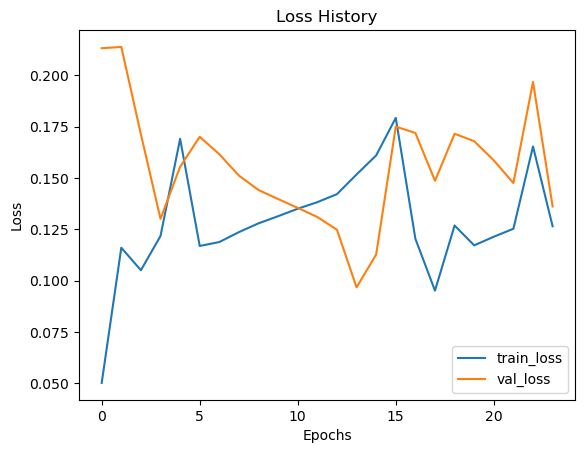

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

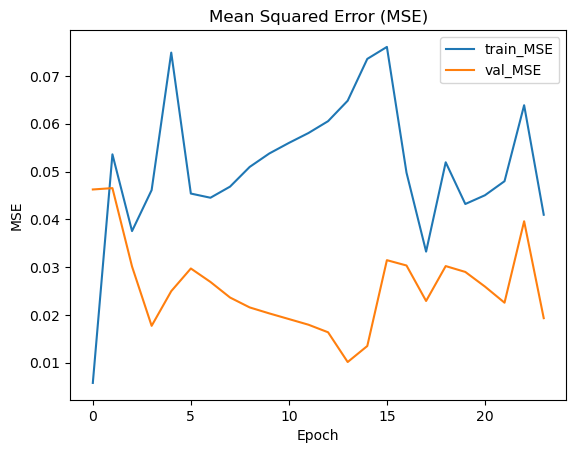

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

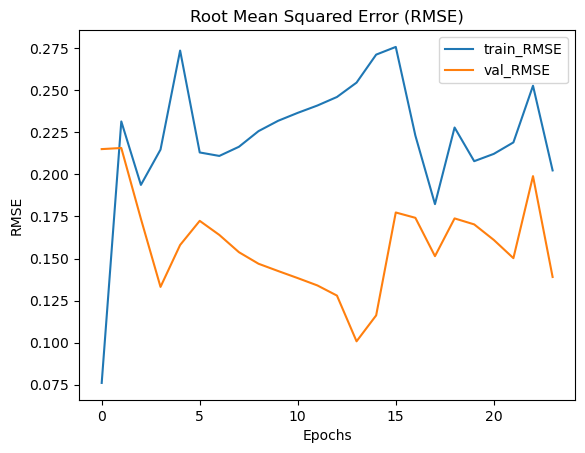

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

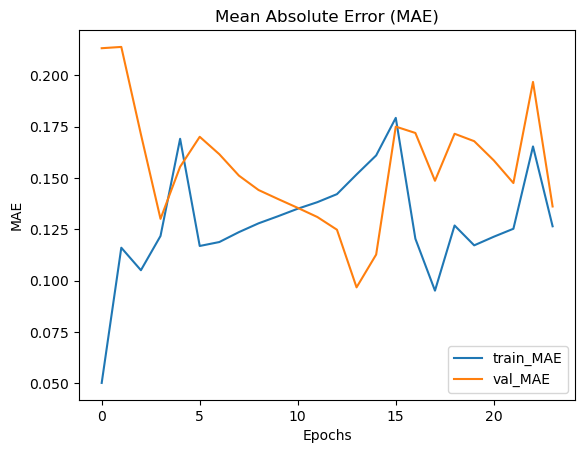

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

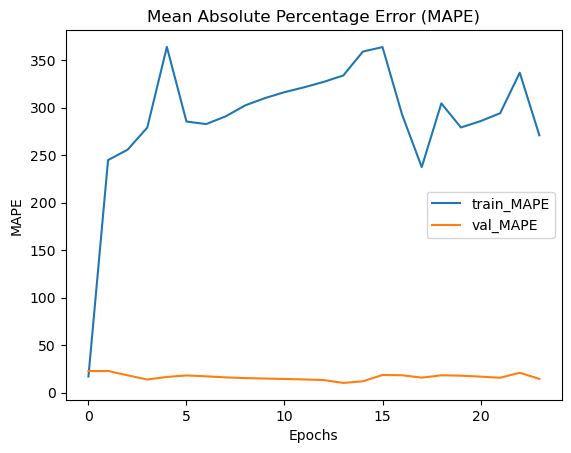

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:37:17.305470: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


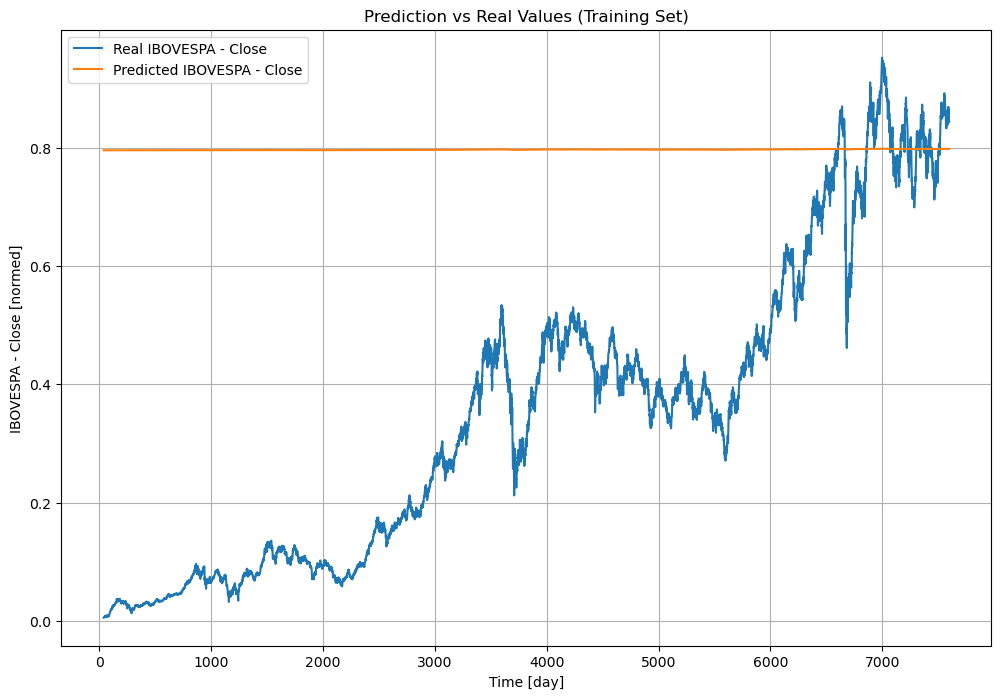

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


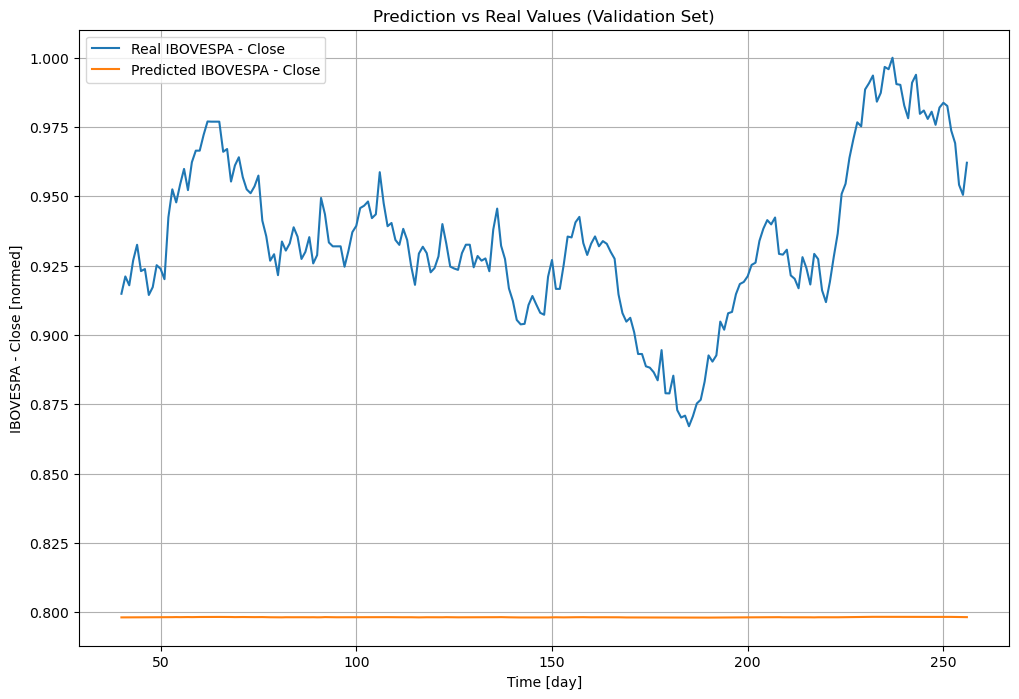

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


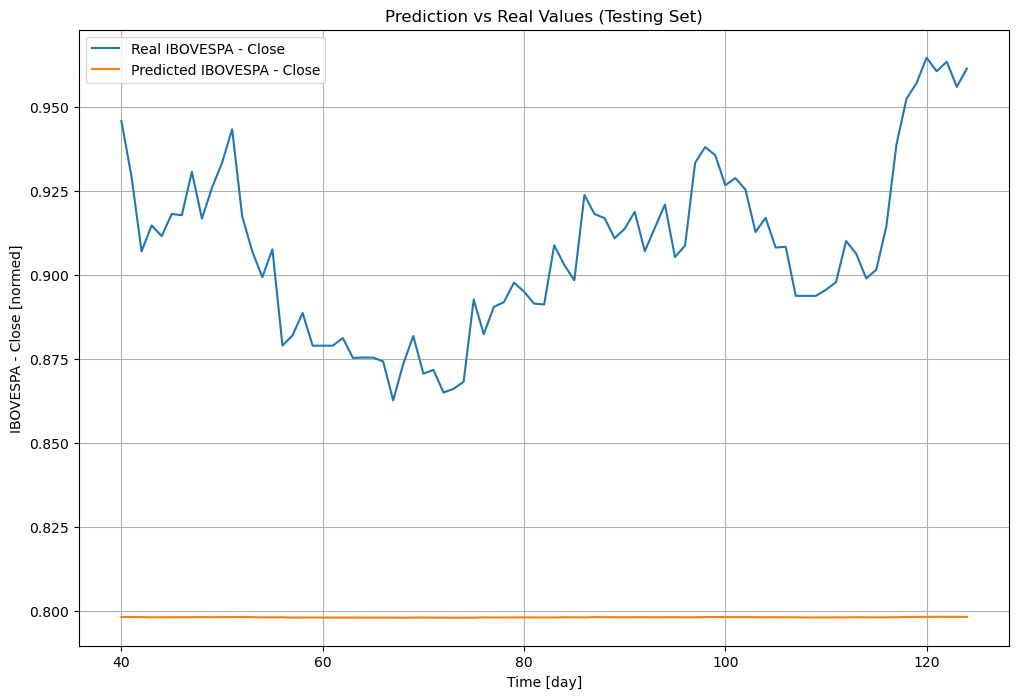

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

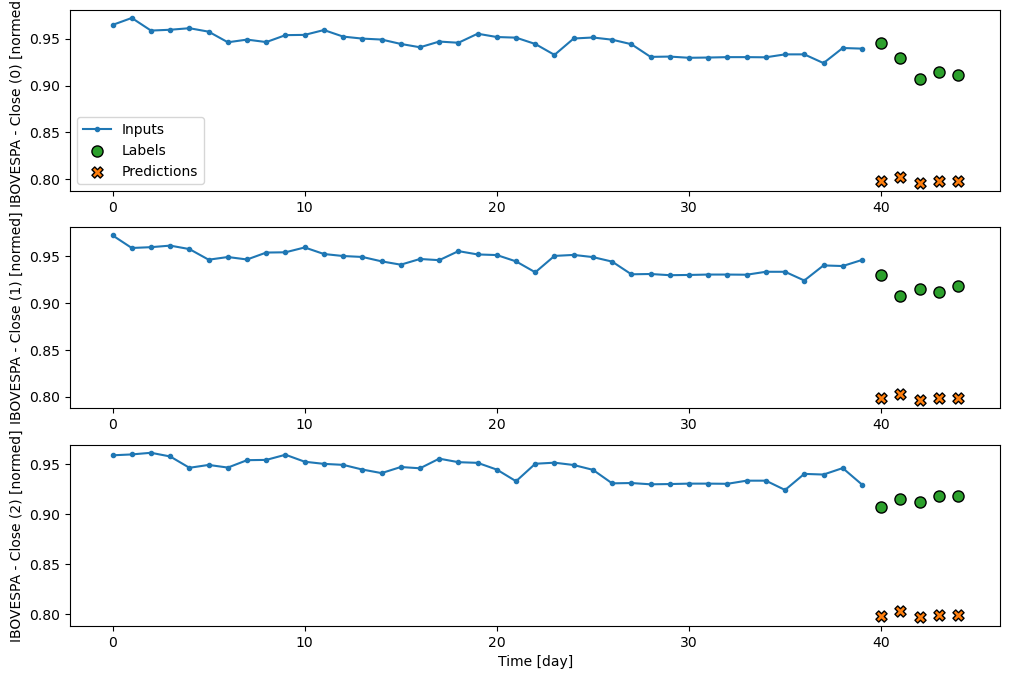

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:11s:65ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


array([[[0.79819655, 0.79819655, 0.79819655, ..., 0.79819655,
         0.79819655, 0.79819655],
        [0.8025008 , 0.8025008 , 0.8025008 , ..., 0.8025008 ,
         0.8025008 , 0.8025008 ],
        [0.7963972 , 0.7963972 , 0.7963972 , ..., 0.7963972 ,
         0.7963972 , 0.7963972 ],
        [0.7984148 , 0.7984148 , 0.7984148 , ..., 0.7984148 ,
         0.7984148 , 0.7984148 ],
        [0.79849523, 0.79849523, 0.79849523, ..., 0.79849523,
         0.7984952 , 0.7984952 ]],

       [[0.79821175, 0.79821175, 0.79821175, ..., 0.79821175,
         0.79821175, 0.79821175],
        [0.8025217 , 0.8025217 , 0.8025217 , ..., 0.8025217 ,
         0.8025217 , 0.8025217 ],
        [0.79641604, 0.79641604, 0.79641604, ..., 0.79641604,
         0.79641604, 0.79641604],
        [0.79843414, 0.79843414, 0.79843414, ..., 0.79843414,
         0.79843414, 0.79843414],
        [0.79851663, 0.79851663, 0.79851663, ..., 0.79851663,
         0.7985165 , 0.7985165 ]],

       [[0.7981599 , 0.7981599 , 0.7

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')